In [1]:
from discriminability_tools import *

import pickle
from IPython.core.display import display, HTML, Markdown
from nilearn.decoding import Decoder
from sklearn.model_selection import StratifiedKFold
from random import randint
import math

import sys
import os
import pandas as pd
import gc

sys.path.append(os.path.abspath("../../ml/"))

from apply_loocv_and_save import *
from dev_wtp_io_utils import *
import gc
import nibabel as nib

from os import path
import multiprocessing
import math
#import statsmodels
from statsmodels.stats.multitest import fdrcorrection


nonbids_data_path = "/gpfs/projects/sanlab/shared/DEV/nonbids_data/"
ml_data_folderpath = "/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml"
train_test_markers_filepath = ml_data_folderpath + "/train_test_markers_20210601T183243.csv"
test_train_df = pd.read_csv(train_test_markers_filepath)

all_sst_events= pd.read_csv(ml_data_folderpath +"/SST/" + "all_sst_events.csv")


dataset_name = 'conditions'

from nilearn.decoding import DecoderRegressor, Decoder

script_path = '/gpfs/projects/sanlab/shared/DEV/DEV_scripts/fMRI/ml'
# HRF 2s

#get a PFC mask
#pfc_mask = create_mask_from_images(get_pfc_image_filepaths(ml_data_folderpath + "/"),threshold=10)


def trialtype_resp_trans_func(X):
    return(X.trial_type)

#cpus_available = int(os.getenv('CPUS_PER_TASK'))

#custom thing I have set in my jupyter notebook task.
cpus_available = multiprocessing.cpu_count()

cpus_to_use = min(cpus_available-1,math.floor(0.9*cpus_available))
print(cpus_available, cpus_to_use)

from analyze_results import remove_selected_outliers
from scipy.stats import pearsonr,spearmanr
from matplotlib import pyplot

            
dataset_name = 'conditions'


brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_betaseries_84subs_correct_cond.pkl'
#brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_betaseries_58subs_correct_cond.pkl'
#brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_conditions_43subs_correct_cond.pkl'

## get subject IDs in the dataset

all_subjects = load_and_preprocess(
    brain_data_filepath,
    train_test_markers_filepath,
    subjs_to_use = None,
    response_transform_func = trialtype_resp_trans_func,
    clean=None)

all_subjects['groups']

subj_list = np.unique(all_subjects['groups'])

del all_subjects
gc.collect()

summary_results_list = {}




python initialized for apply_loocv_and_save


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


28 25
28
28 25
checked for intersection and no intersection between the brain data and the subjects was found.
there were 58 subjects overlapping between the subjects marked for train data and the training dump file itself.
test_train_set: 9549
pkl_file: 168
brain_data_filepath: 152
train_test_markers_filepath: 141
response_transform_func: 136
sys: 72
Brain_Data_allsubs: 48
clean: 16
subjs_to_use: 16


/gpfs/projects/sanlab/shared/DEV/DEV_scripts/fMRI/ml/apply_loocv_and_save.py:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Brain_Data_allsubs.Y[Brain_Data_allsubs.Y=='NULL']=None


9037
9037


In [3]:
# setup

data_by_ppt_name = "data_by_ppt_2021_12_29.csv"
individual_differences = pd.read_csv(ml_data_folderpath + "/" + data_by_ppt_name)
individual_differences = individual_differences.rename(columns={'SID':'subid'})
individual_differences['wave']=1

In [4]:
mask_list = []



def get_masks_in_folder(mask_folder):
    print(os.listdir(mask_folder))
    mask_name_list = [s for s in os.listdir(mask_folder) if os.path.isdir(mask_folder + s) is False]
        
    return(mask_name_list)

neurosynth_mask_folder = ml_data_folderpath + "/masks/response_inhibition_related/"
harvox_mask_folder = ml_data_folderpath + "/masks/response_inhibition_related/harvardoxford/"

masks_neurosynth = get_masks_in_folder(neurosynth_mask_folder)
masks_harvox = get_masks_in_folder(harvox_mask_folder)

['negative affect_association-test_z_FDR_0.01.nii.gz', 'harvardoxford', 'response inhibition_association-test_z_FDR_0.01.nii.gz', 'negative emotions_association-test_z_FDR_0.01.nii.gz']
['harvardoxford-cortical_prob_Superior Frontal Gyrus.nii.gz', 'harvardoxford-cortical_prob_Frontal Pole.nii.gz', 'harvardoxford-cortical_prob_Cingulate Gyrus, posterior division.nii.gz', 'harvardoxford-cortical_prob_Frontal Orbital Cortex.nii.gz', 'harvardoxford-cortical_prob_Frontal Operculum Cortex.nii.gz', 'harvardoxford-cortical_prob_Supramarginal Gyrus, posterior division.nii.gz', 'harvardoxford-cortical_prob_Angular Gyrus.nii.gz', 'harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.nii.gz', 'harvardoxford-cortical_prob_Lateral Occipital Cortex, superior division.nii.gz', 'harvardoxford-cortical_prob_Inferior Frontal Gyrus, pars opercularis.nii.gz', 'harvardoxford-cortical_prob_Inferior Frontal Gyrus, pars triangularis.nii.gz', 'harvardoxford-cortical_prob_Insular Cortex.nii.gz']


In [5]:
mask_list = [neurosynth_mask_folder + s for s in masks_neurosynth] + [neurosynth_mask_folder + s for s in masks_harvox]

In [6]:
mask_list

['/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/masks/response_inhibition_related/negative affect_association-test_z_FDR_0.01.nii.gz',
 '/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/masks/response_inhibition_related/response inhibition_association-test_z_FDR_0.01.nii.gz',
 '/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/masks/response_inhibition_related/negative emotions_association-test_z_FDR_0.01.nii.gz',
 '/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/masks/response_inhibition_related/harvardoxford-cortical_prob_Superior Frontal Gyrus.nii.gz',
 '/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/masks/response_inhibition_related/harvardoxford-cortical_prob_Frontal Pole.nii.gz',
 '/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/masks/response_inhibition_related/harvardoxford-cortical_prob_Cingulate Gyrus, posterior division.nii.gz',
 '/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/masks/response_inhibition_related/harvardoxford-cortical

In [7]:
def display_discriminability_correlations(ind_div_combined_3sd, neural_vars, correlations):
    tabular_summary_list = []
    for neural_var in neural_vars:#:
        display(Markdown("### " + neural_var))
        for correlate in correlations: 
            display(Markdown("#### " + correlate))
            nan_rows = np.isnan(ind_div_combined_3sd[correlate]) | np.isnan(ind_div_combined_3sd[neural_var])
            cor2way_df = ind_div_combined_3sd.loc[nan_rows==False,]
            pearson_result = pearsonr(cor2way_df[neural_var],cor2way_df[correlate])
            display(HTML("r=" + format(pearson_result[0],".2f") +"; p-value=" + format(pearson_result[1],".4f")))
            spearman_result = spearmanr(cor2way_df[neural_var],cor2way_df[correlate])
            display(HTML("rho=" + format(spearman_result[0],".2f") +"; p-value=" + format(spearman_result[1],".4f")))
            cplot = pyplot.scatter(cor2way_df[neural_var],cor2way_df[correlate])
            cplot.axes.set_xlabel(neural_var)
            cplot.axes.ylabel=correlate
            pyplot.show()
            
            tabular_summary = {
                'neural_var':neural_var,
                'correlate':correlate,
                "pearson's r":pearson_result[0],
                "pearson's r p-value":pearson_result[1],
                "spearman's rho":spearman_result[0],
                "spearman's rho p-value":spearman_result[1]
            }
            
            tabular_summary_list = tabular_summary_list + [tabular_summary]
           
    tabular_summary = pd.DataFrame(tabular_summary_list)
    return(tabular_summary)
    
            

            
    
            

## This section iterates through everything and prints. We need to 

### TESQ-E

In [41]:
def display_discriminability_correlations_tesq(ind_div_combined_3sd):
    return(display_discriminability_correlations(
        ind_div_combined_3sd,
        neural_vars = ['discriminability_overfit_accuracy','discriminability_mean_cv_scores'],
        correlations = ['SST_SSRT','TESQ_E_suppression', 'TESQ_E_avoidance_of_temptations', 
             'TESQ_E_goal_deliberation', 'TESQ_E_controlling_temptations', 'TESQ_E_distraction',
             'TESQ_E_goal_and_rule_setting','TESQ_E_sum'
            ]
    ))
           
def remove_selected_outliers_tesq_study(ind_div_combined,show_plot=False):
    
    idc_outliers_removed = remove_selected_outliers(ind_div_combined,
    ['discriminability_overfit_accuracy','discriminability_mean_cv_scores',
        'BFI_extraversion','RMQ_locomotion','ses_aggregate','PLAN_cognitive_strategies',
     'SST_SSRT','BIS_11','BSCS','TESQ_E_suppression', 'TESQ_E_avoidance_of_temptations', 
     'TESQ_E_goal_deliberation', 'TESQ_E_controlling_temptations', 'TESQ_E_distraction',
     'TESQ_E_goal_and_rule_setting','EDM','RS','TRSQ','ROC_Crave_Regulate_Minus_Look',
     'SRHI_unhealthy','TESQ_E_sum',
     'cancer_promoting_minus_preventing_FFQ','bf_1'],
    show_plot=False)
    return(idc_outliers_removed)


In [42]:
discriminability_version_id="v_2"

## negative affect_association-test_z_FDR_0

### discriminability_overfit_accuracy

#### SST_SSRT

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


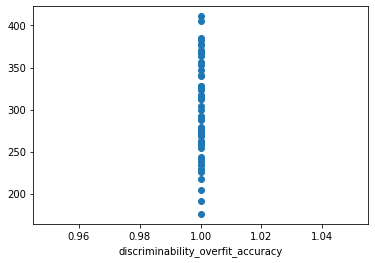

#### TESQ_E_suppression

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


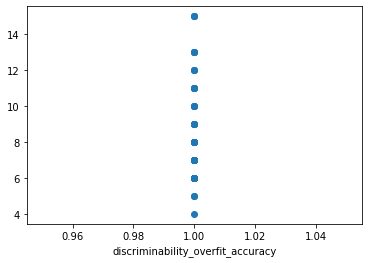

#### TESQ_E_avoidance_of_temptations

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


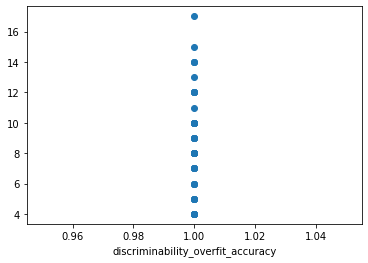

#### TESQ_E_goal_deliberation

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


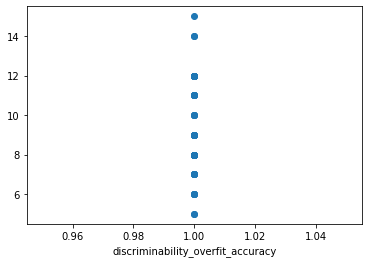

#### TESQ_E_controlling_temptations

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


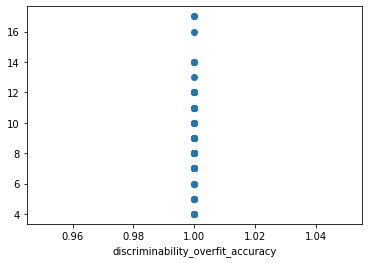

#### TESQ_E_distraction

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


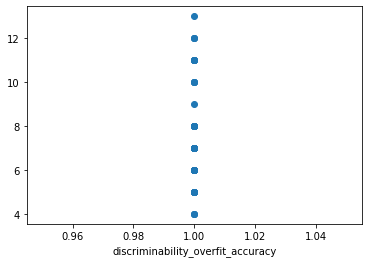

#### TESQ_E_goal_and_rule_setting

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


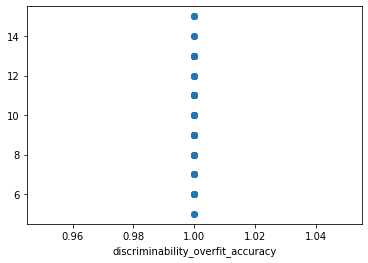

#### TESQ_E_sum

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


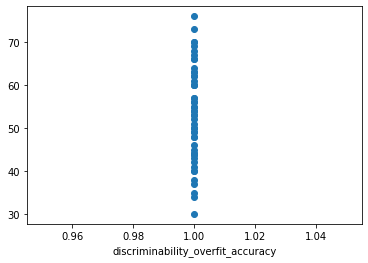

### discriminability_mean_cv_scores

#### SST_SSRT

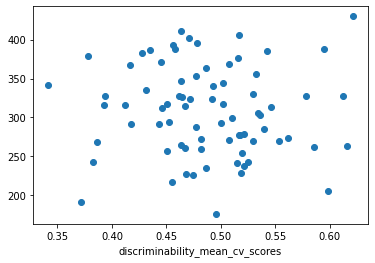

#### TESQ_E_suppression

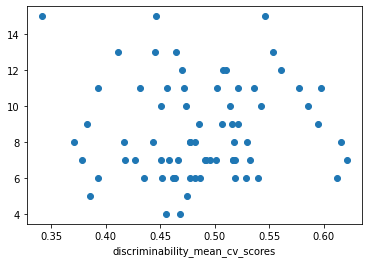

#### TESQ_E_avoidance_of_temptations

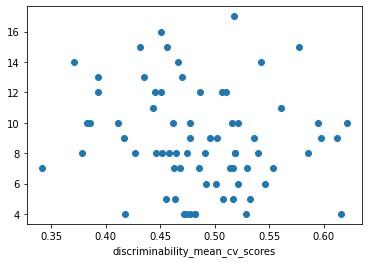

#### TESQ_E_goal_deliberation

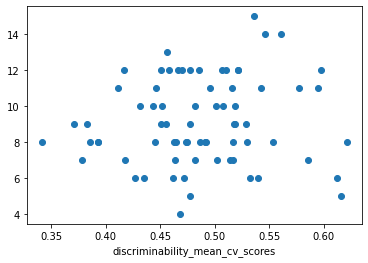

#### TESQ_E_controlling_temptations

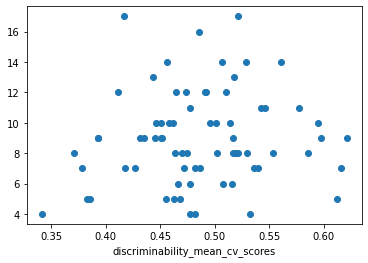

#### TESQ_E_distraction

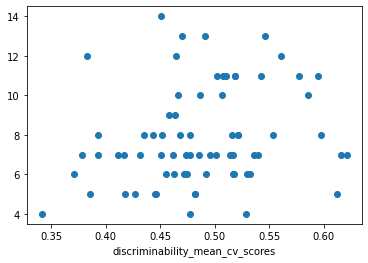

#### TESQ_E_goal_and_rule_setting

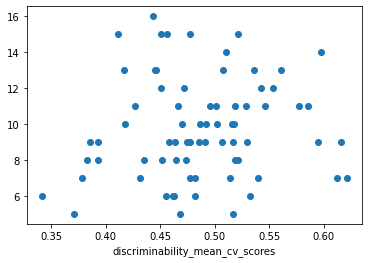

#### TESQ_E_sum

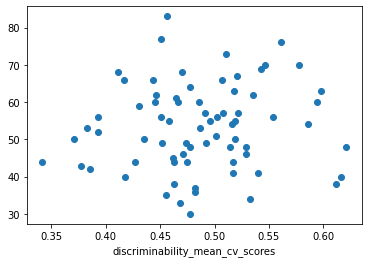

## response inhibition_association-test_z_FDR_0

### discriminability_overfit_accuracy

#### SST_SSRT

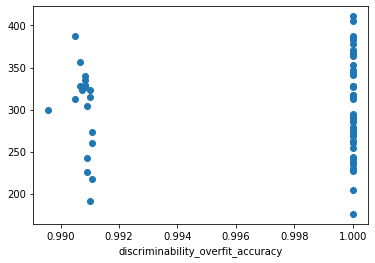

#### TESQ_E_suppression

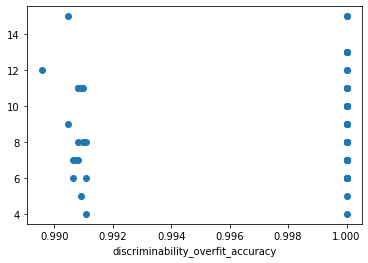

#### TESQ_E_avoidance_of_temptations

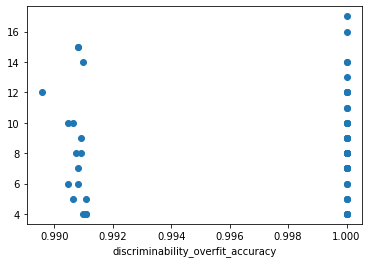

#### TESQ_E_goal_deliberation

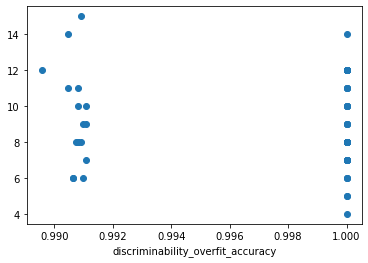

#### TESQ_E_controlling_temptations

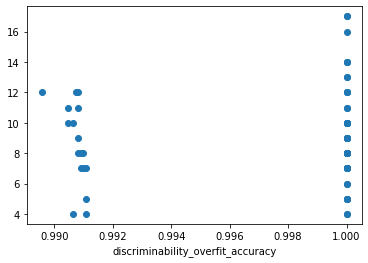

#### TESQ_E_distraction

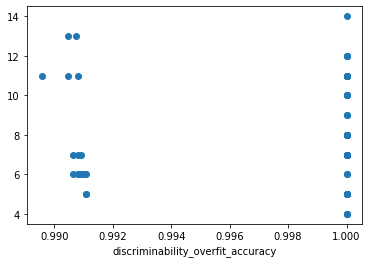

#### TESQ_E_goal_and_rule_setting

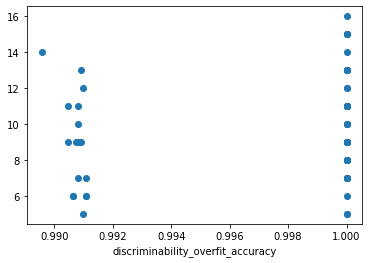

#### TESQ_E_sum

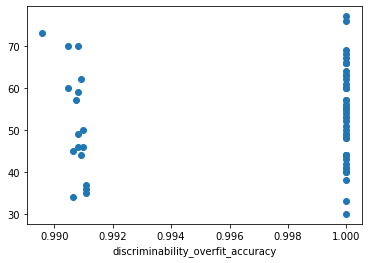

### discriminability_mean_cv_scores

#### SST_SSRT

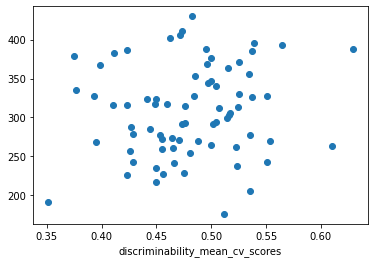

#### TESQ_E_suppression

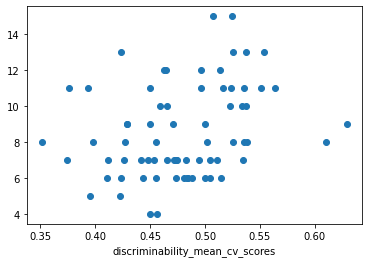

#### TESQ_E_avoidance_of_temptations

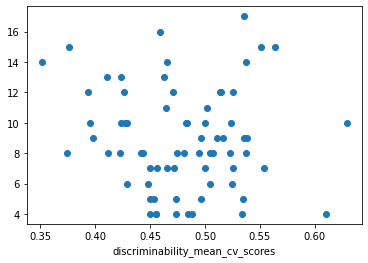

#### TESQ_E_goal_deliberation

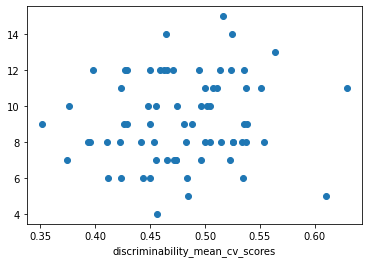

#### TESQ_E_controlling_temptations

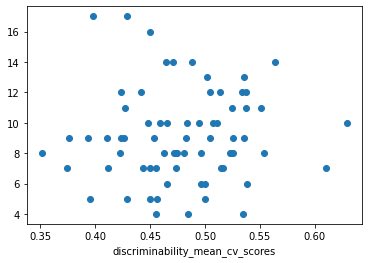

#### TESQ_E_distraction

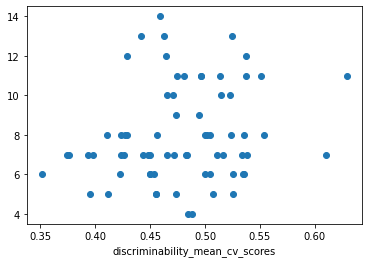

#### TESQ_E_goal_and_rule_setting

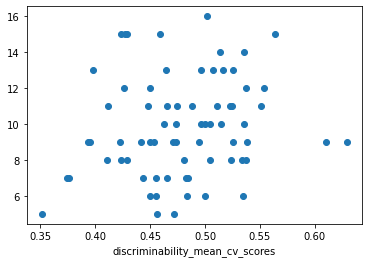

#### TESQ_E_sum

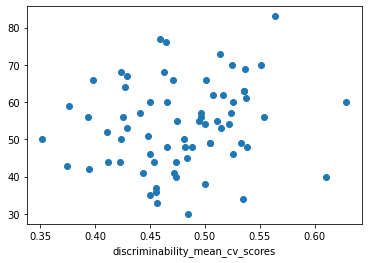

## negative emotions_association-test_z_FDR_0

### discriminability_overfit_accuracy

#### SST_SSRT

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


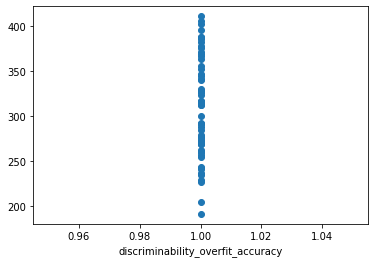

#### TESQ_E_suppression

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


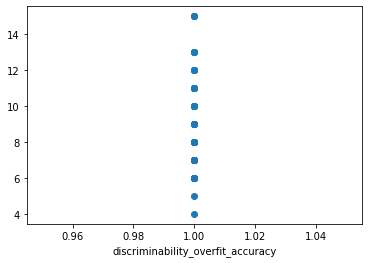

#### TESQ_E_avoidance_of_temptations

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


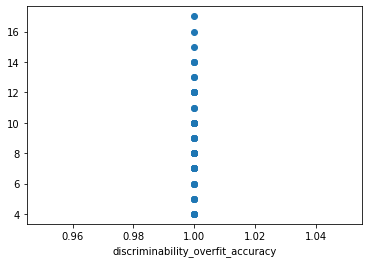

#### TESQ_E_goal_deliberation

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


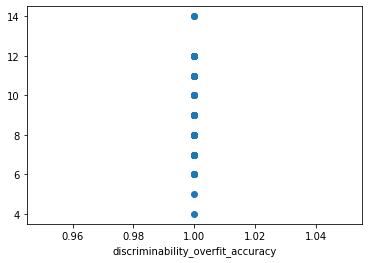

#### TESQ_E_controlling_temptations

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


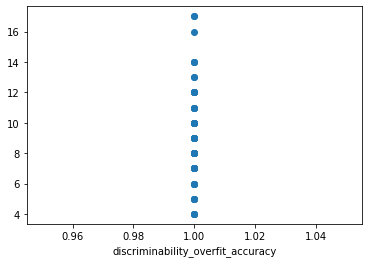

#### TESQ_E_distraction

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


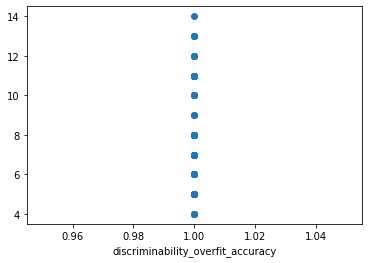

#### TESQ_E_goal_and_rule_setting

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


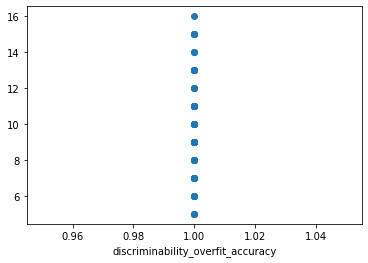

#### TESQ_E_sum

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


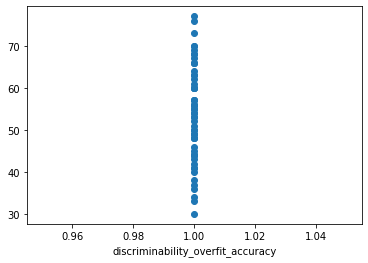

### discriminability_mean_cv_scores

#### SST_SSRT

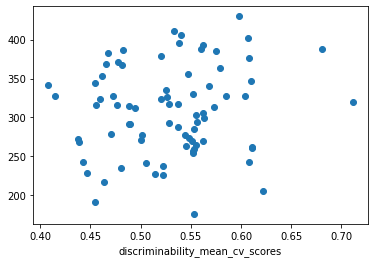

#### TESQ_E_suppression

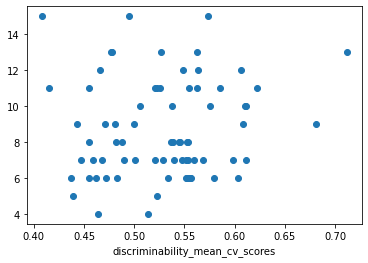

#### TESQ_E_avoidance_of_temptations

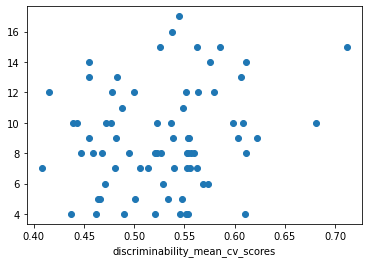

#### TESQ_E_goal_deliberation

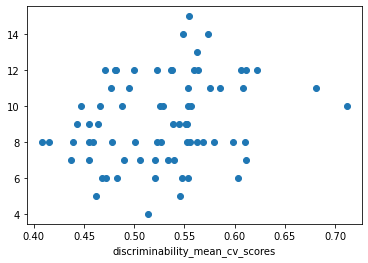

#### TESQ_E_controlling_temptations

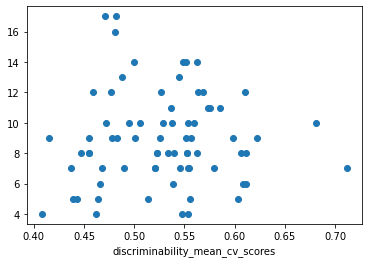

#### TESQ_E_distraction

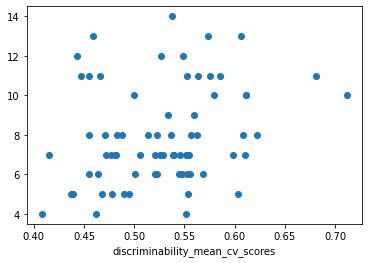

#### TESQ_E_goal_and_rule_setting

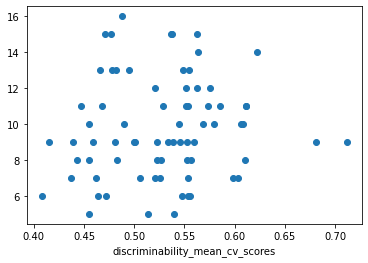

#### TESQ_E_sum

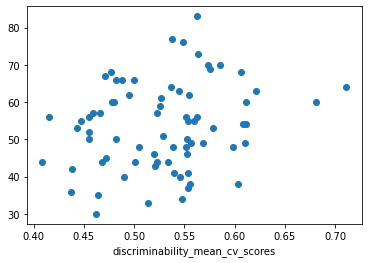

## harvardoxford-cortical_prob_Superior Frontal Gyrus

### discriminability_overfit_accuracy

#### SST_SSRT

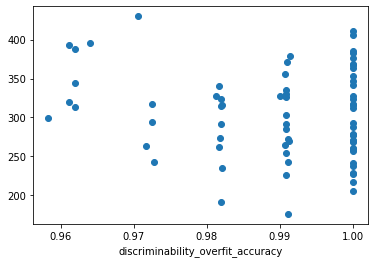

#### TESQ_E_suppression

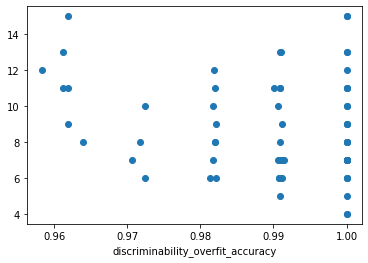

#### TESQ_E_avoidance_of_temptations

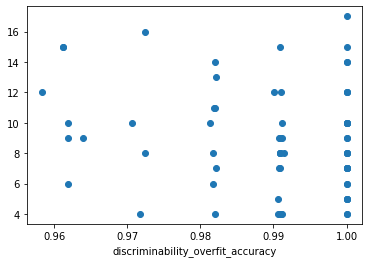

#### TESQ_E_goal_deliberation

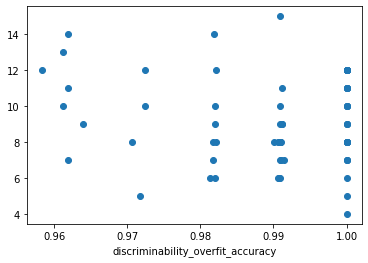

#### TESQ_E_controlling_temptations

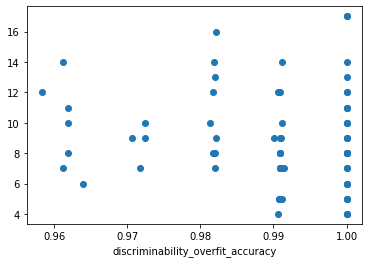

#### TESQ_E_distraction

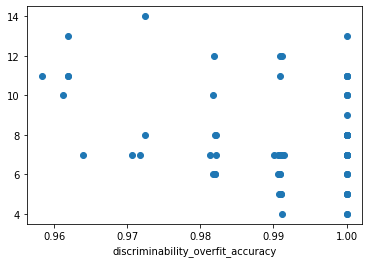

#### TESQ_E_goal_and_rule_setting

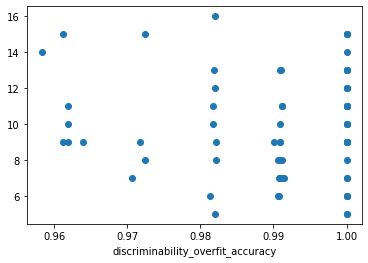

#### TESQ_E_sum

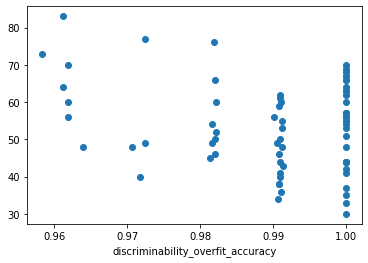

### discriminability_mean_cv_scores

#### SST_SSRT

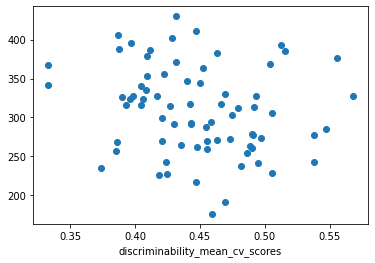

#### TESQ_E_suppression

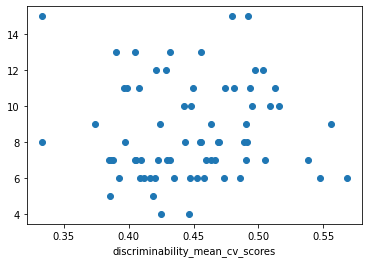

#### TESQ_E_avoidance_of_temptations

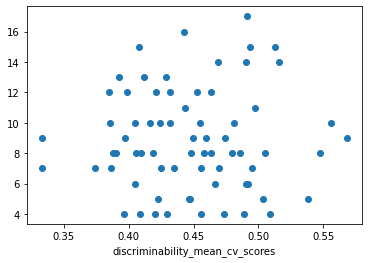

#### TESQ_E_goal_deliberation

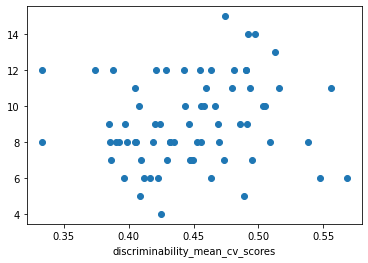

#### TESQ_E_controlling_temptations

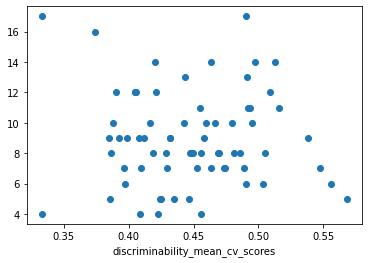

#### TESQ_E_distraction

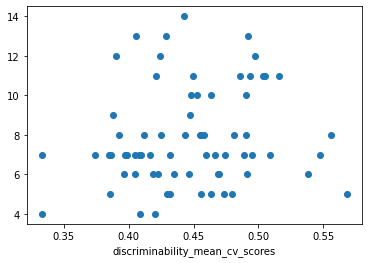

#### TESQ_E_goal_and_rule_setting

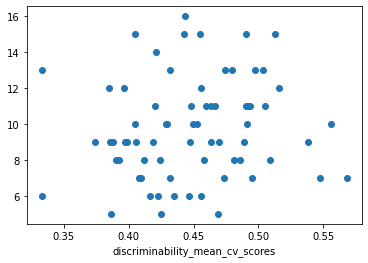

#### TESQ_E_sum

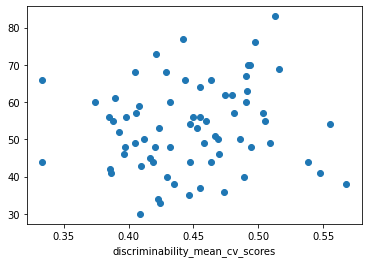

## harvardoxford-cortical_prob_Frontal Pole

### discriminability_overfit_accuracy

#### SST_SSRT

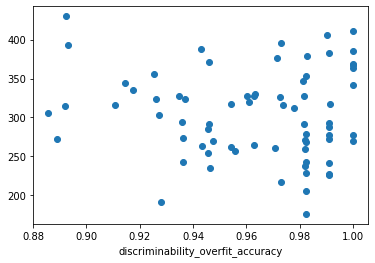

#### TESQ_E_suppression

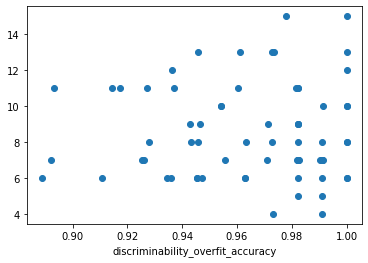

#### TESQ_E_avoidance_of_temptations

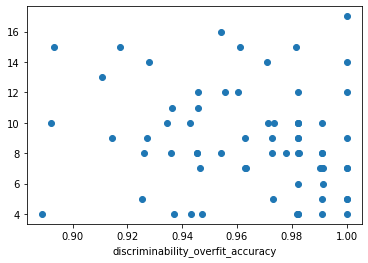

#### TESQ_E_goal_deliberation

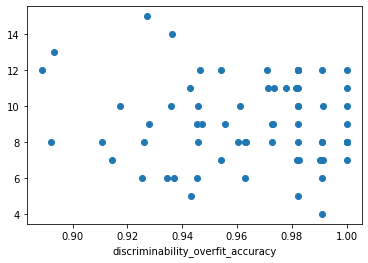

#### TESQ_E_controlling_temptations

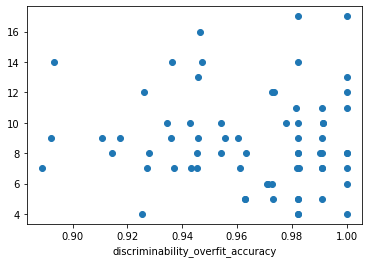

#### TESQ_E_distraction

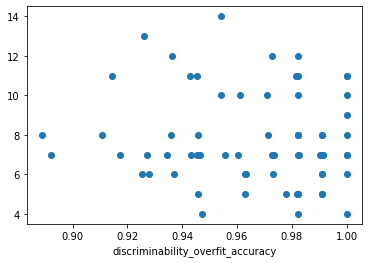

#### TESQ_E_goal_and_rule_setting

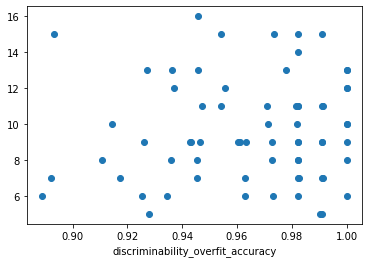

#### TESQ_E_sum

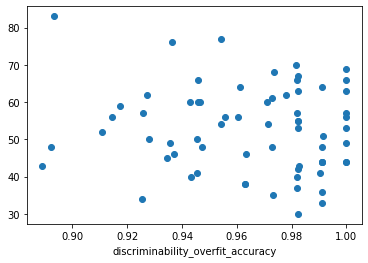

### discriminability_mean_cv_scores

#### SST_SSRT

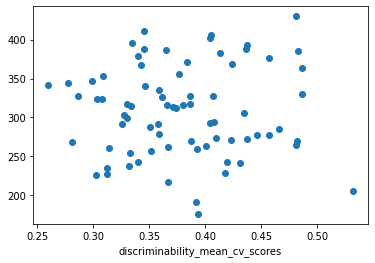

#### TESQ_E_suppression

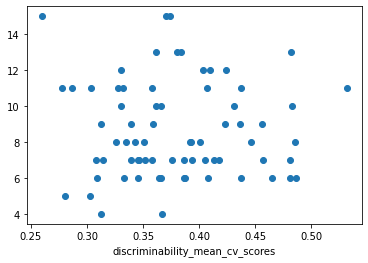

#### TESQ_E_avoidance_of_temptations

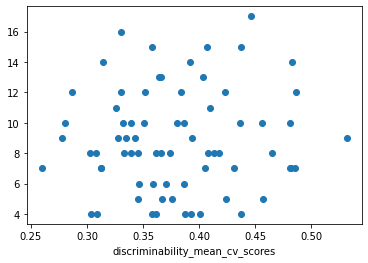

#### TESQ_E_goal_deliberation

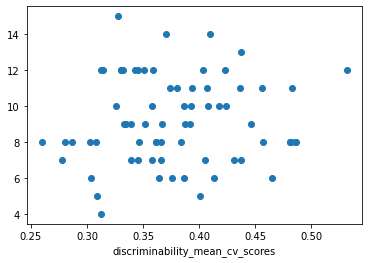

#### TESQ_E_controlling_temptations

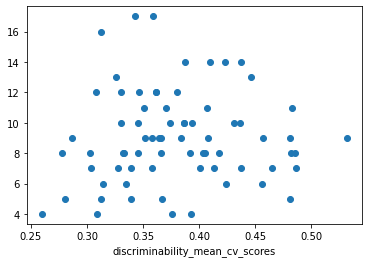

#### TESQ_E_distraction

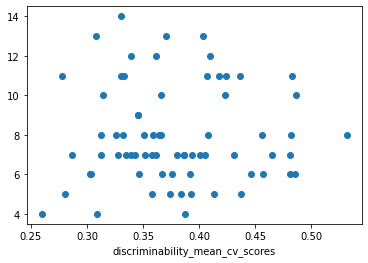

#### TESQ_E_goal_and_rule_setting

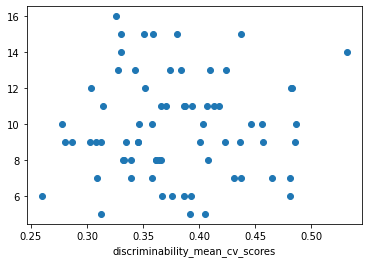

#### TESQ_E_sum

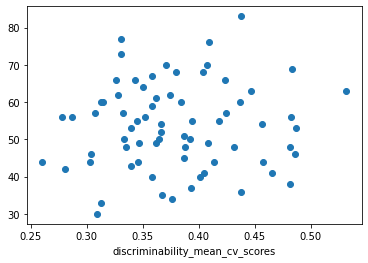

## harvardoxford-cortical_prob_Cingulate Gyrus, posterior division

### discriminability_overfit_accuracy

#### SST_SSRT

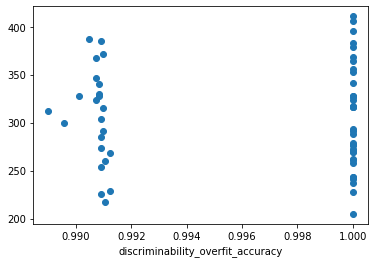

#### TESQ_E_suppression

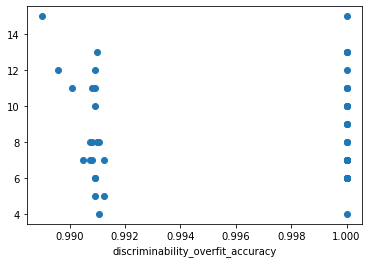

#### TESQ_E_avoidance_of_temptations

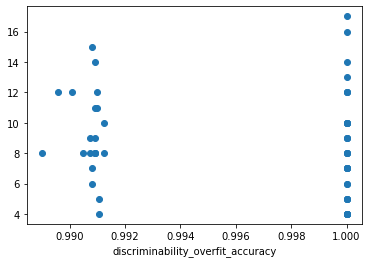

#### TESQ_E_goal_deliberation

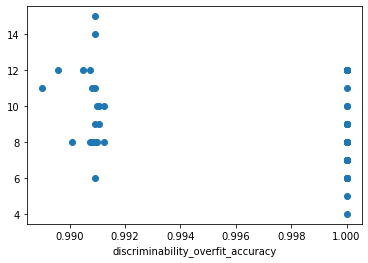

#### TESQ_E_controlling_temptations

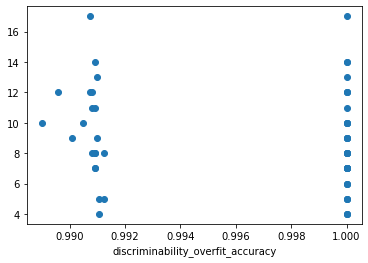

#### TESQ_E_distraction

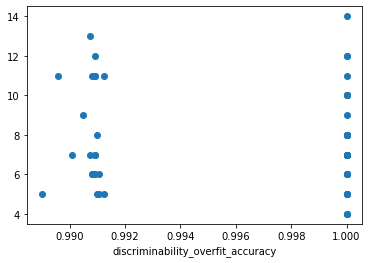

#### TESQ_E_goal_and_rule_setting

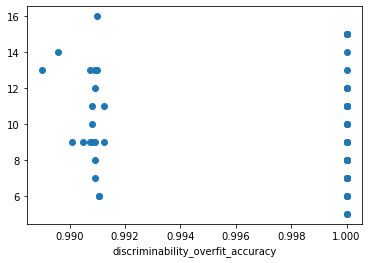

#### TESQ_E_sum

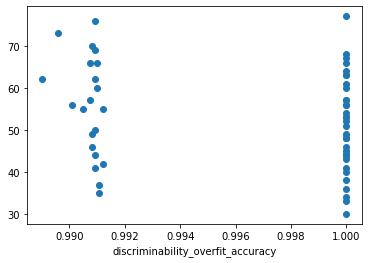

### discriminability_mean_cv_scores

#### SST_SSRT

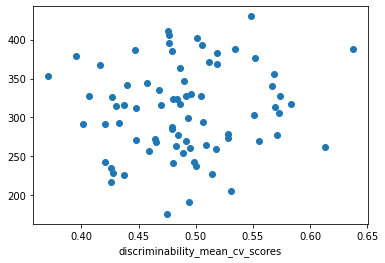

#### TESQ_E_suppression

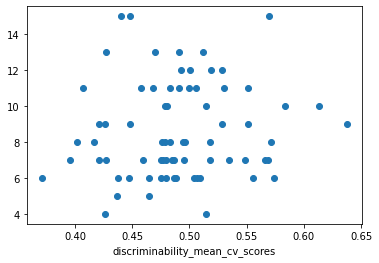

#### TESQ_E_avoidance_of_temptations

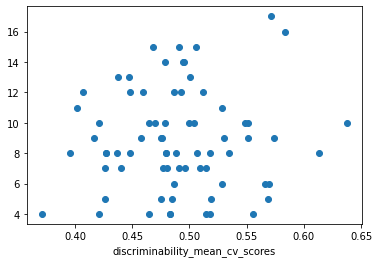

#### TESQ_E_goal_deliberation

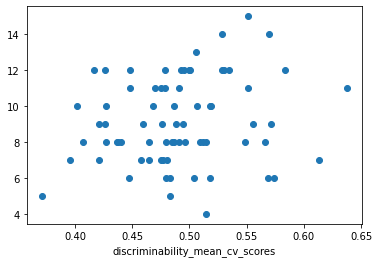

#### TESQ_E_controlling_temptations

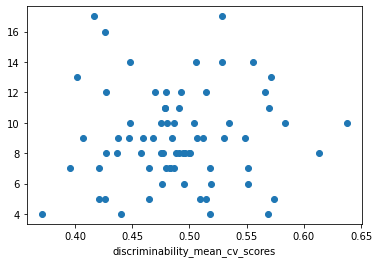

#### TESQ_E_distraction

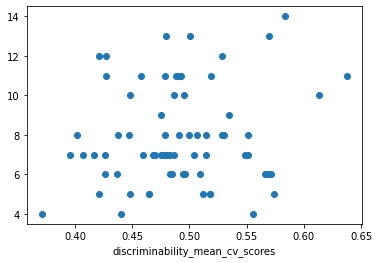

#### TESQ_E_goal_and_rule_setting

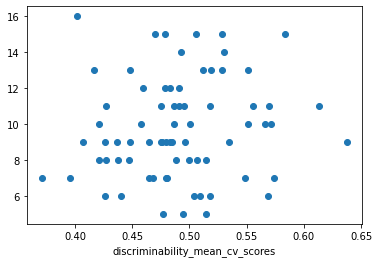

#### TESQ_E_sum

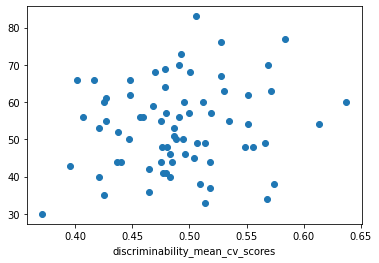

## harvardoxford-cortical_prob_Frontal Orbital Cortex

### discriminability_overfit_accuracy

#### SST_SSRT

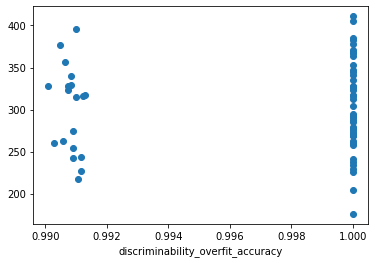

#### TESQ_E_suppression

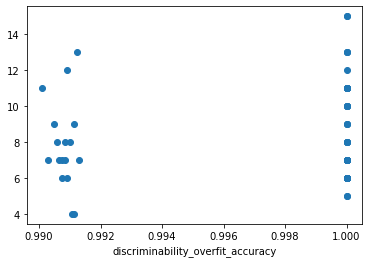

#### TESQ_E_avoidance_of_temptations

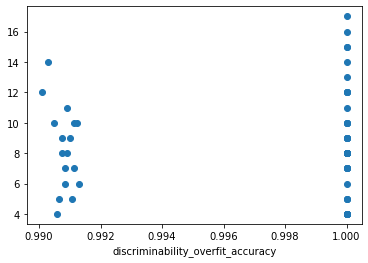

#### TESQ_E_goal_deliberation

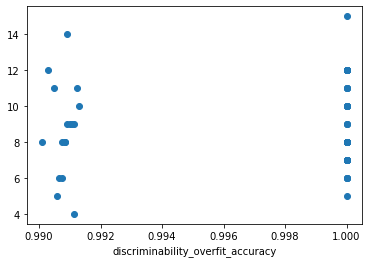

#### TESQ_E_controlling_temptations

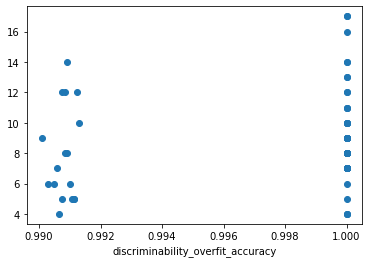

#### TESQ_E_distraction

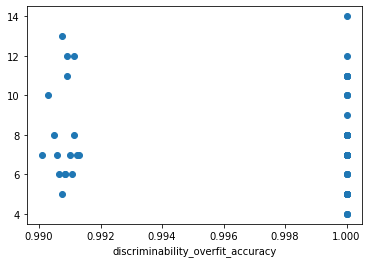

#### TESQ_E_goal_and_rule_setting

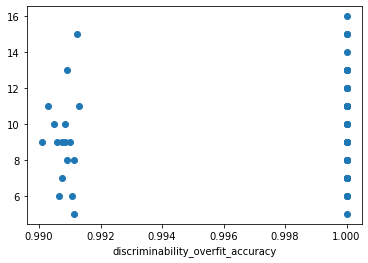

#### TESQ_E_sum

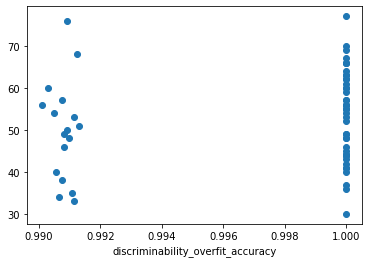

### discriminability_mean_cv_scores

#### SST_SSRT

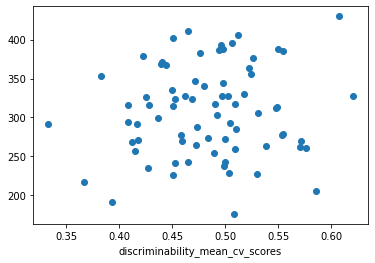

#### TESQ_E_suppression

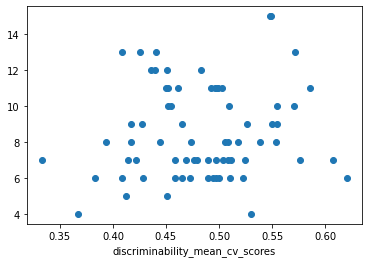

#### TESQ_E_avoidance_of_temptations

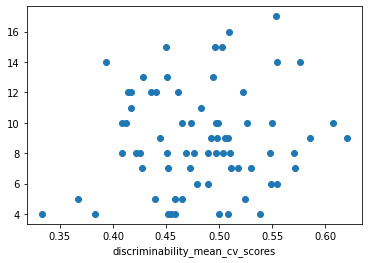

#### TESQ_E_goal_deliberation

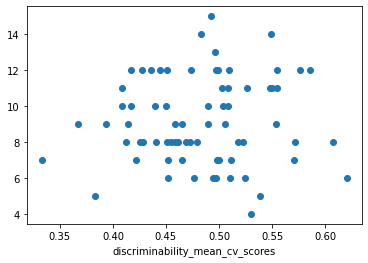

#### TESQ_E_controlling_temptations

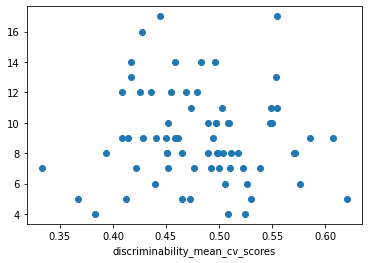

#### TESQ_E_distraction

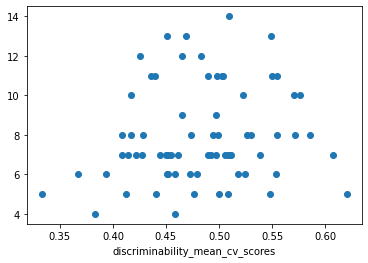

#### TESQ_E_goal_and_rule_setting

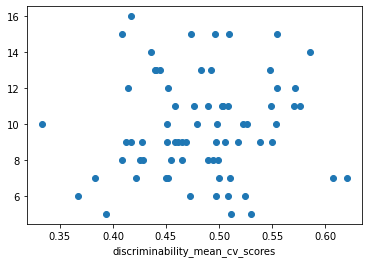

#### TESQ_E_sum

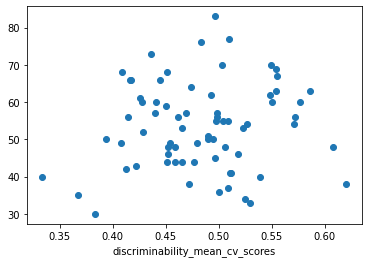

## harvardoxford-cortical_prob_Frontal Operculum Cortex

### discriminability_overfit_accuracy

#### SST_SSRT

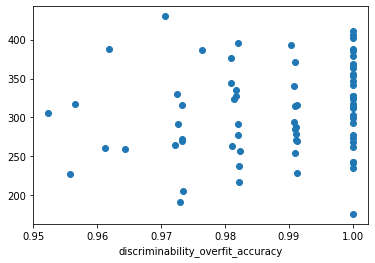

#### TESQ_E_suppression

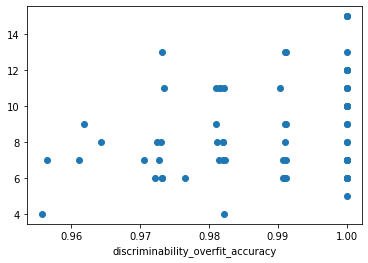

#### TESQ_E_avoidance_of_temptations

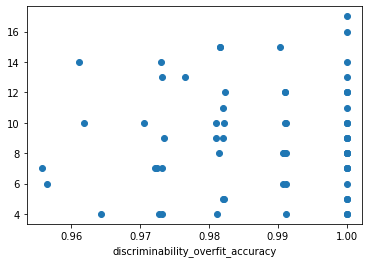

#### TESQ_E_goal_deliberation

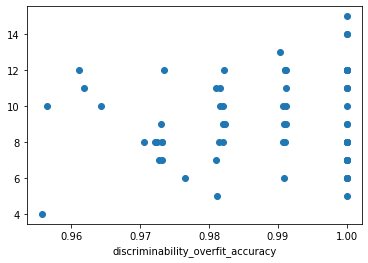

#### TESQ_E_controlling_temptations

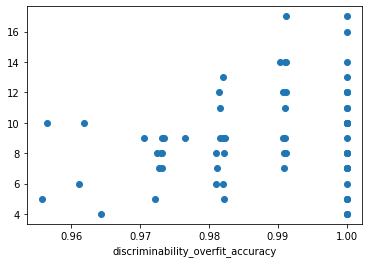

#### TESQ_E_distraction

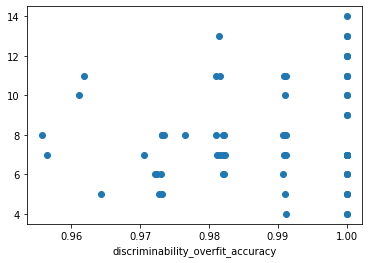

#### TESQ_E_goal_and_rule_setting

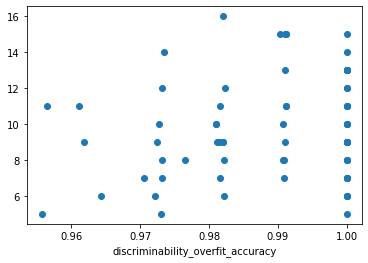

#### TESQ_E_sum

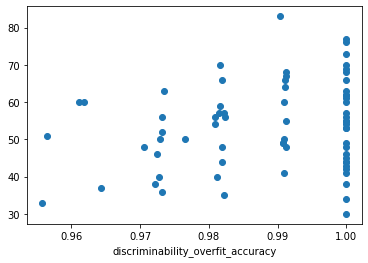

### discriminability_mean_cv_scores

#### SST_SSRT

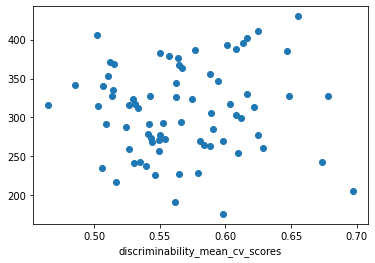

#### TESQ_E_suppression

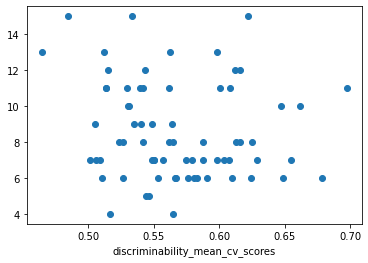

#### TESQ_E_avoidance_of_temptations

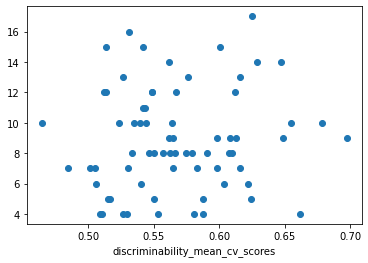

#### TESQ_E_goal_deliberation

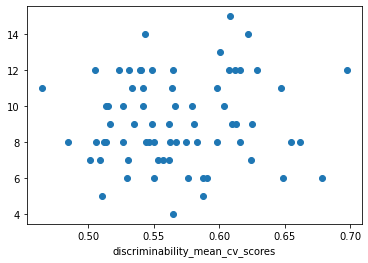

#### TESQ_E_controlling_temptations

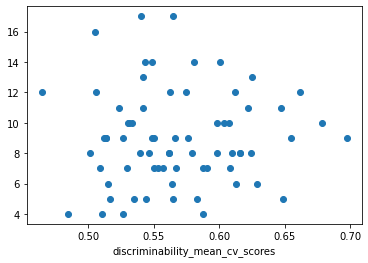

#### TESQ_E_distraction

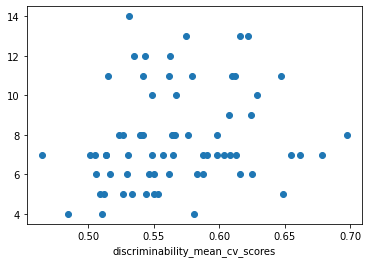

#### TESQ_E_goal_and_rule_setting

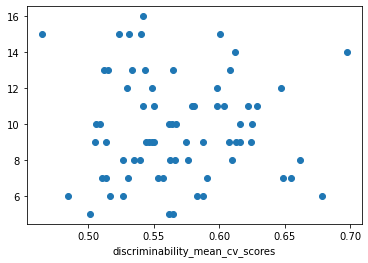

#### TESQ_E_sum

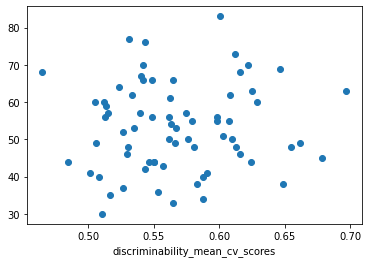

## harvardoxford-cortical_prob_Supramarginal Gyrus, posterior division

### discriminability_overfit_accuracy

#### SST_SSRT

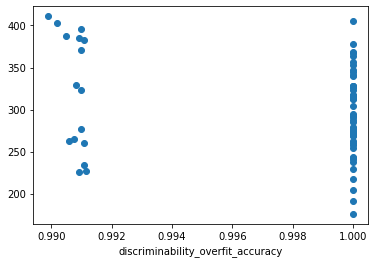

#### TESQ_E_suppression

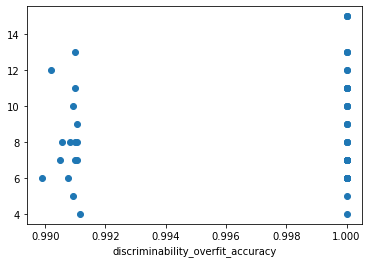

#### TESQ_E_avoidance_of_temptations

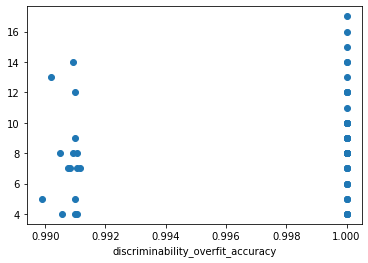

#### TESQ_E_goal_deliberation

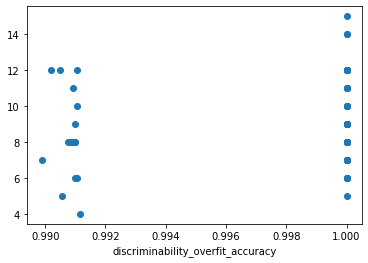

#### TESQ_E_controlling_temptations

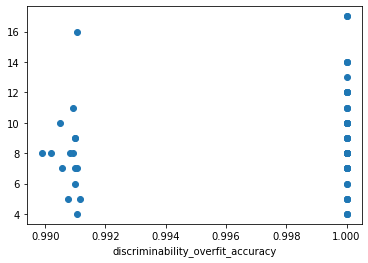

#### TESQ_E_distraction

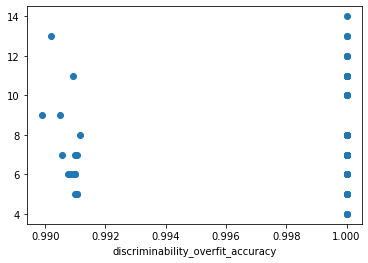

#### TESQ_E_goal_and_rule_setting

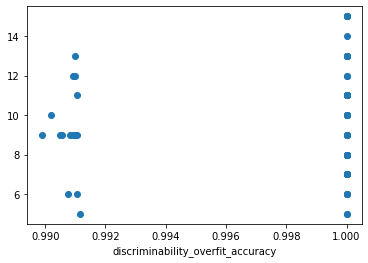

#### TESQ_E_sum

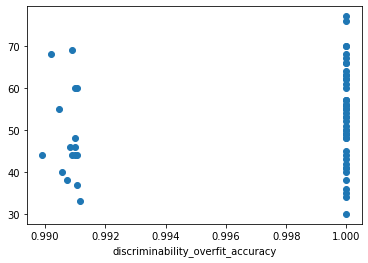

### discriminability_mean_cv_scores

#### SST_SSRT

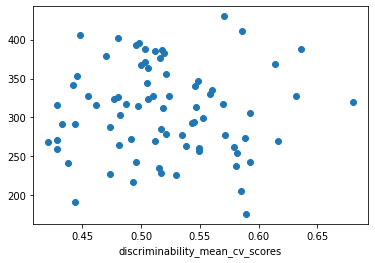

#### TESQ_E_suppression

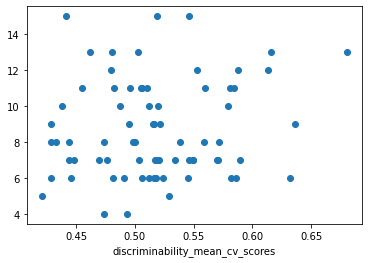

#### TESQ_E_avoidance_of_temptations

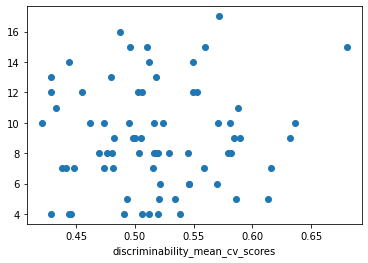

#### TESQ_E_goal_deliberation

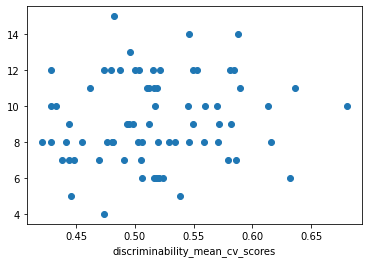

#### TESQ_E_controlling_temptations

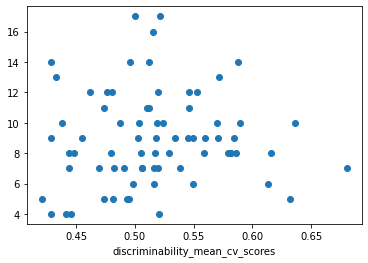

#### TESQ_E_distraction

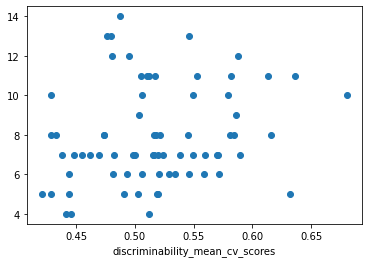

#### TESQ_E_goal_and_rule_setting

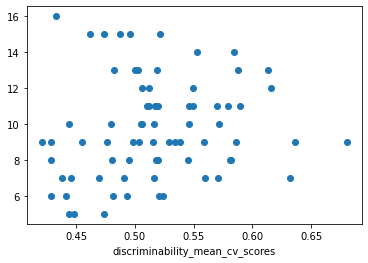

#### TESQ_E_sum

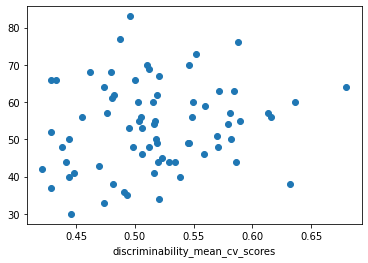

## harvardoxford-cortical_prob_Angular Gyrus

### discriminability_overfit_accuracy

#### SST_SSRT

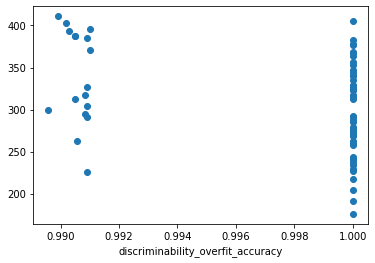

#### TESQ_E_suppression

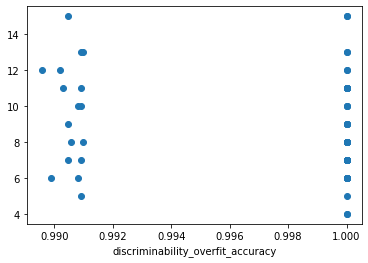

#### TESQ_E_avoidance_of_temptations

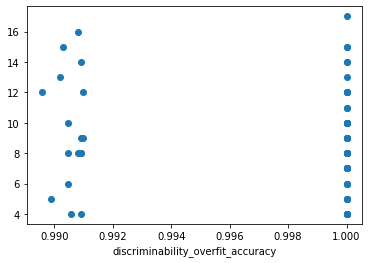

#### TESQ_E_goal_deliberation

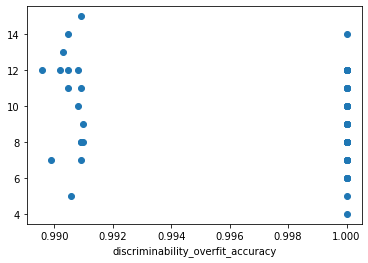

#### TESQ_E_controlling_temptations

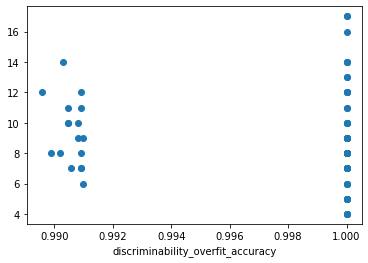

#### TESQ_E_distraction

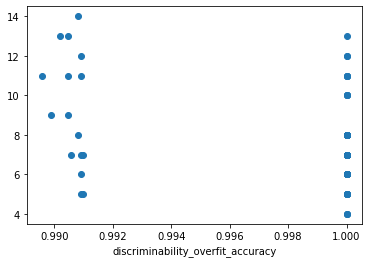

#### TESQ_E_goal_and_rule_setting

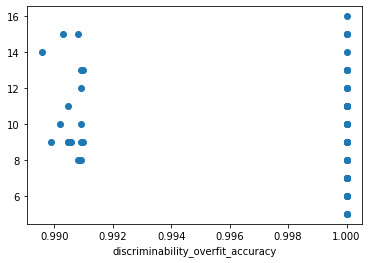

#### TESQ_E_sum

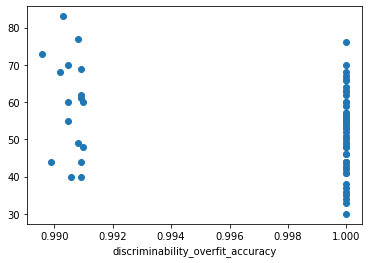

### discriminability_mean_cv_scores

#### SST_SSRT

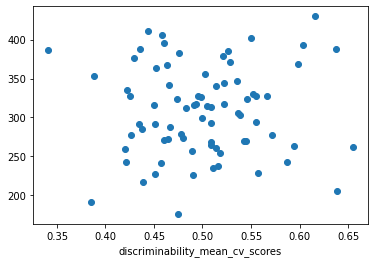

#### TESQ_E_suppression

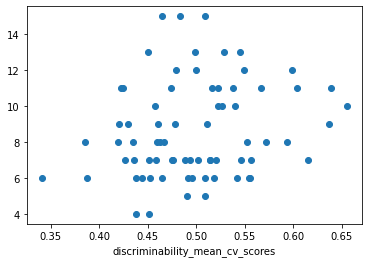

#### TESQ_E_avoidance_of_temptations

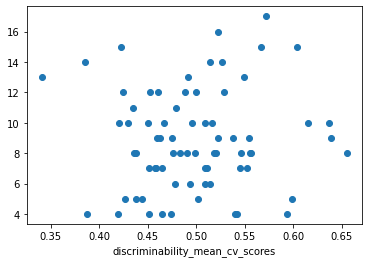

#### TESQ_E_goal_deliberation

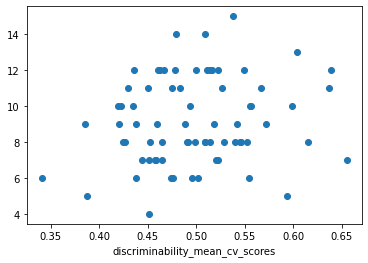

#### TESQ_E_controlling_temptations

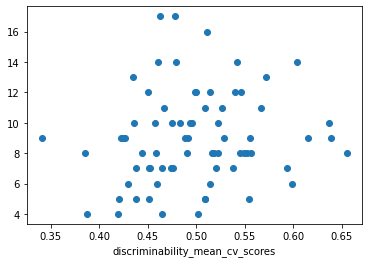

#### TESQ_E_distraction

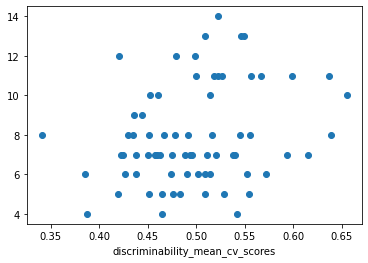

#### TESQ_E_goal_and_rule_setting

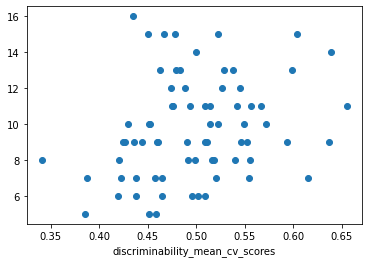

#### TESQ_E_sum

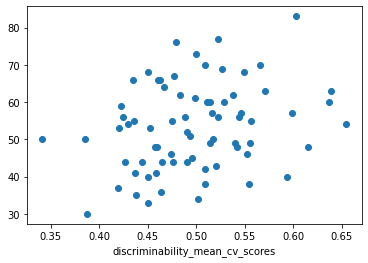

## harvardoxford-cortical_prob_Cingulate Gyrus, anterior division

### discriminability_overfit_accuracy

#### SST_SSRT

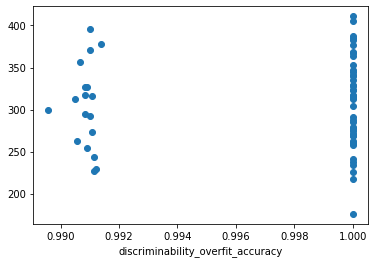

#### TESQ_E_suppression

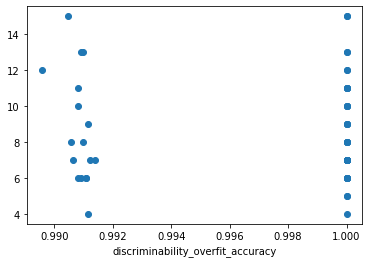

#### TESQ_E_avoidance_of_temptations

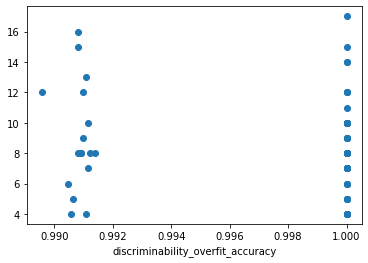

#### TESQ_E_goal_deliberation

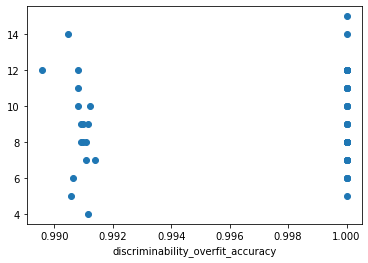

#### TESQ_E_controlling_temptations

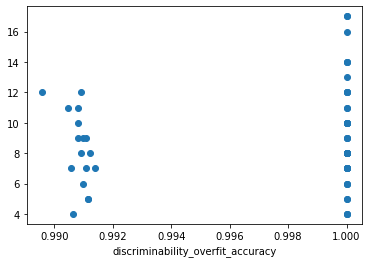

#### TESQ_E_distraction

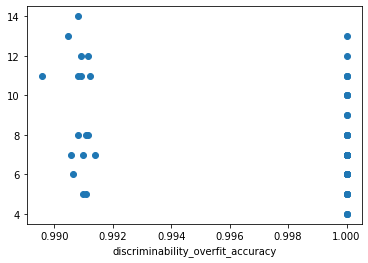

#### TESQ_E_goal_and_rule_setting

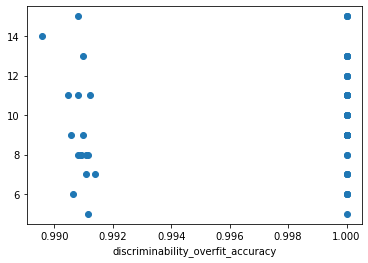

#### TESQ_E_sum

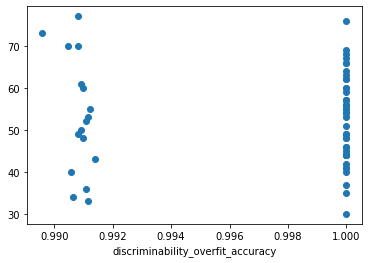

### discriminability_mean_cv_scores

#### SST_SSRT

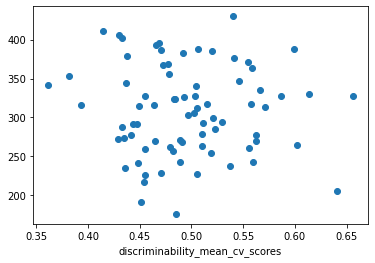

#### TESQ_E_suppression

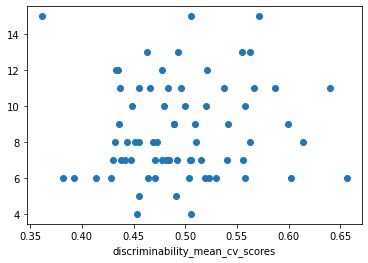

#### TESQ_E_avoidance_of_temptations

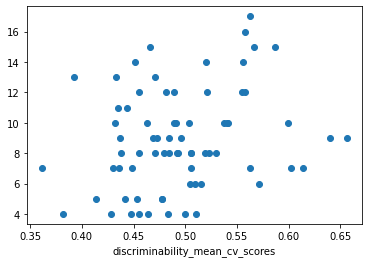

#### TESQ_E_goal_deliberation

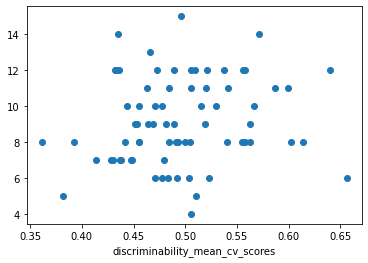

#### TESQ_E_controlling_temptations

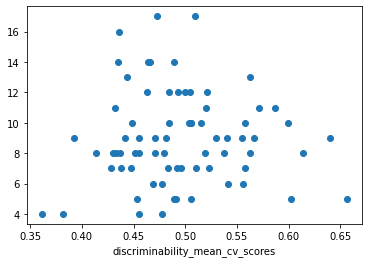

#### TESQ_E_distraction

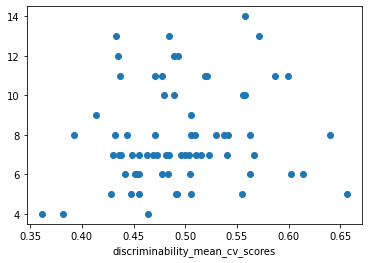

#### TESQ_E_goal_and_rule_setting

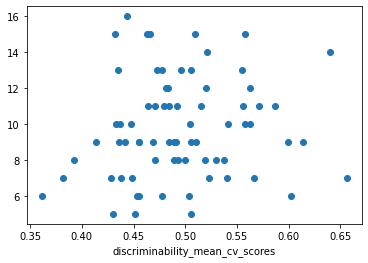

#### TESQ_E_sum

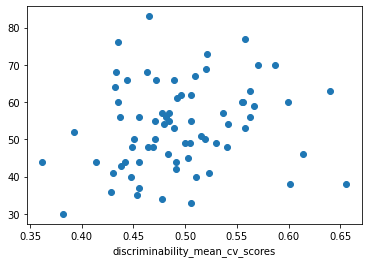

## harvardoxford-cortical_prob_Lateral Occipital Cortex, superior division

### discriminability_overfit_accuracy

#### SST_SSRT

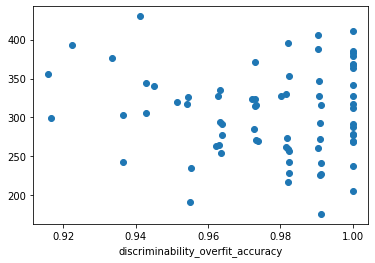

#### TESQ_E_suppression

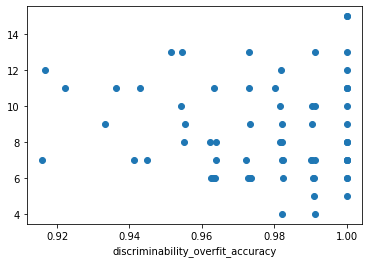

#### TESQ_E_avoidance_of_temptations

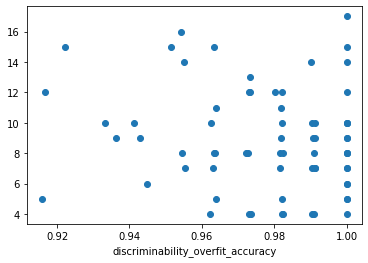

#### TESQ_E_goal_deliberation

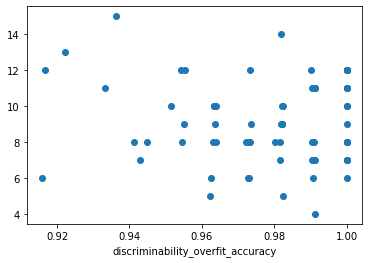

#### TESQ_E_controlling_temptations

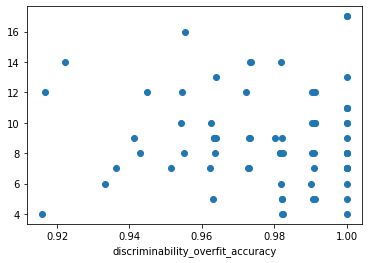

#### TESQ_E_distraction

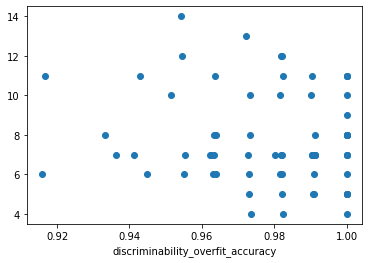

#### TESQ_E_goal_and_rule_setting

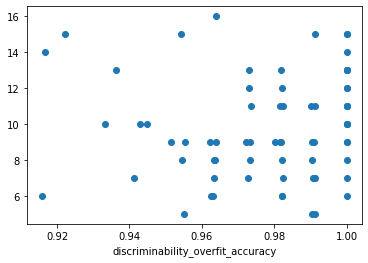

#### TESQ_E_sum

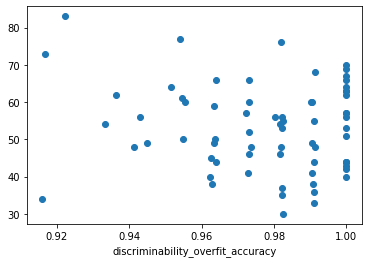

### discriminability_mean_cv_scores

#### SST_SSRT

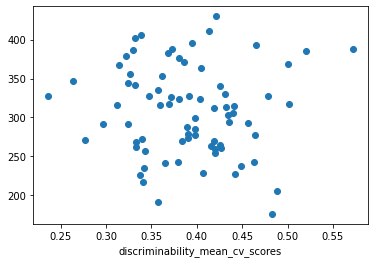

#### TESQ_E_suppression

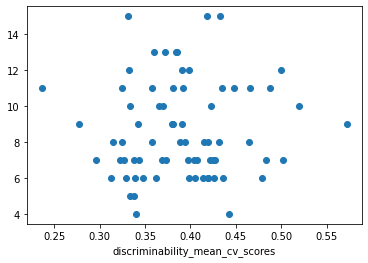

#### TESQ_E_avoidance_of_temptations

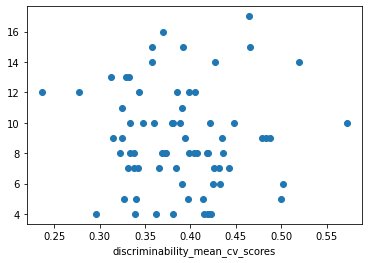

#### TESQ_E_goal_deliberation

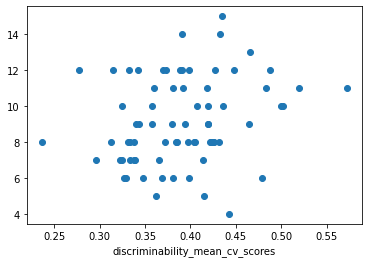

#### TESQ_E_controlling_temptations

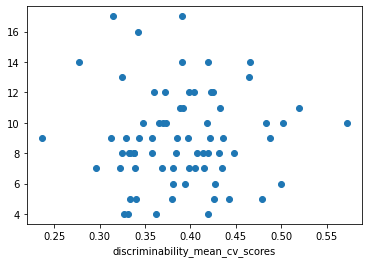

#### TESQ_E_distraction

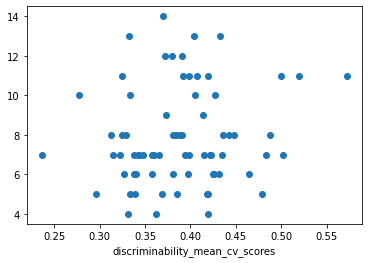

#### TESQ_E_goal_and_rule_setting

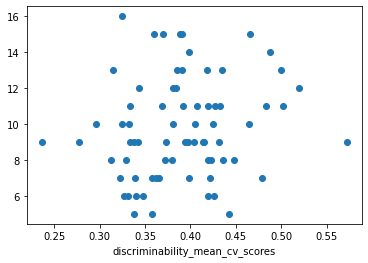

#### TESQ_E_sum

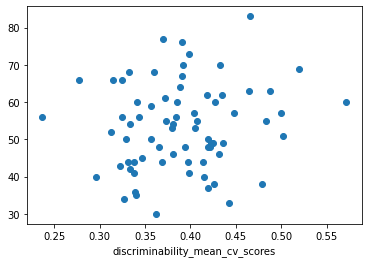

## harvardoxford-cortical_prob_Inferior Frontal Gyrus, pars opercularis

### discriminability_overfit_accuracy

#### SST_SSRT

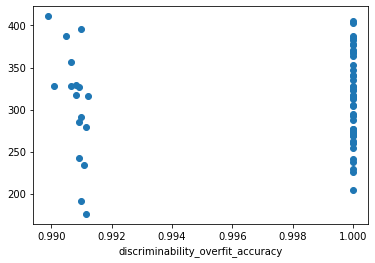

#### TESQ_E_suppression

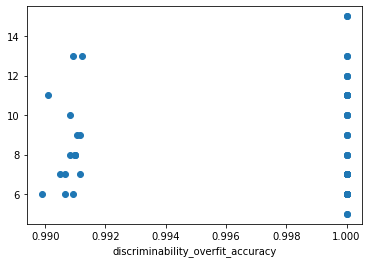

#### TESQ_E_avoidance_of_temptations

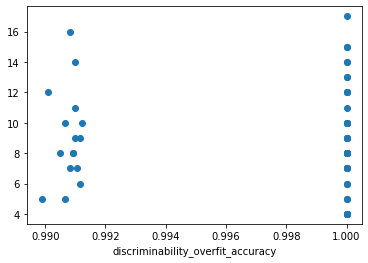

#### TESQ_E_goal_deliberation

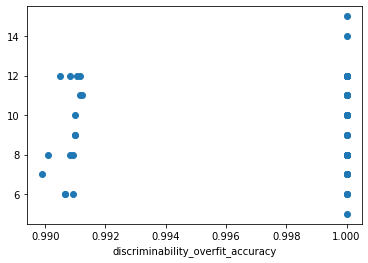

#### TESQ_E_controlling_temptations

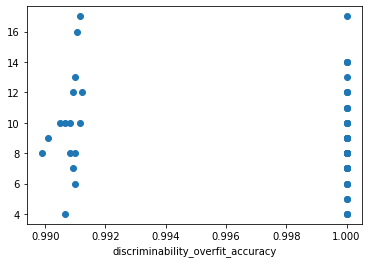

#### TESQ_E_distraction

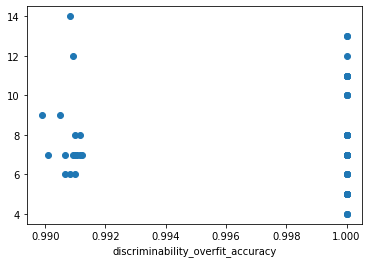

#### TESQ_E_goal_and_rule_setting

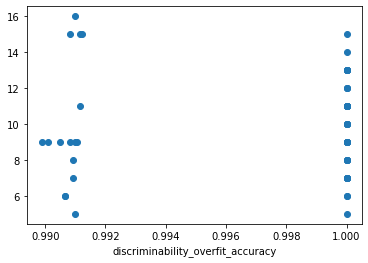

#### TESQ_E_sum

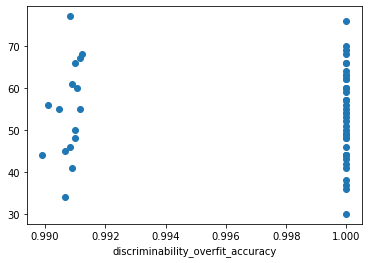

### discriminability_mean_cv_scores

#### SST_SSRT

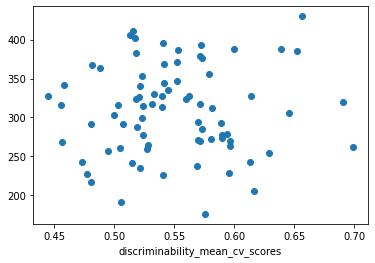

#### TESQ_E_suppression

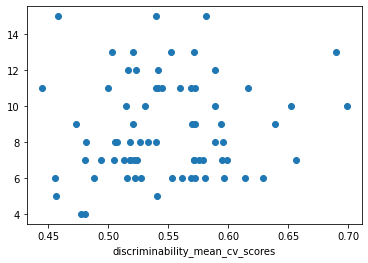

#### TESQ_E_avoidance_of_temptations

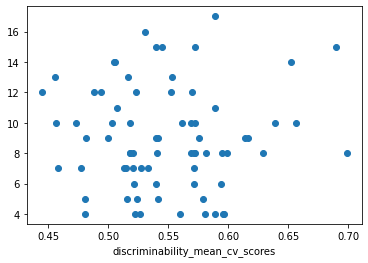

#### TESQ_E_goal_deliberation

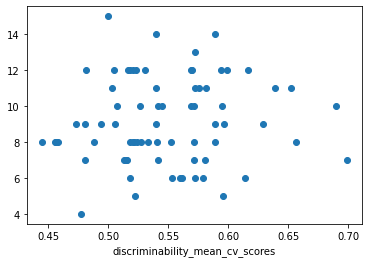

#### TESQ_E_controlling_temptations

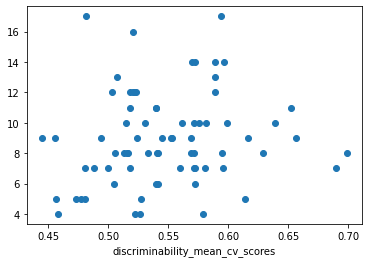

#### TESQ_E_distraction

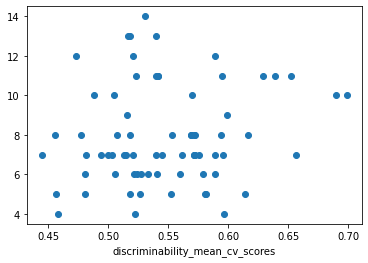

#### TESQ_E_goal_and_rule_setting

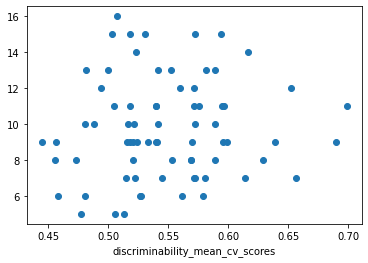

#### TESQ_E_sum

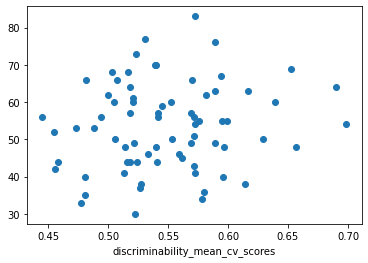

## harvardoxford-cortical_prob_Inferior Frontal Gyrus, pars triangularis

### discriminability_overfit_accuracy

#### SST_SSRT

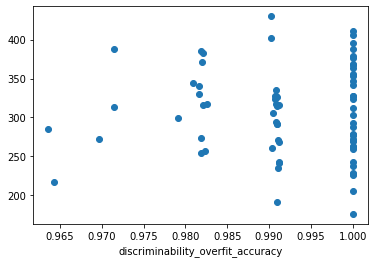

#### TESQ_E_suppression

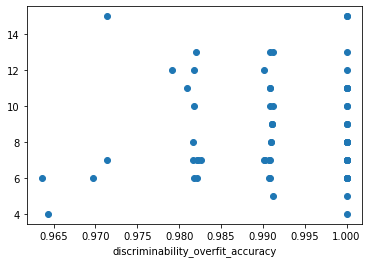

#### TESQ_E_avoidance_of_temptations

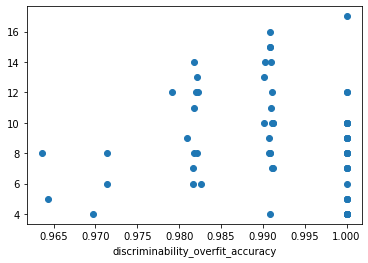

#### TESQ_E_goal_deliberation

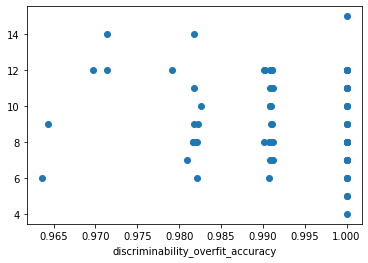

#### TESQ_E_controlling_temptations

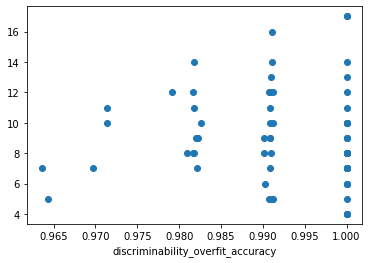

#### TESQ_E_distraction

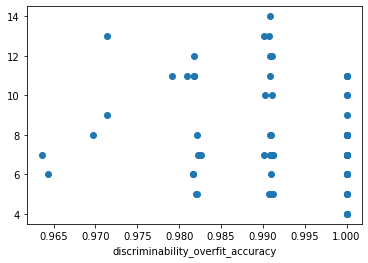

#### TESQ_E_goal_and_rule_setting

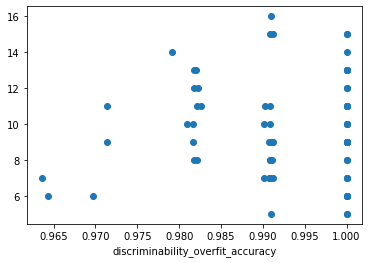

#### TESQ_E_sum

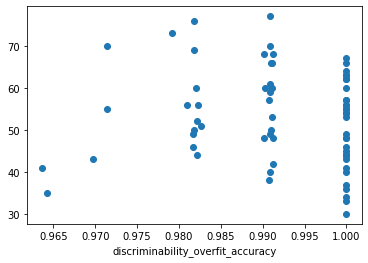

### discriminability_mean_cv_scores

#### SST_SSRT

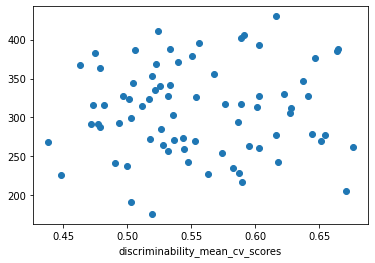

#### TESQ_E_suppression

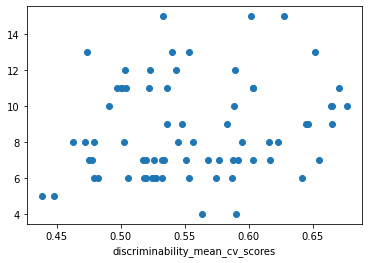

#### TESQ_E_avoidance_of_temptations

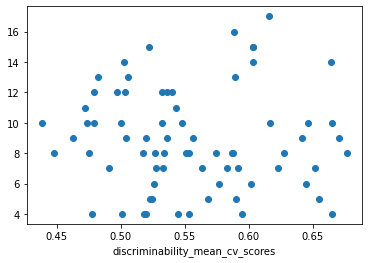

#### TESQ_E_goal_deliberation

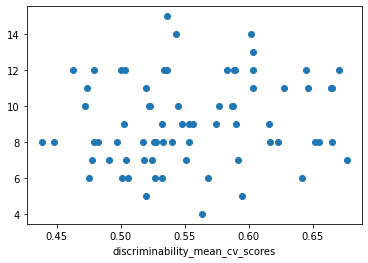

#### TESQ_E_controlling_temptations

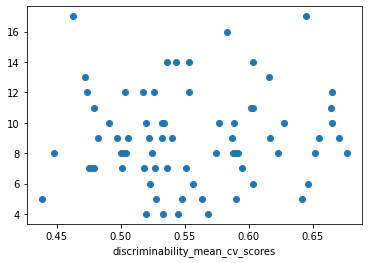

#### TESQ_E_distraction

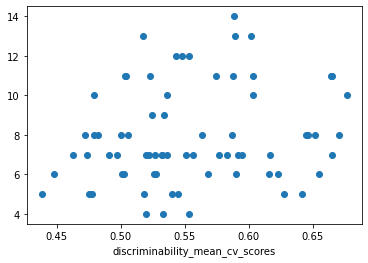

#### TESQ_E_goal_and_rule_setting

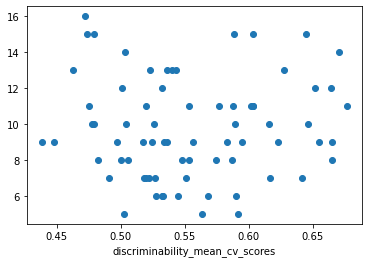

#### TESQ_E_sum

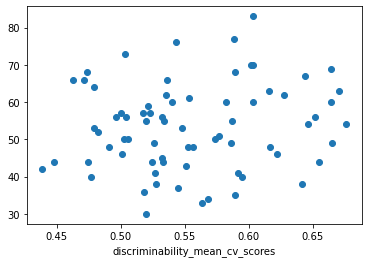

## harvardoxford-cortical_prob_Insular Cortex

### discriminability_overfit_accuracy

#### SST_SSRT

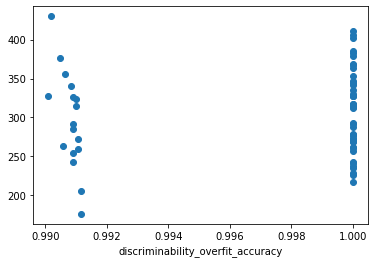

#### TESQ_E_suppression

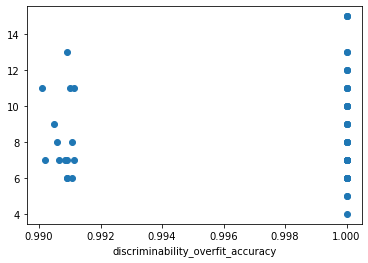

#### TESQ_E_avoidance_of_temptations

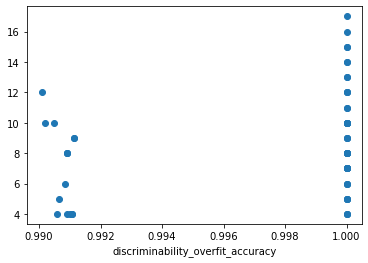

#### TESQ_E_goal_deliberation

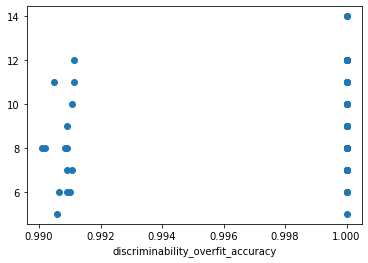

#### TESQ_E_controlling_temptations

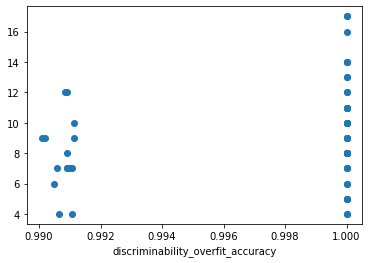

#### TESQ_E_distraction

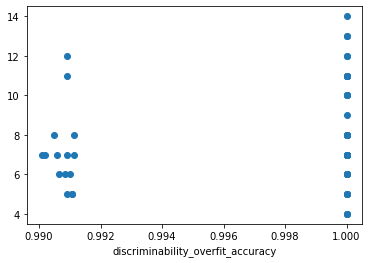

#### TESQ_E_goal_and_rule_setting

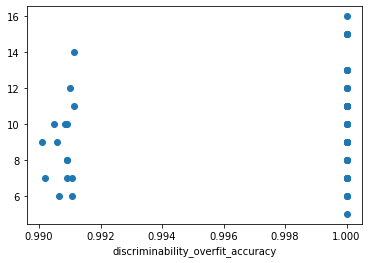

#### TESQ_E_sum

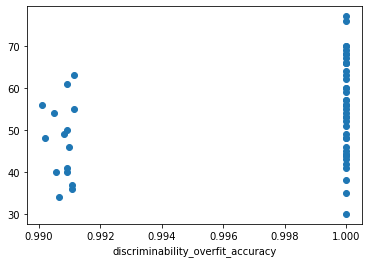

### discriminability_mean_cv_scores

#### SST_SSRT

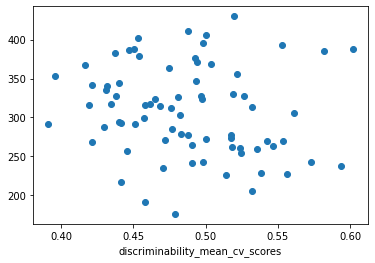

#### TESQ_E_suppression

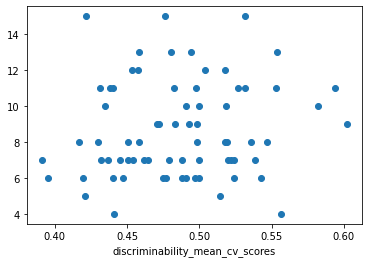

#### TESQ_E_avoidance_of_temptations

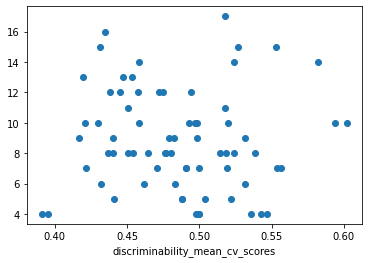

#### TESQ_E_goal_deliberation

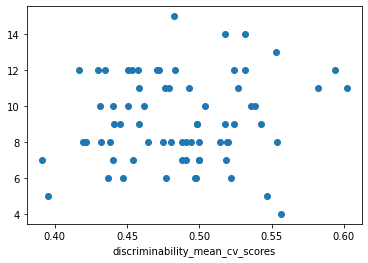

#### TESQ_E_controlling_temptations

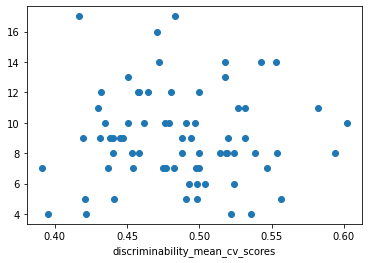

#### TESQ_E_distraction

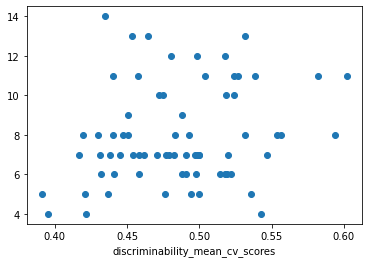

#### TESQ_E_goal_and_rule_setting

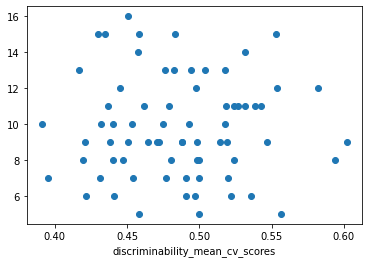

#### TESQ_E_sum

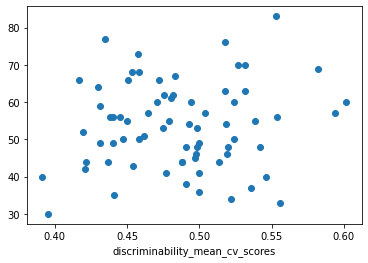

In [43]:
summary_across_mask_list = []
for mask_filepath in mask_list:

    mask_filename = os.path.basename(mask_filepath)
    mask_name = mask_filename.split(".")[0]
    
    display(Markdown("## " + mask_name))
    masked_analysis_filepath = (ml_data_folderpath + "/SST/discriminability_by_mask_" + 
        discriminability_version_id + "_" + mask_name + ".pkl")
        
    #go on to the next one if it doesn't exist
    if os.path.exists(masked_analysis_filepath)==False:
        print ("warning: " + masked_analysis_filepath + " does not exist.")
        continue
        
    with open(masked_analysis_filepath, 'rb') as handle:
        summary_results = pickle.load(handle)
        
    summary_results2 = summary_results.rename(columns={
        'mean_cv_scores':'discriminability_mean_cv_scores',
        'overfit_accuracy':'discriminability_overfit_accuracy'})
    
    ind_div_combined = summary_results2.merge(individual_differences)
    
    ind_div_combined_3sd = remove_selected_outliers_tesq_study(
        ind_div_combined,
        show_plot=False)
    
    tabular_summary = display_discriminability_correlations_tesq(ind_div_combined_3sd)
    
    tabular_summary['mask_name']=mask_name
    
    summary_across_mask_list = summary_across_mask_list + [tabular_summary]
    
    
summary_across_masks = pd.concat(summary_across_mask_list)
    

    

In [44]:
summary_across_masks.columns

Index(['neural_var', 'correlate', 'pearson's r', 'pearson's r p-value',
       'spearman's rho', 'spearman's rho p-value', 'mask_name'],
      dtype='object')

In [45]:
pd.set_option('display.max_rows', 200)

In [46]:
np.unique(summary_across_masks.correlate)

array(['SST_SSRT', 'TESQ_E_avoidance_of_temptations',
       'TESQ_E_controlling_temptations', 'TESQ_E_distraction',
       'TESQ_E_goal_and_rule_setting', 'TESQ_E_goal_deliberation',
       'TESQ_E_sum', 'TESQ_E_suppression'], dtype=object)

In [47]:
summary_across_masks_cv = summary_across_masks.loc[summary_across_masks['neural_var']=='discriminability_mean_cv_scores'].copy()

In [48]:
fdr_corrected = fdrcorrection(summary_across_masks_cv["pearson's r p-value"],alpha=0.05)
summary_across_masks_cv["pearson's r p-value fdr-cor"] = fdr_corrected[1]

In [49]:
summary_across_masks_cv.shape

(120, 8)

In [50]:
summary_across_masks_cv.loc[:,
                            ['correlate', "pearson's r", "pearson's r p-value","pearson's r p-value fdr-cor",
                             'mask_name']
                        ].sort_values("pearson's r p-value")

correlate  pearson's r  pearson's r p-value  \
9                TESQ_E_suppression     0.293277             0.013740   
15                       TESQ_E_sum     0.270354             0.021628   
13               TESQ_E_distraction     0.263271             0.025456   
14     TESQ_E_goal_and_rule_setting     0.262843             0.025705   
13               TESQ_E_distraction     0.260048             0.028514   
11         TESQ_E_goal_deliberation     0.253977             0.030143   
10  TESQ_E_avoidance_of_temptations     0.248634             0.035204   
11         TESQ_E_goal_deliberation     0.240961             0.041451   
15                       TESQ_E_sum     0.222097             0.058958   
13               TESQ_E_distraction     0.219650             0.067697   
13               TESQ_E_distraction     0.215282             0.069352   
13               TESQ_E_distraction     0.216602             0.069628   
9                TESQ_E_suppression     0.209269             0.077695   
8                          SST_SSRT    -0.191618             0.101946   
13               TESQ_E_distraction     0.194993             0.108362   
13               TESQ_E_distraction     0.193265             0.111588   
11         TESQ_E_goal_deliberation     0.188756             0.112303   
10  TESQ_E_avoidance_of_temptations     0.187155             0.112854   
9                TESQ_E_suppression     0.187231             0.115288   
15                       TESQ_E_sum     0.183106             0.123667   
13               TESQ_E_distraction     0.181639             0.129522   
11         TESQ_E_goal_deliberation     0.171729             0.149187   
14     TESQ_E_goal_and_rule_setting     0.168092             0.158124   
15                       TESQ_E_sum     0.169043             0.161832   
15                       TESQ_E_sum     0.164668             0.163871   
14     TESQ_E_goal_and_rule_setting     0.167753             0.165103   
13               TESQ_E_distraction     0.163163             0.173969   
13               TESQ_E_distraction     0.163593             0.175990   
11         TESQ_E_goal_deliberation     0.159119             0.181855   
13               TESQ_E_distraction     0.158584             0.186531   
15                       TESQ_E_sum     0.154438             0.195215   
11         TESQ_E_goal_deliberation     0.154256             0.195750   
13               TESQ_E_distraction     0.151726             0.203272   
14     TESQ_E_goal_and_rule_setting     0.147008             0.214563   
11         TESQ_E_goal_deliberation     0.147801             0.222069   
13               TESQ_E_distraction     0.144897             0.227963   
15                       TESQ_E_sum     0.142120             0.230365   
8                          SST_SSRT    -0.140019             0.230860   
10  TESQ_E_avoidance_of_temptations    -0.142769             0.231549   
12   TESQ_E_controlling_temptations     0.142739             0.231650   
12   TESQ_E_controlling_temptations     0.141416             0.232708   
13               TESQ_E_distraction     0.145280             0.233626   
9                TESQ_E_suppression     0.139075             0.240610   
15                       TESQ_E_sum     0.138841             0.244775   
15                       TESQ_E_sum     0.138610             0.245569   
8                          SST_SSRT     0.130518             0.257885   
14     TESQ_E_goal_and_rule_setting     0.131578             0.277580   
9                TESQ_E_suppression    -0.129527             0.285207   
11         TESQ_E_goal_deliberation     0.126361             0.286753   
9                TESQ_E_suppression     0.127645             0.288775   
8                          SST_SSRT     0.120946             0.304667   
14     TESQ_E_goal_and_rule_setting     0.119393             0.317828   
11         TESQ_E_goal_deliberation     0.120102             0.318450   
14     TESQ_E_goal_and_rule_setting     0.113506             0.342446   
9          

In [51]:
summary_across_masks_overfit = summary_across_masks.loc[summary_across_masks['neural_var']=='discriminability_overfit_accuracy'].copy()
summary_across_masks_overfit["pearson's r p-value fdr-cor"] = fdrcorrection(summary_across_masks_overfit["pearson's r p-value"],alpha=0.05)[1]

In [52]:
summary_across_masks_overfit[
                         ['correlate', "pearson's r", "pearson's r p-value","pearson's r p-value fdr-cor", 'mask_name']
                        ].sort_values("pearson's r p-value")[0:30]

correlate  pearson's r  pearson's r p-value  \
0                         SST_SSRT    -0.334074             0.004707   
5               TESQ_E_distraction    -0.326982             0.010108   
5               TESQ_E_distraction    -0.314076             0.010224   
5               TESQ_E_distraction    -0.291408             0.015125   
1               TESQ_E_suppression     0.286031             0.016377   
3         TESQ_E_goal_deliberation    -0.309988             0.018944   
7                       TESQ_E_sum     0.295557             0.023046   
7                       TESQ_E_sum    -0.256636             0.031987   
7                       TESQ_E_sum    -0.261058             0.032860   
2  TESQ_E_avoidance_of_temptations     0.270541             0.038226   
3         TESQ_E_goal_deliberation    -0.235558             0.054992   
3         TESQ_E_goal_deliberation     0.241092             0.065845   
7                       TESQ_E_sum     0.217833             0.070059   
1               TESQ_E_suppression    -0.207987             0.084031   
4   TESQ_E_controlling_temptations     0.206220             0.086757   
0                         SST_SSRT    -0.208615             0.090238   
5               TESQ_E_distraction    -0.200892             0.095402   
7                       TESQ_E_sum    -0.219678             0.100608   
4   TESQ_E_controlling_temptations     0.211573             0.107700   
2  TESQ_E_avoidance_of_temptations    -0.188390             0.118330   
7                       TESQ_E_sum     0.196881             0.118923   
4   TESQ_E_controlling_temptations     0.199443             0.120157   
6     TESQ_E_goal_and_rule_setting     0.192220             0.128090   
6     TESQ_E_goal_and_rule_setting     0.196496             0.135803   
2  TESQ_E_avoidance_of_temptations    -0.175790             0.151595   
6     TESQ_E_goal_and_rule_setting    -0.174199             0.158582   
1               TESQ_E_suppression    -0.174173             0.158646   
0                         SST_SSRT    -0.165004             0.163003   
0                         SST_SSRT     0.163805             0.163151   
6     TESQ_E_goal_and_rule_setting     0.167606             0.165480   

   pearson's r p-value fdr-cor  \
0                          NaN   
5                          NaN   
5                          NaN   
5                          NaN   
1                          NaN   
3                          NaN   
7                          NaN   
7                          NaN   
7                          NaN   
2                          NaN   
3                          NaN   
3                          NaN   
7                          NaN   
1                          NaN   
4                          NaN   
0                          NaN   
5                          NaN   
7                          NaN   
4                          NaN   
2                          NaN   
7                          NaN   
4                          NaN   
6                          NaN   
6                          NaN   
2                          NaN   
6                          NaN   
1                          NaN   
0                          NaN   
0                          NaN   
6                          NaN   

                                           mask_name  
0          harvardoxford-cortical_prob_Angular Gyrus  
5  harvardoxford-cortical_prob_Cingulate Gyrus, a...  
5          harvardoxford-cortical_prob_Angular Gyrus  
5  harvardoxford-cortical_prob_Superior Frontal G...  
1  harvardoxford-cortical_prob_Frontal Operculum ...  
3  harvardoxford-cortical_prob_Cingulate Gyrus, p...  
7         harvardoxford-cortical_prob_Insular Cortex  
7  harvardoxford-cortical_prob_Superior Frontal G...  
7          harvardoxford-cortical_prob_Angular Gyrus  
2         harvardoxford-cortical_prob_Insular Cortex  
3          harvardoxford-cortical_prob_Angular Gyrus  
3         harvardoxford-cortical_prob_Insular Cortex  
7  harvardoxford-corti

### RTFS/PES

In [20]:
discriminability_version_id="pscg_v_2"

In [21]:
from analyze_results import get_ind_div_for_pes_combined

In [22]:
def display_discriminability_correlations_rtfs(ind_div_combined_3sd):
    return(display_discriminability_correlations(
        ind_div_combined_3sd,
        neural_vars = ['discriminability_overfit_accuracy','discriminability_mean_cv_scores'],
        correlations = [
        'RTFS_f1_minus_f2','RTFS_factor_1','RTFS_factor_2',
        'SST_SSRT','pes_mean_limited','PostErrorSlowW1','cancer_promoting_minus_preventing_FFQ',
        'cancer_promoting_FFQ','cancer_preventing_FFQ']
    ))
           
def remove_selected_outliers_rtfs_study(ind_div_combined,show_plot=False):
    
    idc_outliers_removed = remove_selected_outliers(ind_div_combined,
    ['discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores',
     
     'RTFS_f1_minus_f2','RTFS_factor_1','RTFS_factor_2',
        'SST_SSRT','pes_mean_limited','PostErrorSlowW1','cancer_promoting_minus_preventing_FFQ',
        'cancer_promoting_FFQ','cancer_preventing_FFQ'
    ],
    show_plot=False)
    return(idc_outliers_removed)



## negative affect_association-test_z_FDR_0

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores', 'mask_threshold',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=136)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


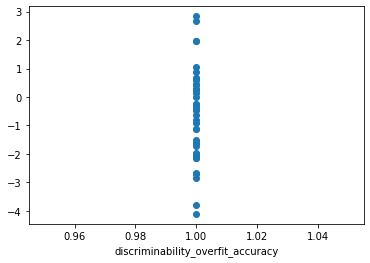

#### RTFS_factor_1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


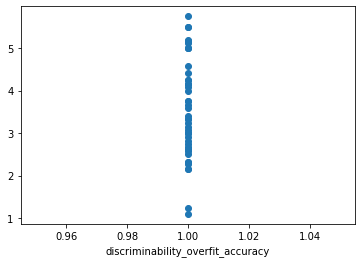

#### RTFS_factor_2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


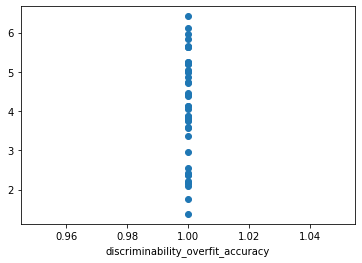

#### SST_SSRT

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


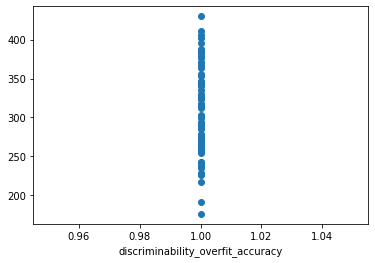

#### pes_mean_limited

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


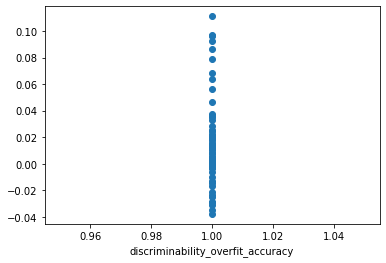

#### PostErrorSlowW1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


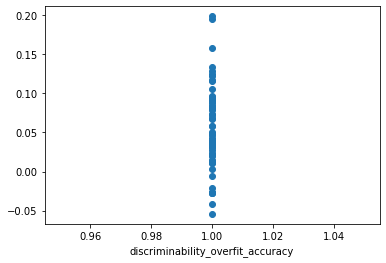

#### cancer_promoting_minus_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


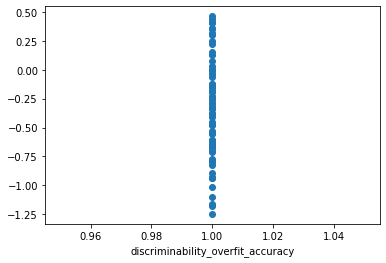

#### cancer_promoting_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


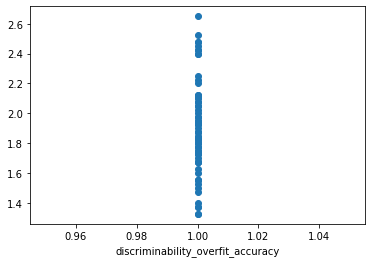

#### cancer_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


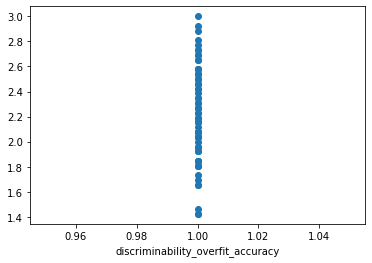

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

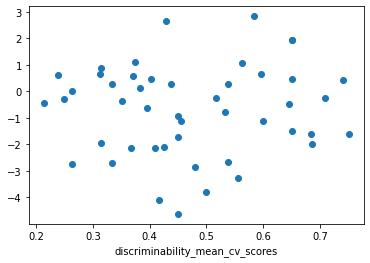

#### RTFS_factor_1

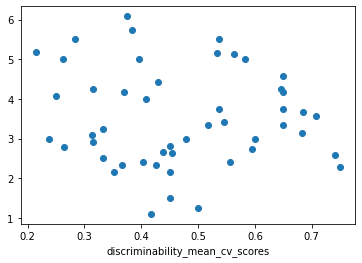

#### RTFS_factor_2

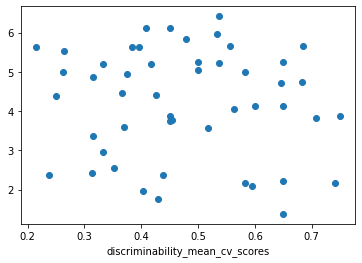

#### SST_SSRT

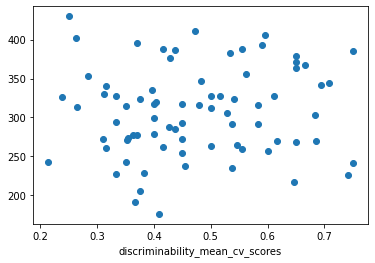

#### pes_mean_limited

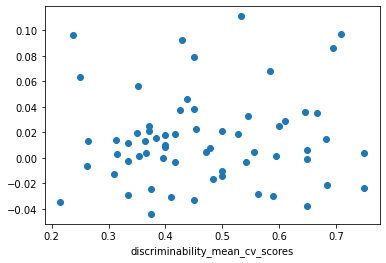

#### PostErrorSlowW1

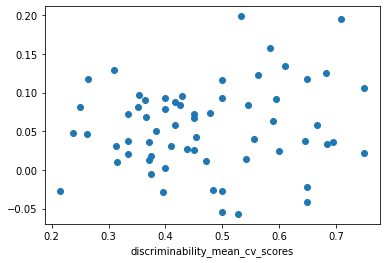

#### cancer_promoting_minus_preventing_FFQ

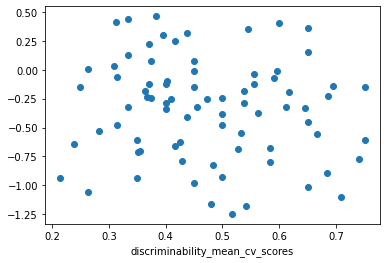

#### cancer_promoting_FFQ

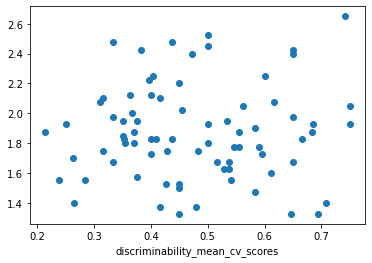

#### cancer_preventing_FFQ

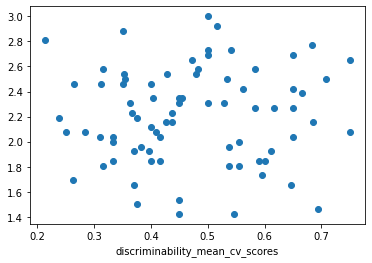

## response inhibition_association-test_z_FDR_0

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores', 'mask_threshold',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=136)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


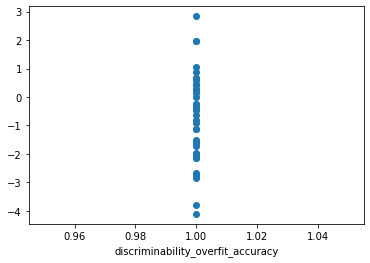

#### RTFS_factor_1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


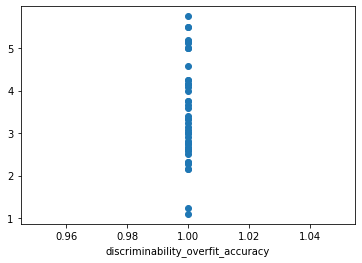

#### RTFS_factor_2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


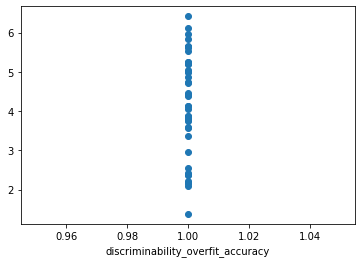

#### SST_SSRT

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


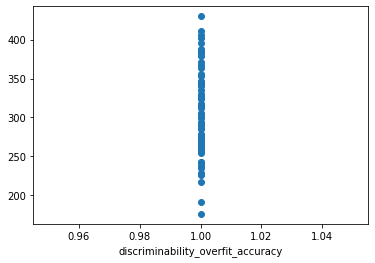

#### pes_mean_limited

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


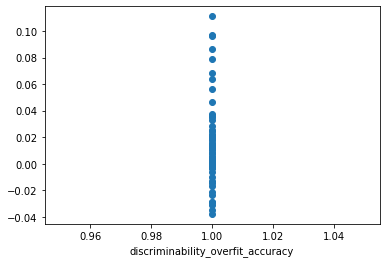

#### PostErrorSlowW1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


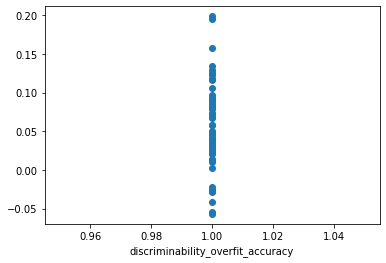

#### cancer_promoting_minus_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


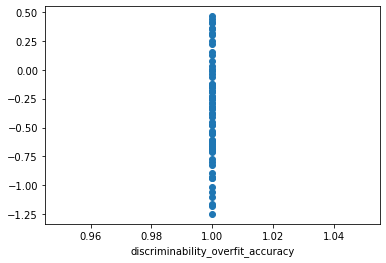

#### cancer_promoting_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


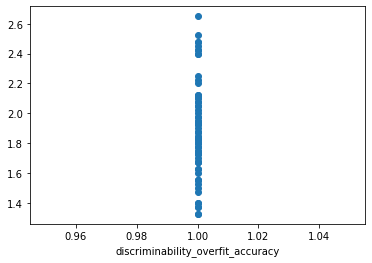

#### cancer_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


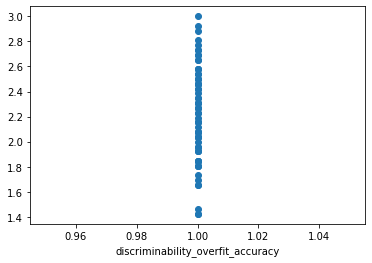

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

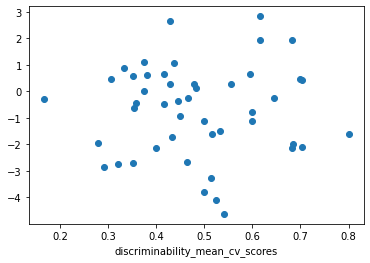

#### RTFS_factor_1

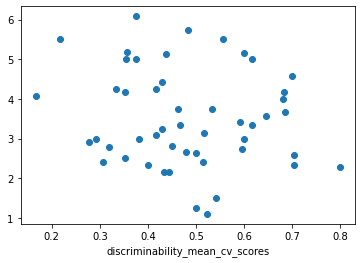

#### RTFS_factor_2

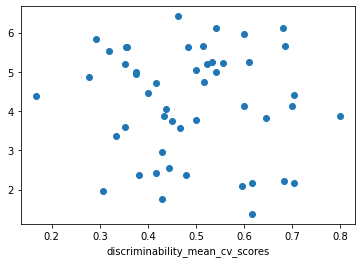

#### SST_SSRT

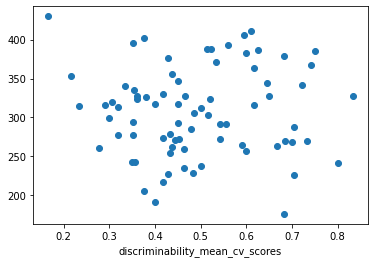

#### pes_mean_limited

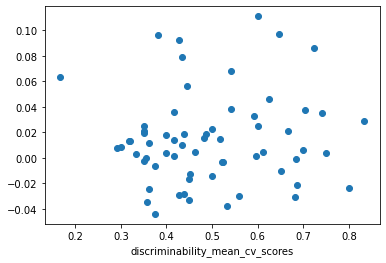

#### PostErrorSlowW1

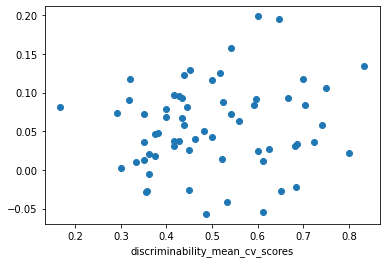

#### cancer_promoting_minus_preventing_FFQ

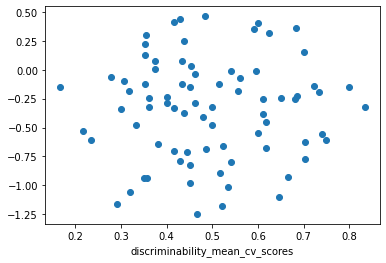

#### cancer_promoting_FFQ

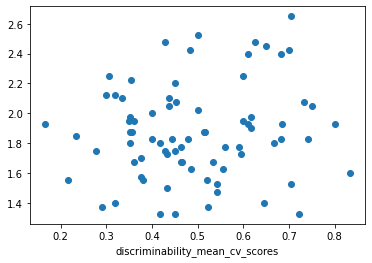

#### cancer_preventing_FFQ

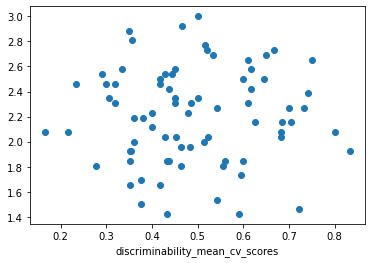

## negative emotions_association-test_z_FDR_0

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores', 'mask_threshold',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=136)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


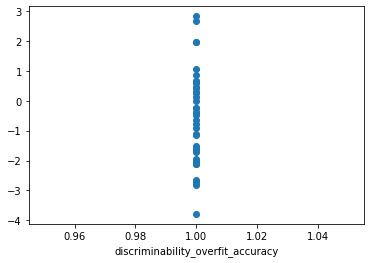

#### RTFS_factor_1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


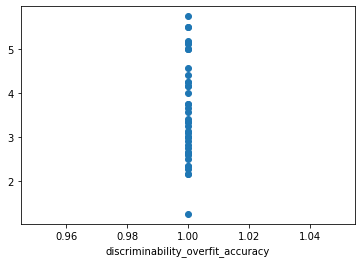

#### RTFS_factor_2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


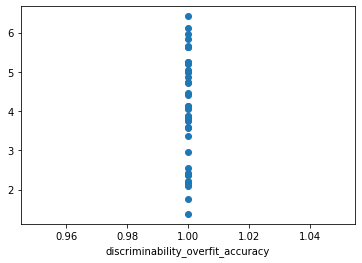

#### SST_SSRT

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


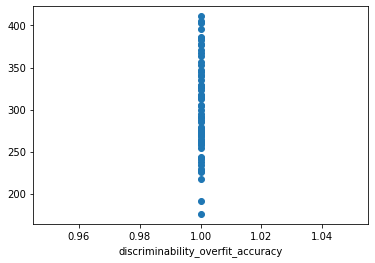

#### pes_mean_limited

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


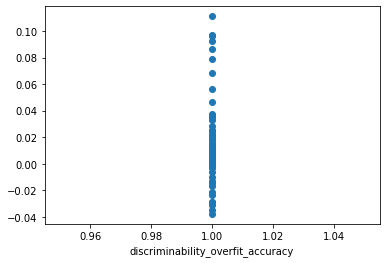

#### PostErrorSlowW1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


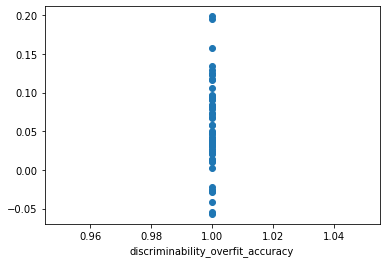

#### cancer_promoting_minus_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


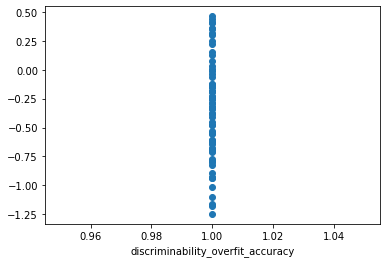

#### cancer_promoting_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


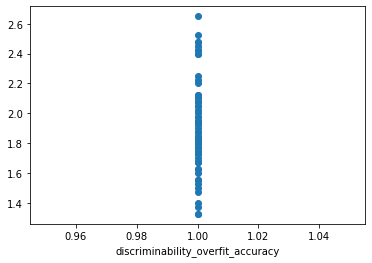

#### cancer_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


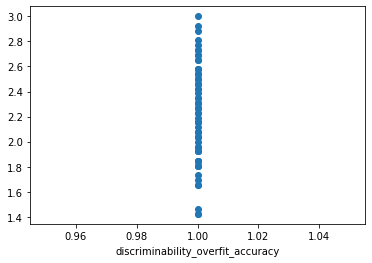

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

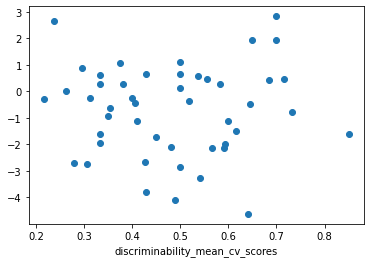

#### RTFS_factor_1

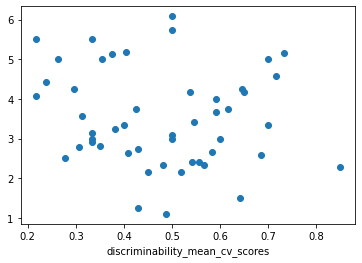

#### RTFS_factor_2

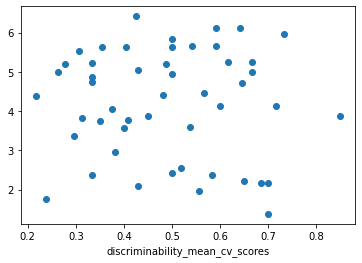

#### SST_SSRT

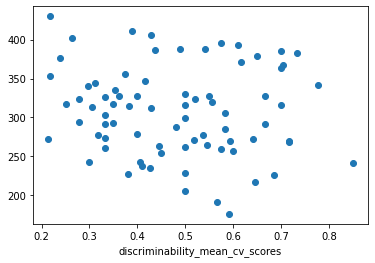

#### pes_mean_limited

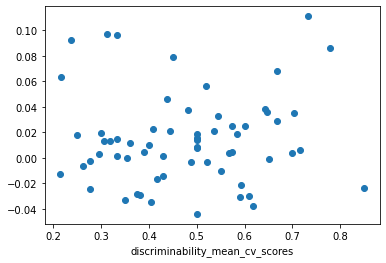

#### PostErrorSlowW1

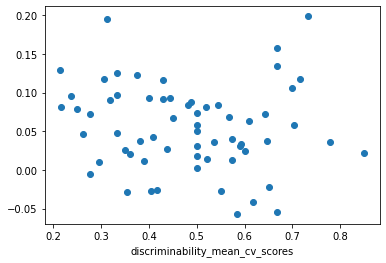

#### cancer_promoting_minus_preventing_FFQ

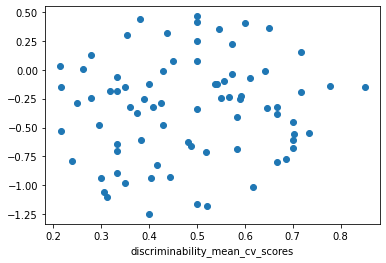

#### cancer_promoting_FFQ

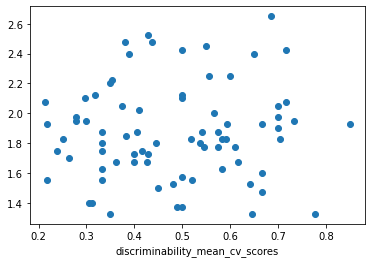

#### cancer_preventing_FFQ

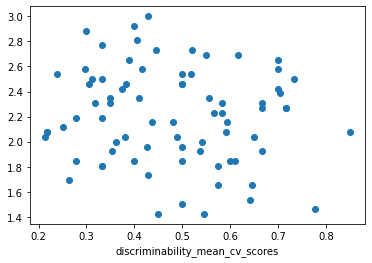

## harvardoxford-cortical_prob_Superior Frontal Gyrus

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores', 'mask_threshold',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=136)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


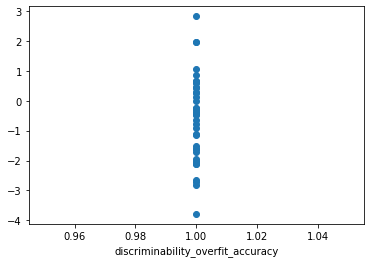

#### RTFS_factor_1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


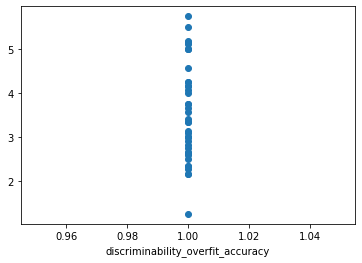

#### RTFS_factor_2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


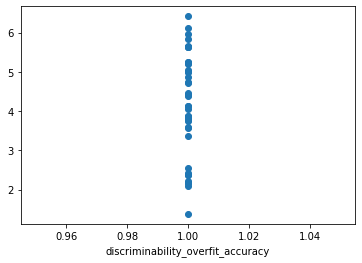

#### SST_SSRT

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


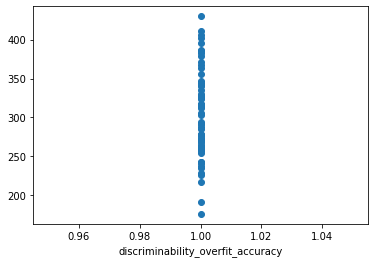

#### pes_mean_limited

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


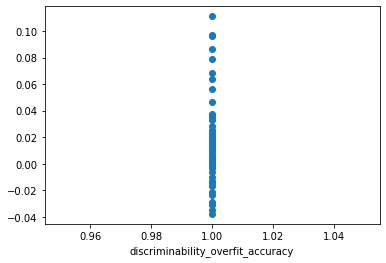

#### PostErrorSlowW1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


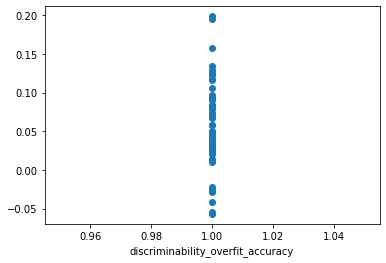

#### cancer_promoting_minus_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


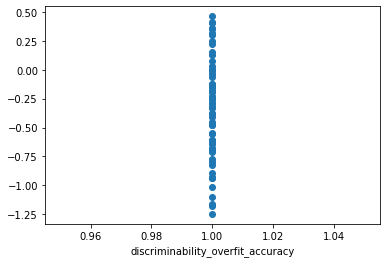

#### cancer_promoting_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


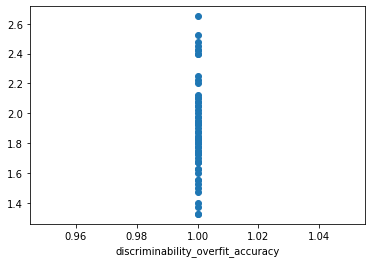

#### cancer_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


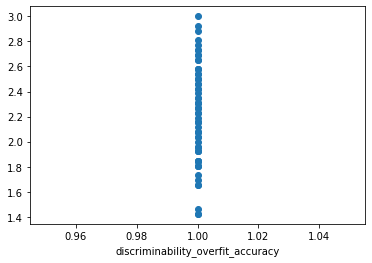

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

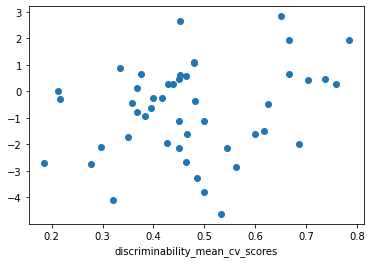

#### RTFS_factor_1

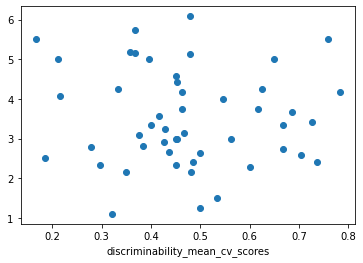

#### RTFS_factor_2

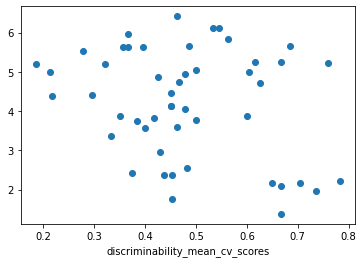

#### SST_SSRT

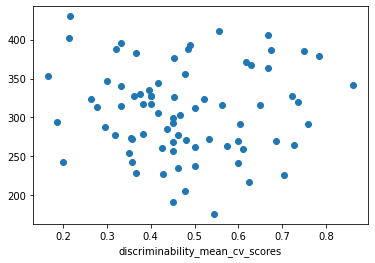

#### pes_mean_limited

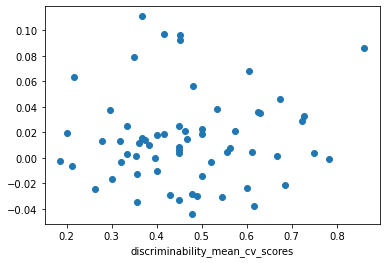

#### PostErrorSlowW1

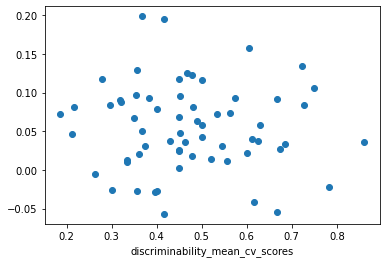

#### cancer_promoting_minus_preventing_FFQ

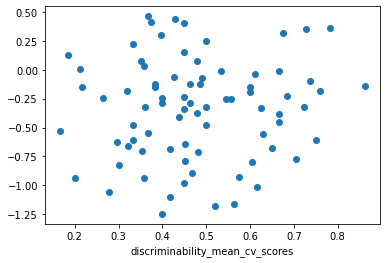

#### cancer_promoting_FFQ

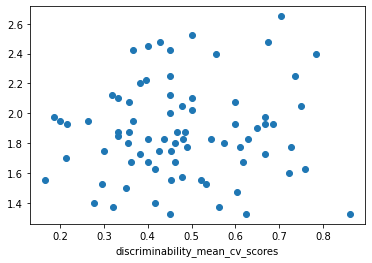

#### cancer_preventing_FFQ

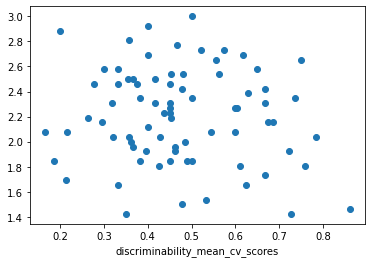

## harvardoxford-cortical_prob_Frontal Pole

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores', 'mask_threshold',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=136)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


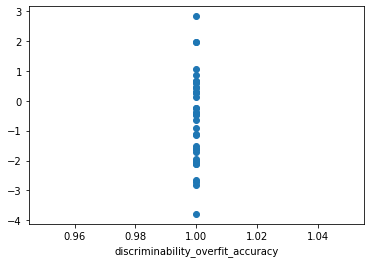

#### RTFS_factor_1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


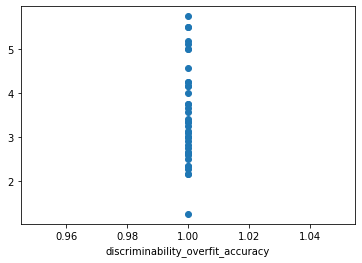

#### RTFS_factor_2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


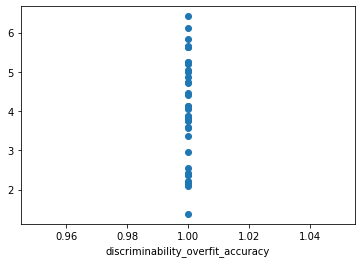

#### SST_SSRT

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


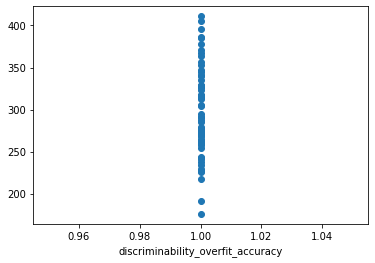

#### pes_mean_limited

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


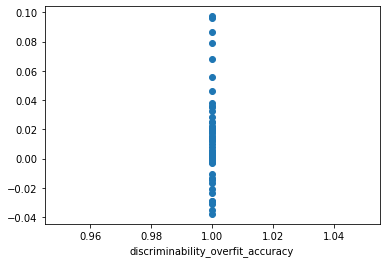

#### PostErrorSlowW1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


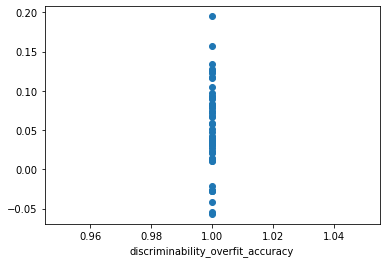

#### cancer_promoting_minus_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


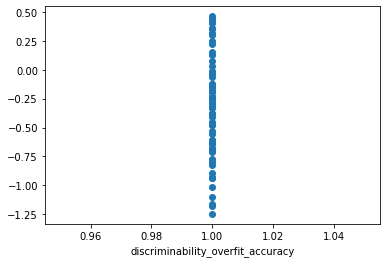

#### cancer_promoting_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


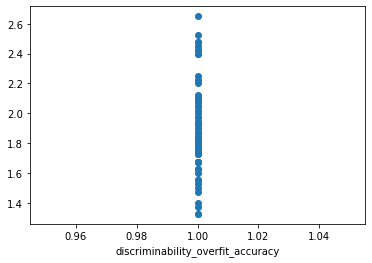

#### cancer_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


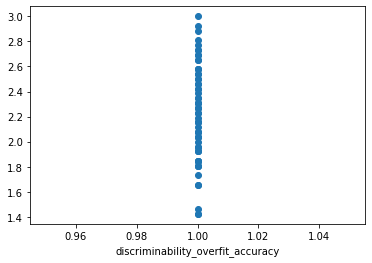

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

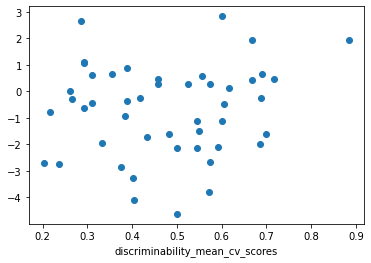

#### RTFS_factor_1

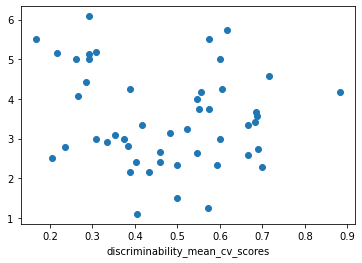

#### RTFS_factor_2

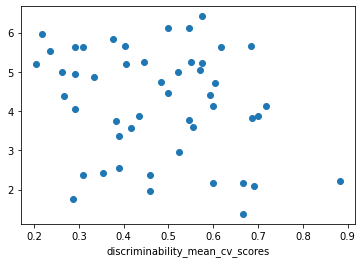

#### SST_SSRT

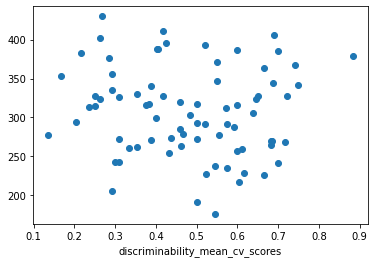

#### pes_mean_limited

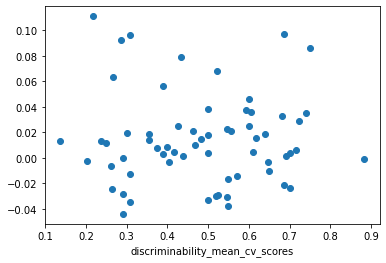

#### PostErrorSlowW1

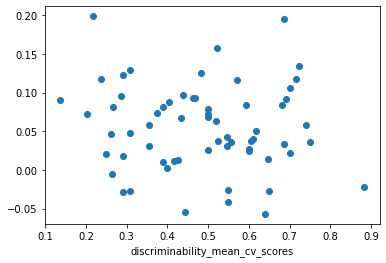

#### cancer_promoting_minus_preventing_FFQ

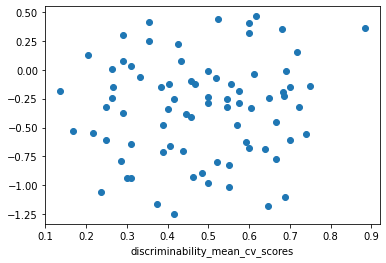

#### cancer_promoting_FFQ

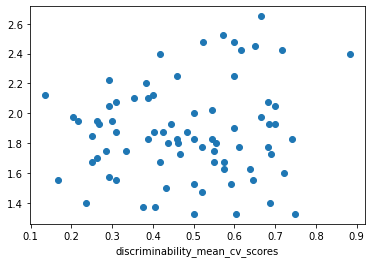

#### cancer_preventing_FFQ

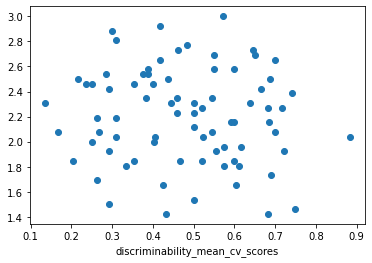

## harvardoxford-cortical_prob_Cingulate Gyrus, posterior division

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores', 'mask_threshold',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=136)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


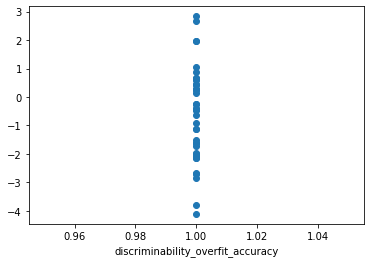

#### RTFS_factor_1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


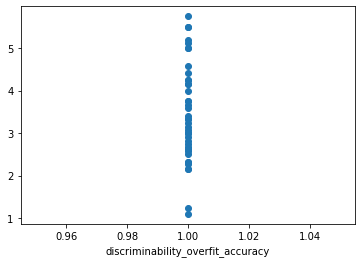

#### RTFS_factor_2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


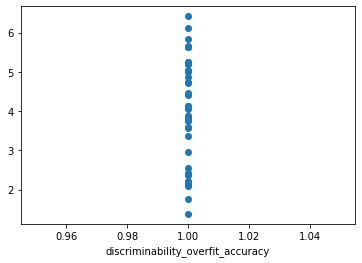

#### SST_SSRT

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


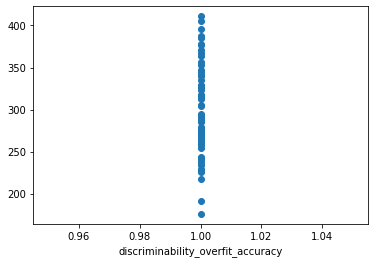

#### pes_mean_limited

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


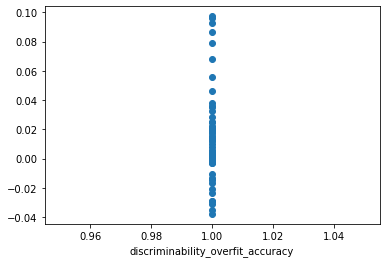

#### PostErrorSlowW1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


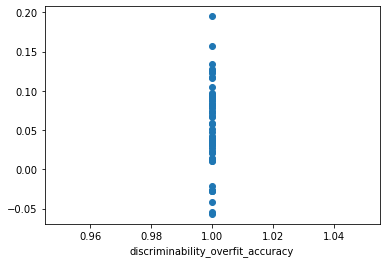

#### cancer_promoting_minus_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


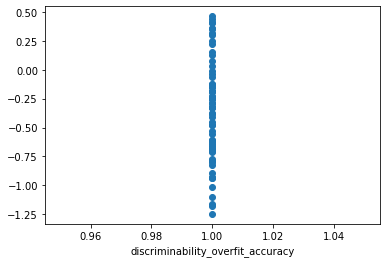

#### cancer_promoting_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


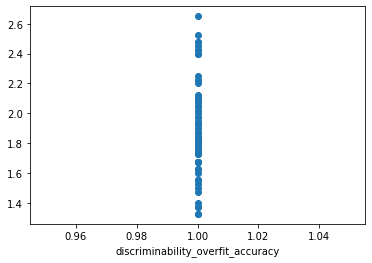

#### cancer_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


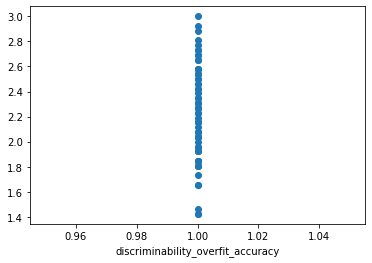

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

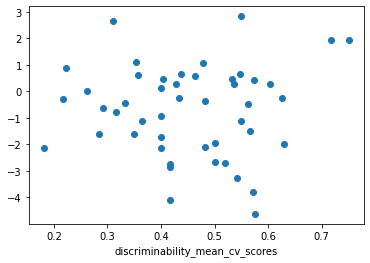

#### RTFS_factor_1

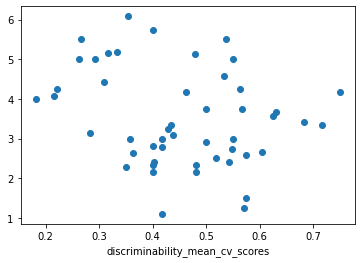

#### RTFS_factor_2

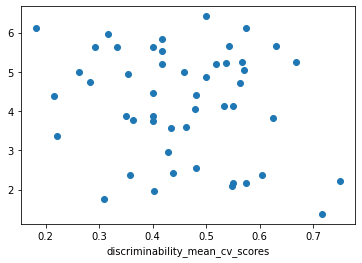

#### SST_SSRT

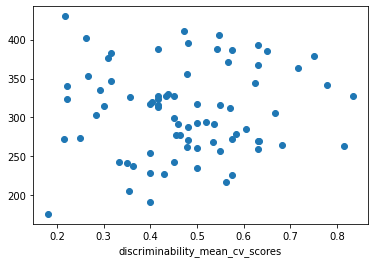

#### pes_mean_limited

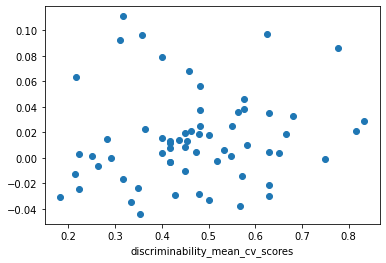

#### PostErrorSlowW1

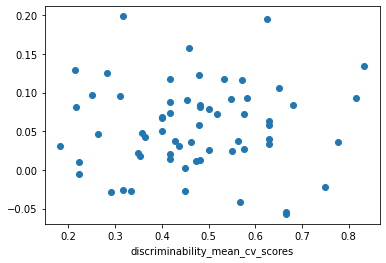

#### cancer_promoting_minus_preventing_FFQ

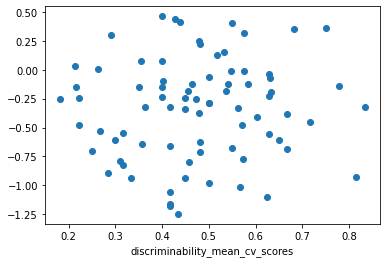

#### cancer_promoting_FFQ

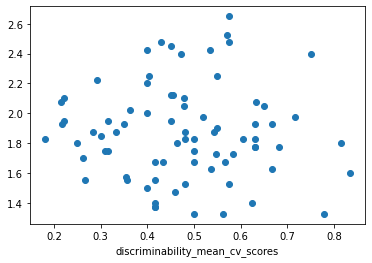

#### cancer_preventing_FFQ

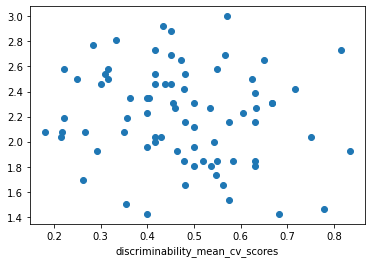

## harvardoxford-cortical_prob_Frontal Orbital Cortex

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores', 'mask_threshold',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=136)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


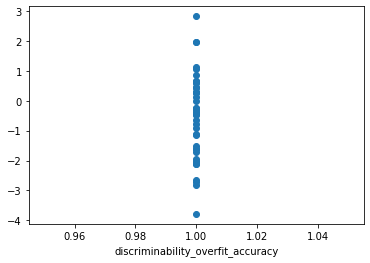

#### RTFS_factor_1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


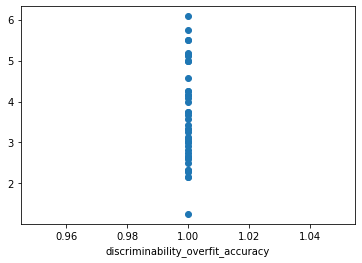

#### RTFS_factor_2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


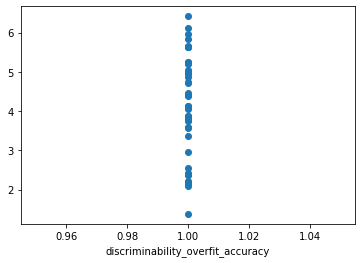

#### SST_SSRT

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


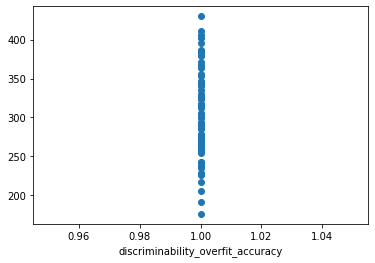

#### pes_mean_limited

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


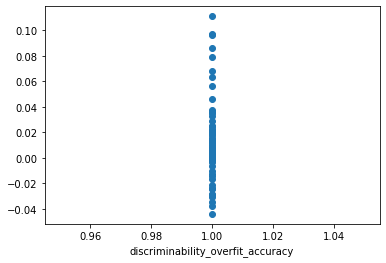

#### PostErrorSlowW1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


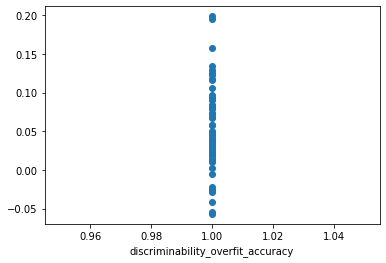

#### cancer_promoting_minus_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


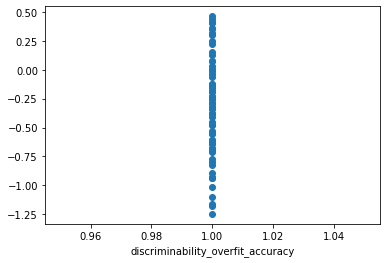

#### cancer_promoting_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


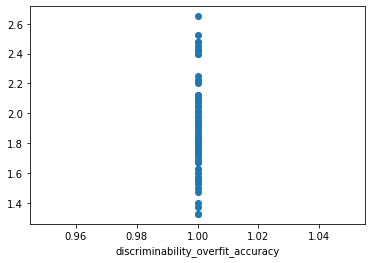

#### cancer_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


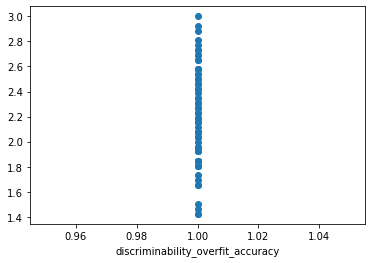

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

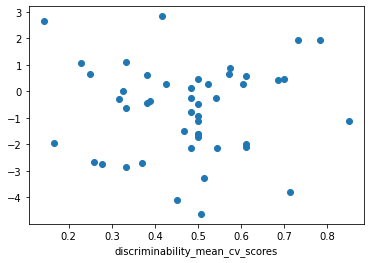

#### RTFS_factor_1

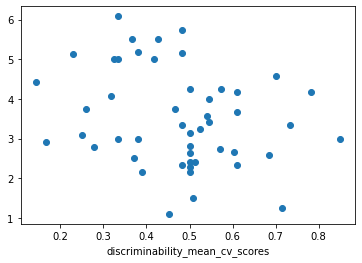

#### RTFS_factor_2

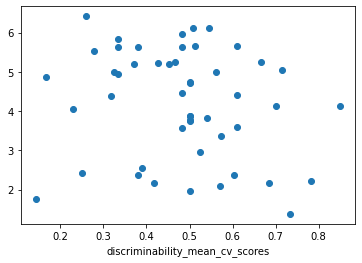

#### SST_SSRT

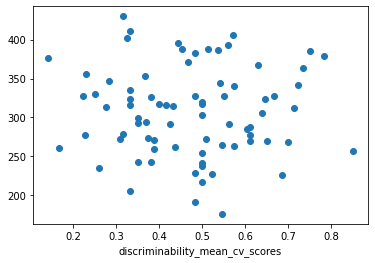

#### pes_mean_limited

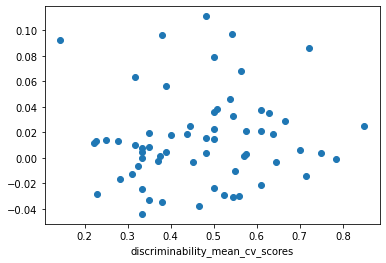

#### PostErrorSlowW1

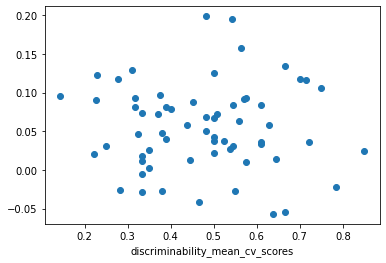

#### cancer_promoting_minus_preventing_FFQ

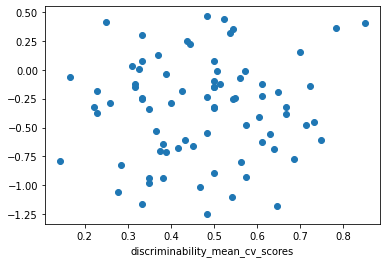

#### cancer_promoting_FFQ

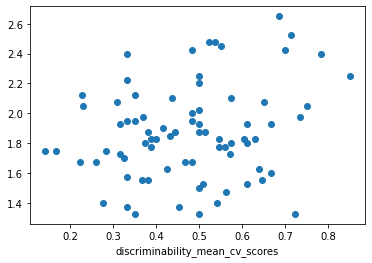

#### cancer_preventing_FFQ

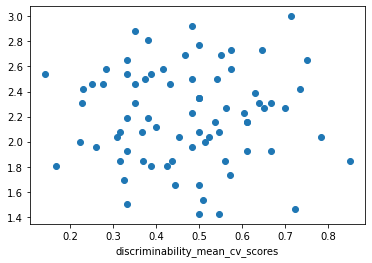

## harvardoxford-cortical_prob_Frontal Operculum Cortex

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores', 'mask_threshold',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=136)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


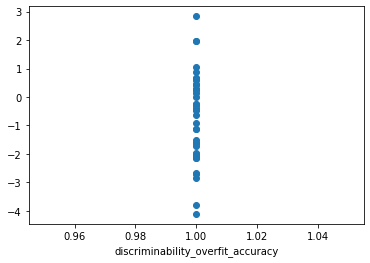

#### RTFS_factor_1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


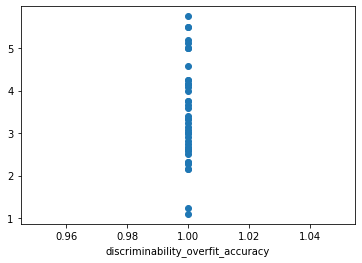

#### RTFS_factor_2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


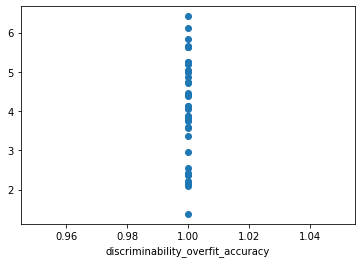

#### SST_SSRT

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


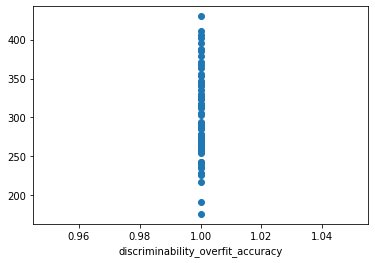

#### pes_mean_limited

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


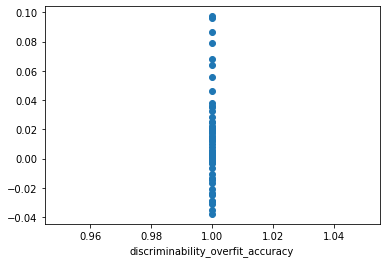

#### PostErrorSlowW1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


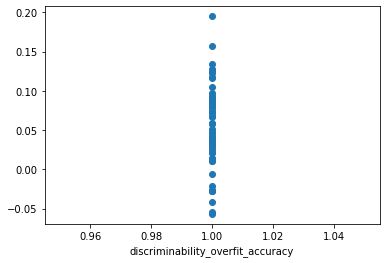

#### cancer_promoting_minus_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


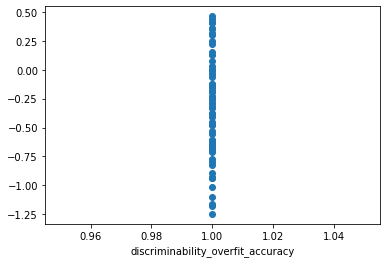

#### cancer_promoting_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


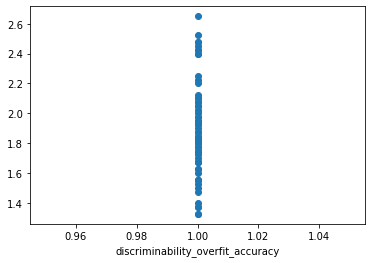

#### cancer_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


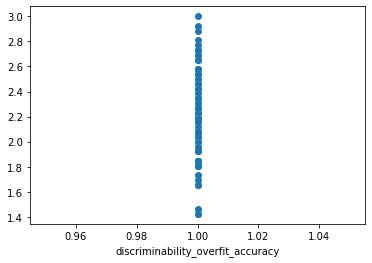

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

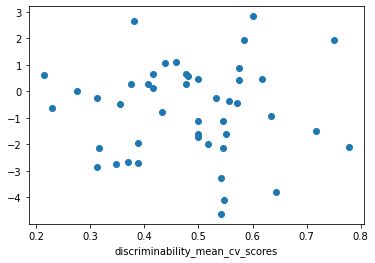

#### RTFS_factor_1

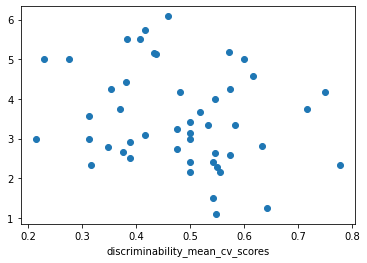

#### RTFS_factor_2

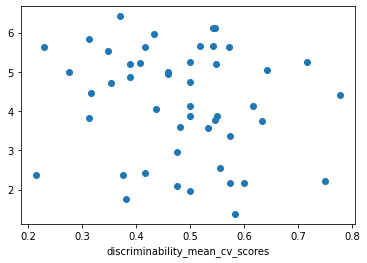

#### SST_SSRT

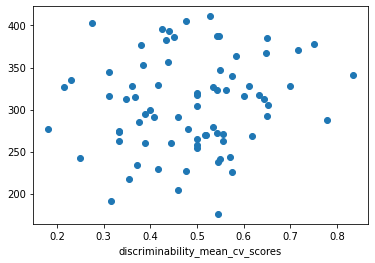

#### pes_mean_limited

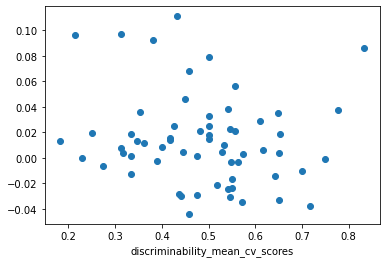

#### PostErrorSlowW1

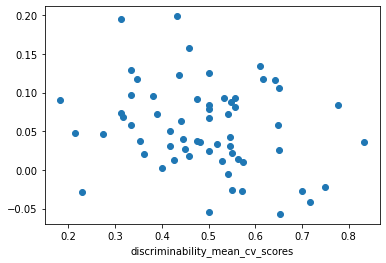

#### cancer_promoting_minus_preventing_FFQ

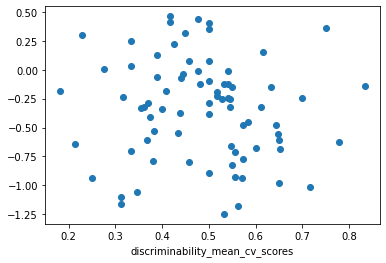

#### cancer_promoting_FFQ

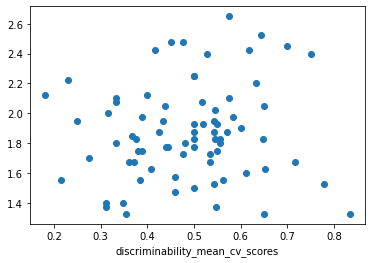

#### cancer_preventing_FFQ

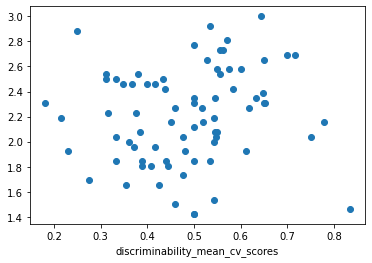

## harvardoxford-cortical_prob_Supramarginal Gyrus, posterior division

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores', 'mask_threshold',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=136)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


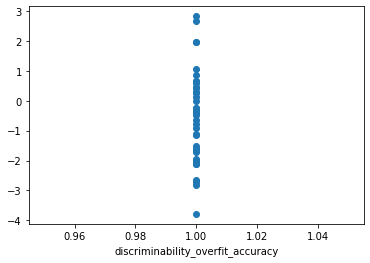

#### RTFS_factor_1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


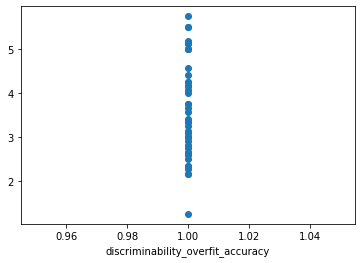

#### RTFS_factor_2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


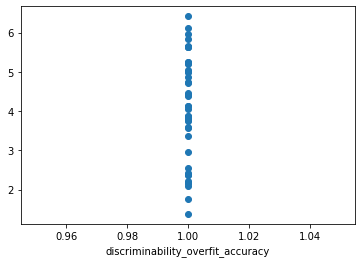

#### SST_SSRT

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


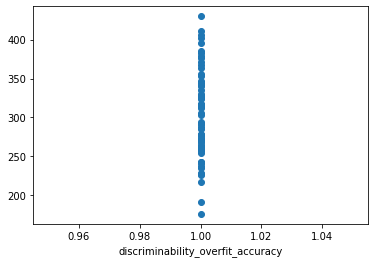

#### pes_mean_limited

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


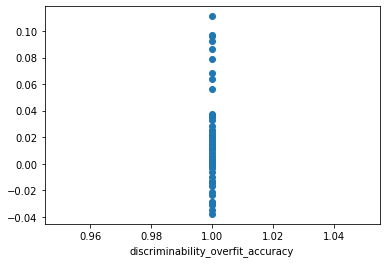

#### PostErrorSlowW1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


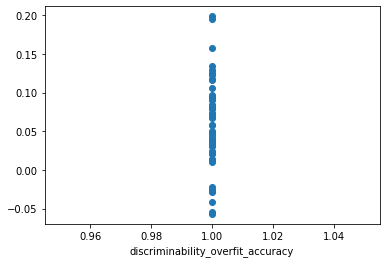

#### cancer_promoting_minus_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


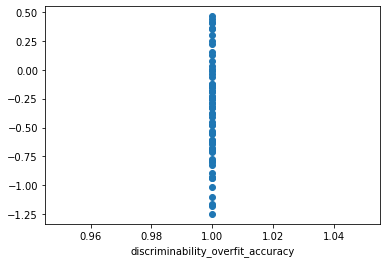

#### cancer_promoting_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


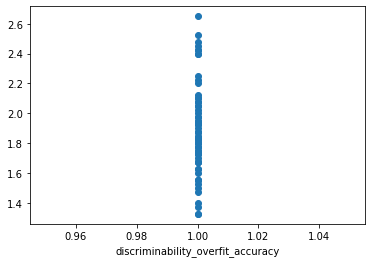

#### cancer_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


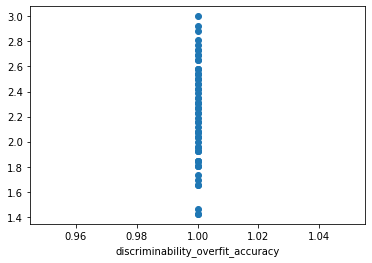

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

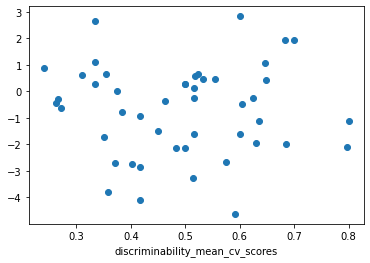

#### RTFS_factor_1

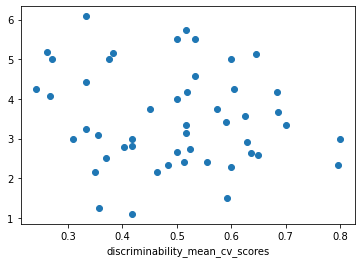

#### RTFS_factor_2

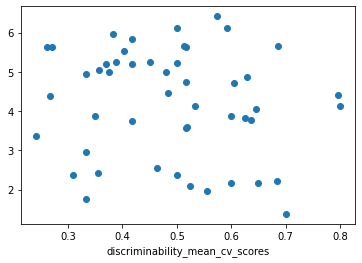

#### SST_SSRT

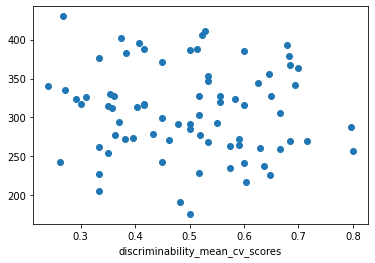

#### pes_mean_limited

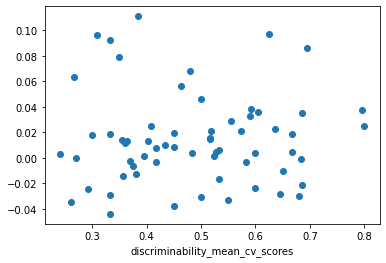

#### PostErrorSlowW1

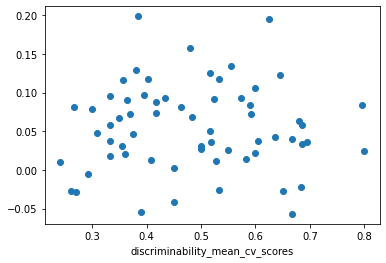

#### cancer_promoting_minus_preventing_FFQ

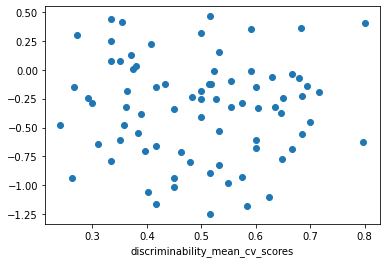

#### cancer_promoting_FFQ

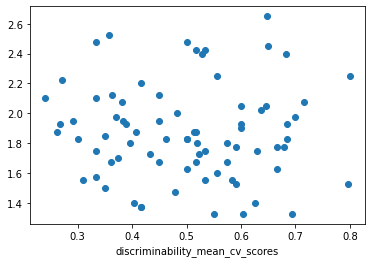

#### cancer_preventing_FFQ

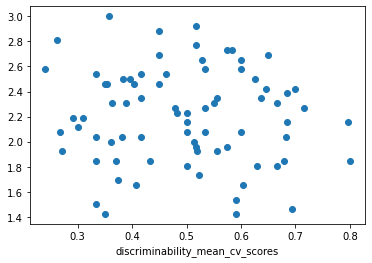

## harvardoxford-cortical_prob_Angular Gyrus

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores', 'mask_threshold',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=136)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


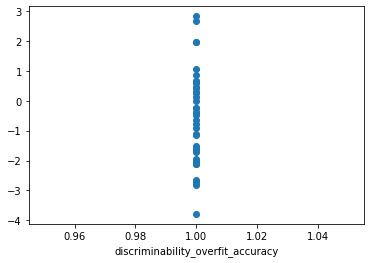

#### RTFS_factor_1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


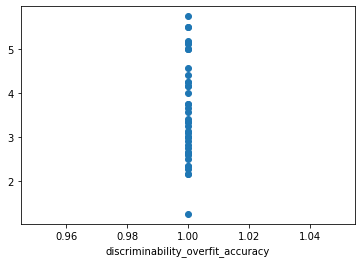

#### RTFS_factor_2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


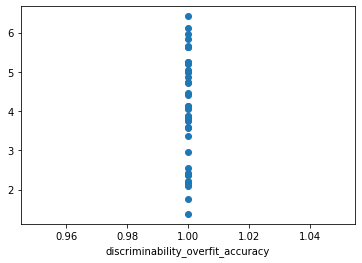

#### SST_SSRT

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


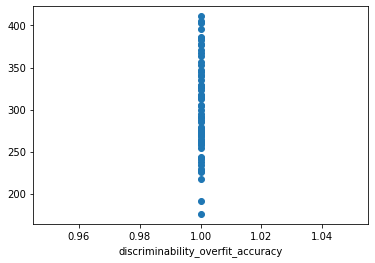

#### pes_mean_limited

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


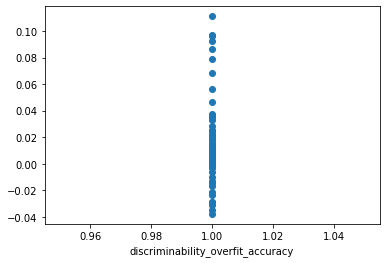

#### PostErrorSlowW1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


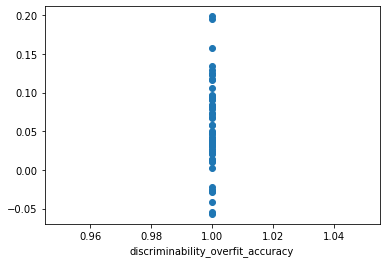

#### cancer_promoting_minus_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


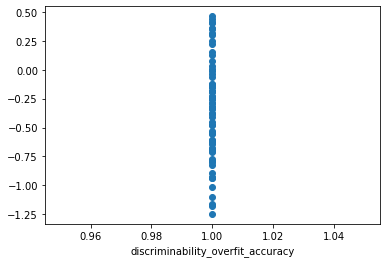

#### cancer_promoting_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


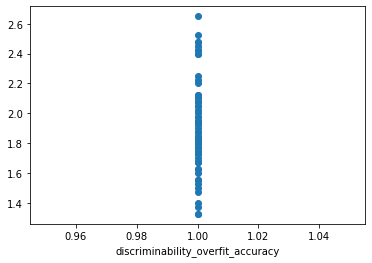

#### cancer_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


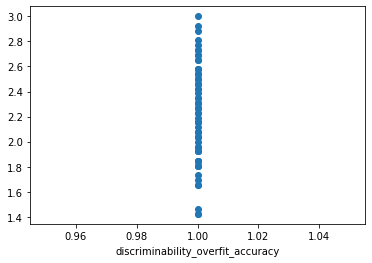

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

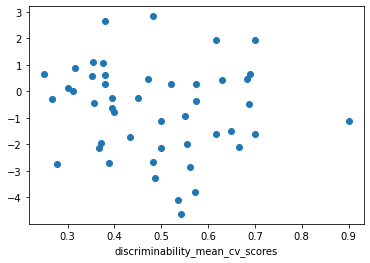

#### RTFS_factor_1

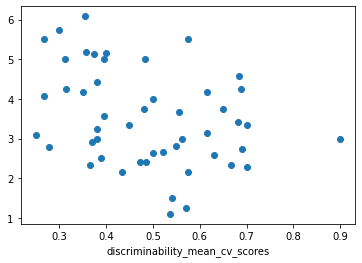

#### RTFS_factor_2

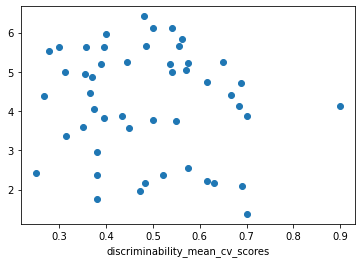

#### SST_SSRT

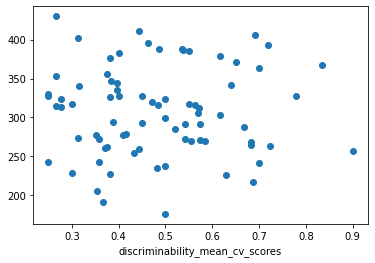

#### pes_mean_limited

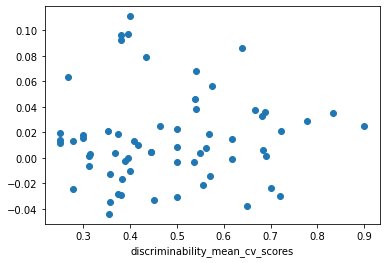

#### PostErrorSlowW1

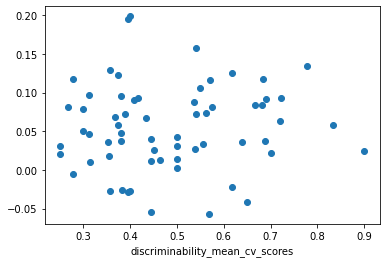

#### cancer_promoting_minus_preventing_FFQ

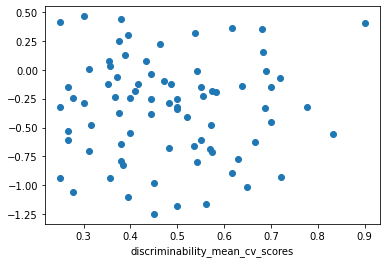

#### cancer_promoting_FFQ

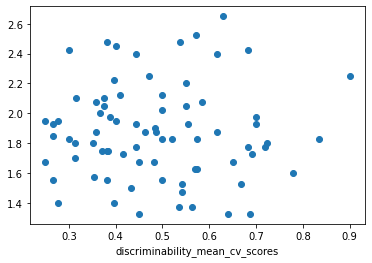

#### cancer_preventing_FFQ

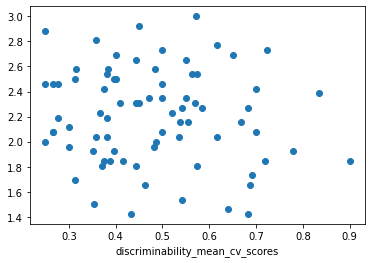

## harvardoxford-cortical_prob_Cingulate Gyrus, anterior division

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores', 'mask_threshold',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=136)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


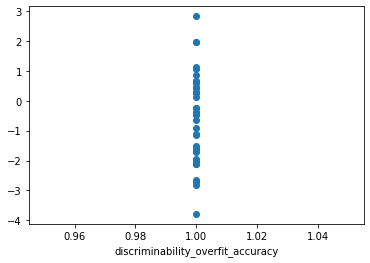

#### RTFS_factor_1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


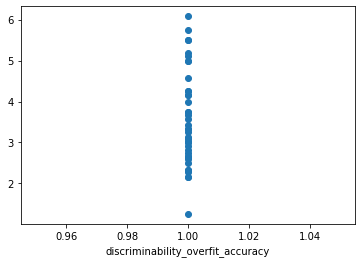

#### RTFS_factor_2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


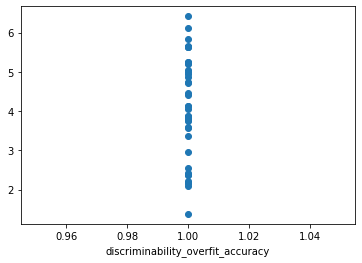

#### SST_SSRT

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


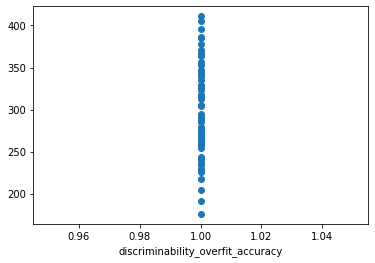

#### pes_mean_limited

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


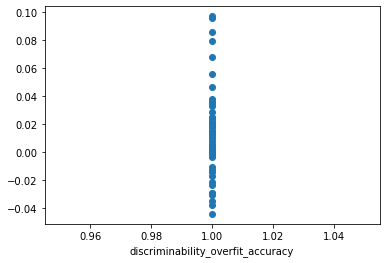

#### PostErrorSlowW1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


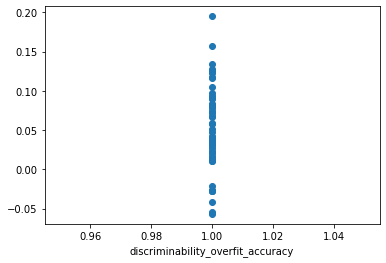

#### cancer_promoting_minus_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


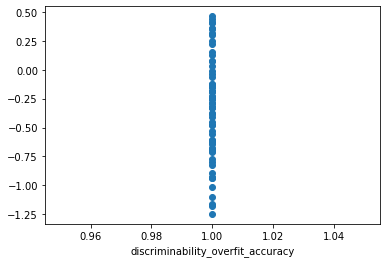

#### cancer_promoting_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


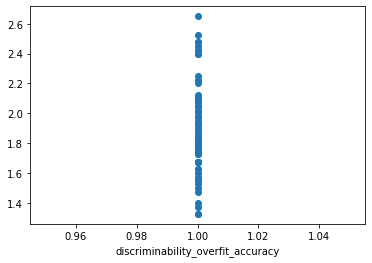

#### cancer_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


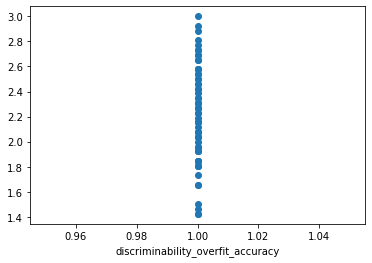

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

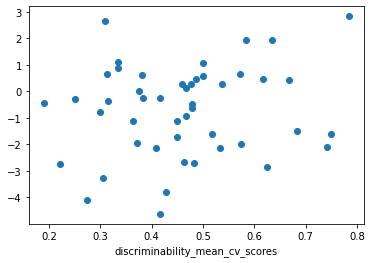

#### RTFS_factor_1

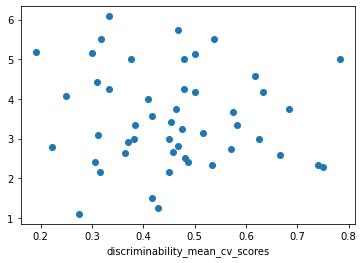

#### RTFS_factor_2

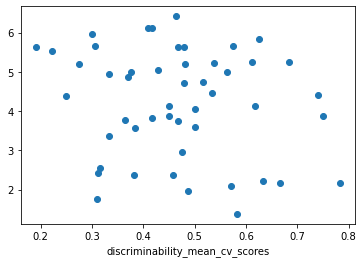

#### SST_SSRT

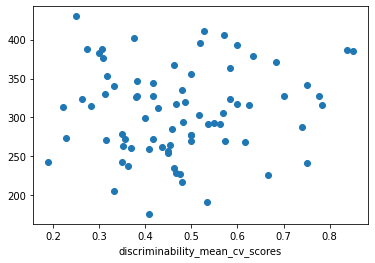

#### pes_mean_limited

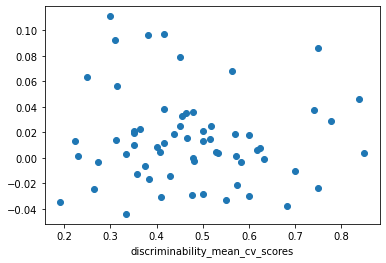

#### PostErrorSlowW1

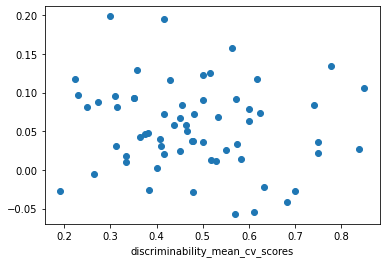

#### cancer_promoting_minus_preventing_FFQ

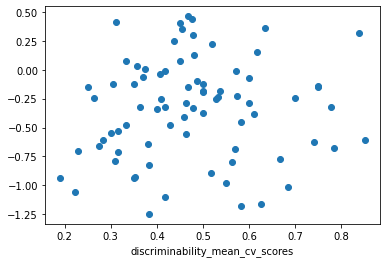

#### cancer_promoting_FFQ

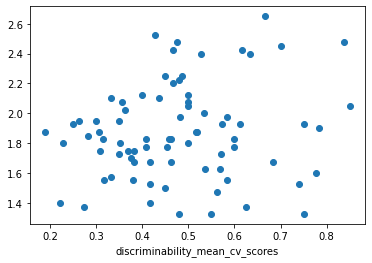

#### cancer_preventing_FFQ

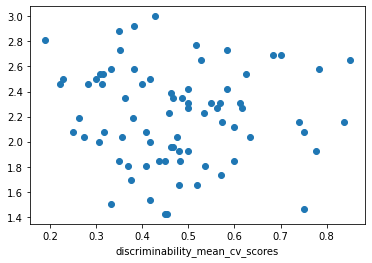

## harvardoxford-cortical_prob_Lateral Occipital Cortex, superior division

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores', 'mask_threshold',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=136)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


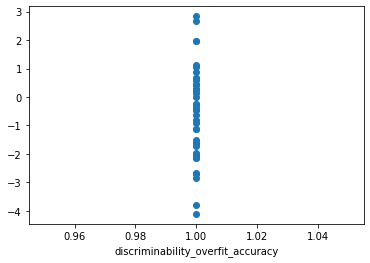

#### RTFS_factor_1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


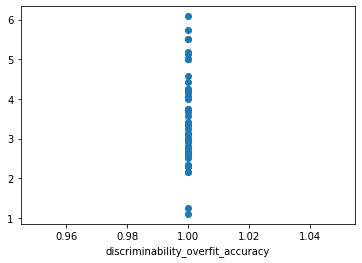

#### RTFS_factor_2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


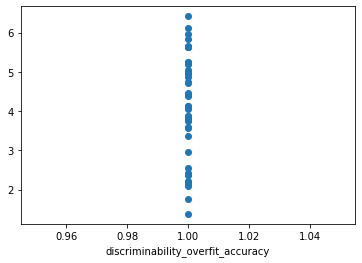

#### SST_SSRT

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


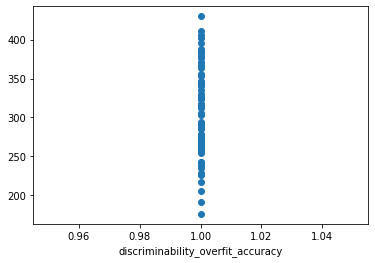

#### pes_mean_limited

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


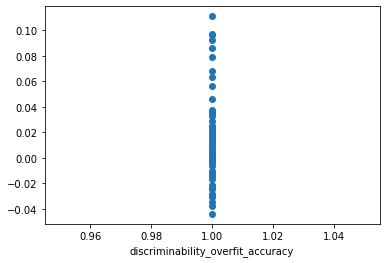

#### PostErrorSlowW1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


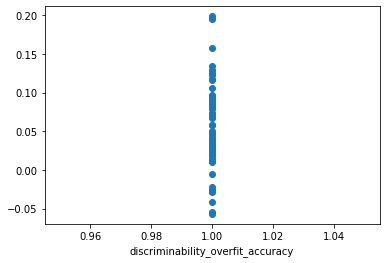

#### cancer_promoting_minus_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


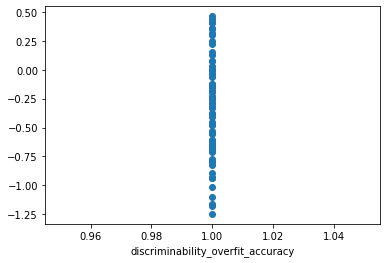

#### cancer_promoting_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


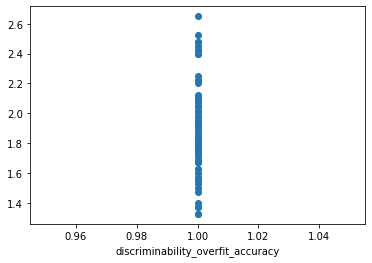

#### cancer_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


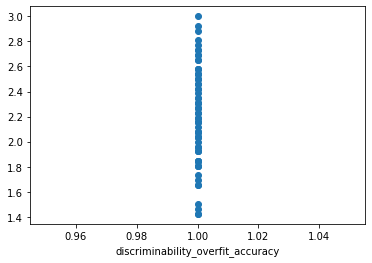

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

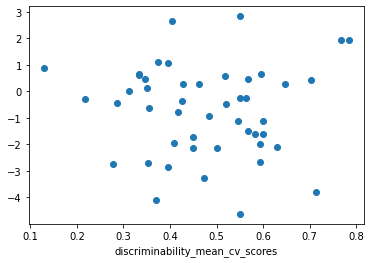

#### RTFS_factor_1

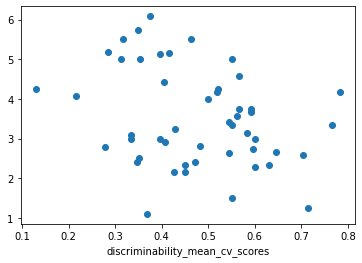

#### RTFS_factor_2

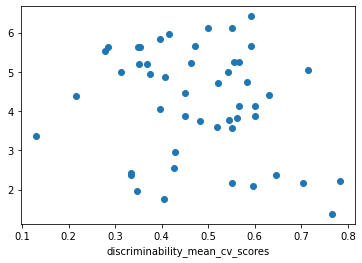

#### SST_SSRT

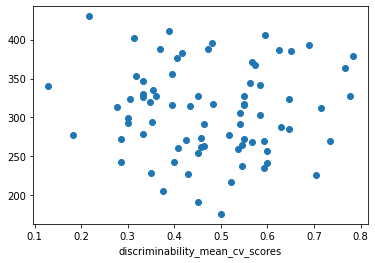

#### pes_mean_limited

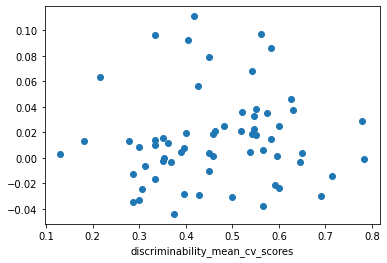

#### PostErrorSlowW1

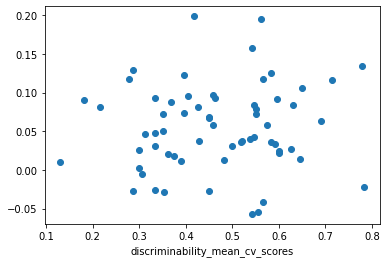

#### cancer_promoting_minus_preventing_FFQ

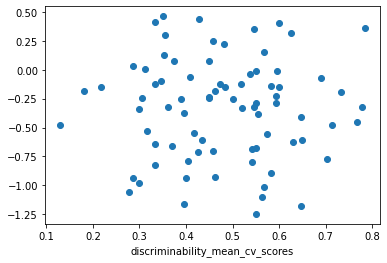

#### cancer_promoting_FFQ

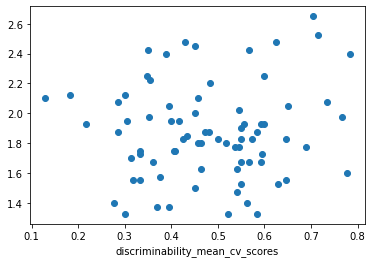

#### cancer_preventing_FFQ

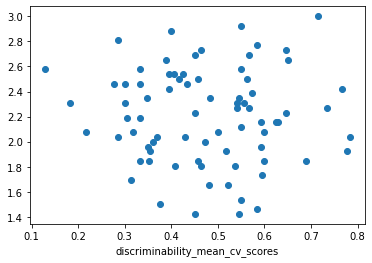

## harvardoxford-cortical_prob_Inferior Frontal Gyrus, pars opercularis

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores', 'mask_threshold',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=136)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


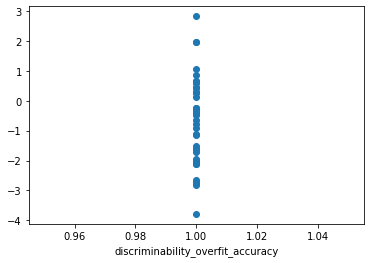

#### RTFS_factor_1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


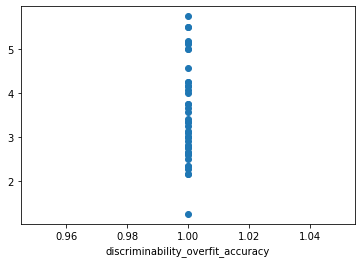

#### RTFS_factor_2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


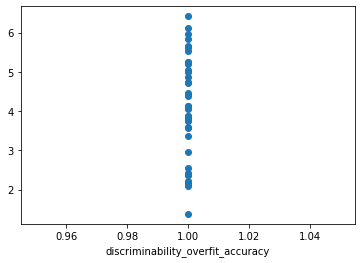

#### SST_SSRT

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


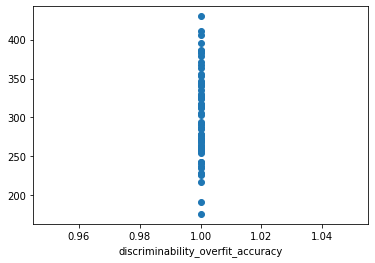

#### pes_mean_limited

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


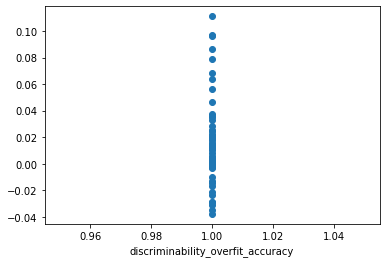

#### PostErrorSlowW1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


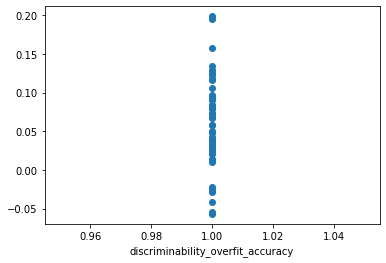

#### cancer_promoting_minus_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


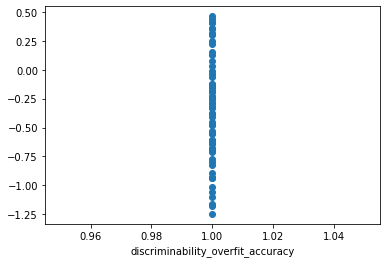

#### cancer_promoting_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


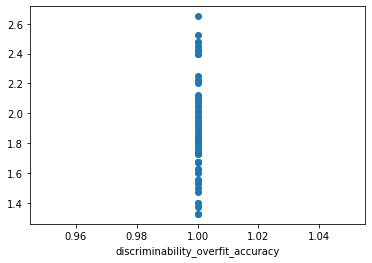

#### cancer_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


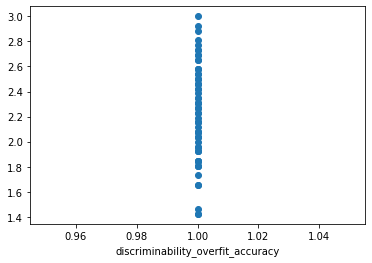

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

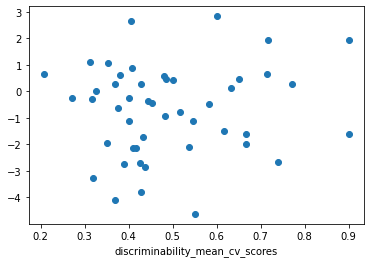

#### RTFS_factor_1

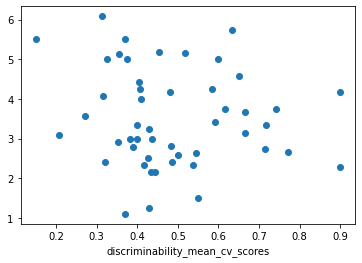

#### RTFS_factor_2

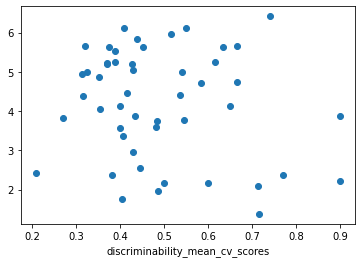

#### SST_SSRT

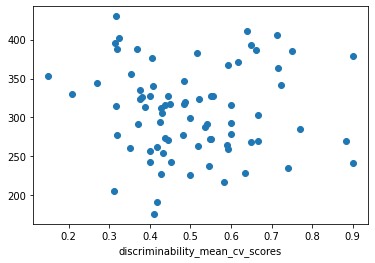

#### pes_mean_limited

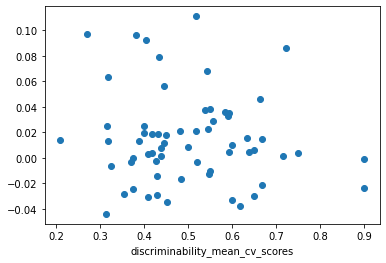

#### PostErrorSlowW1

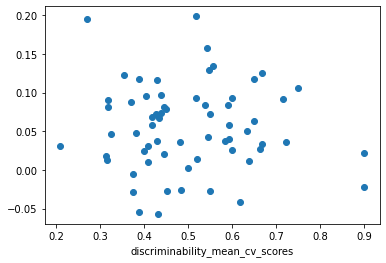

#### cancer_promoting_minus_preventing_FFQ

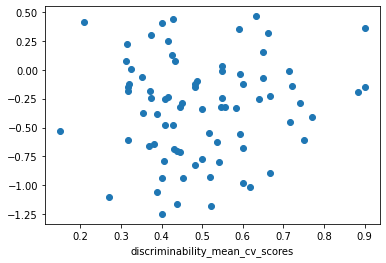

#### cancer_promoting_FFQ

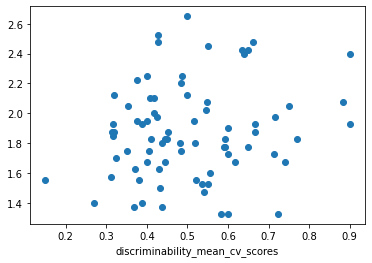

#### cancer_preventing_FFQ

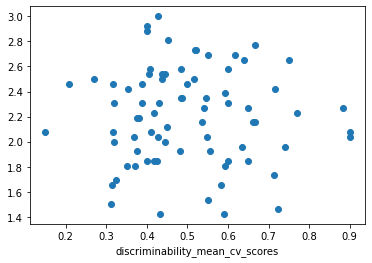

## harvardoxford-cortical_prob_Inferior Frontal Gyrus, pars triangularis

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores', 'mask_threshold',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=136)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


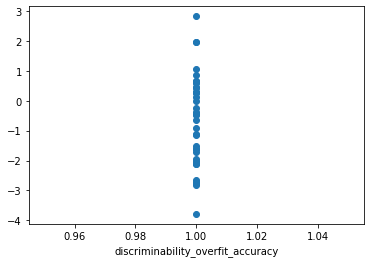

#### RTFS_factor_1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


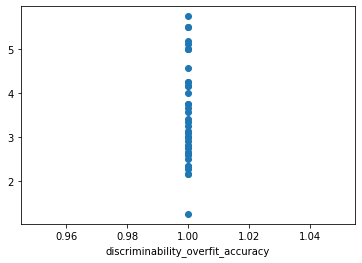

#### RTFS_factor_2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


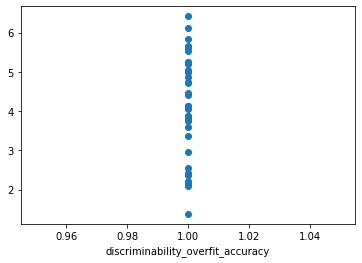

#### SST_SSRT

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


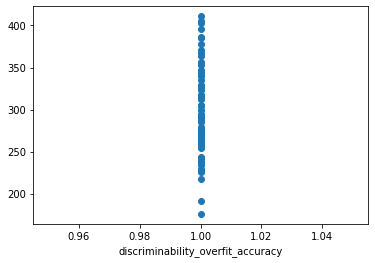

#### pes_mean_limited

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


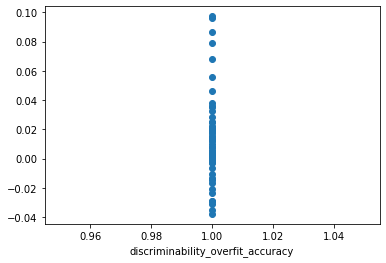

#### PostErrorSlowW1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


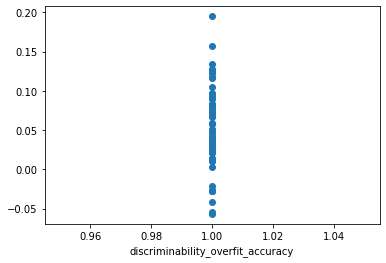

#### cancer_promoting_minus_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


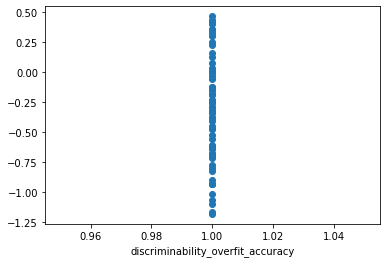

#### cancer_promoting_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


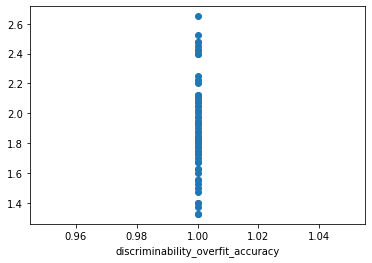

#### cancer_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


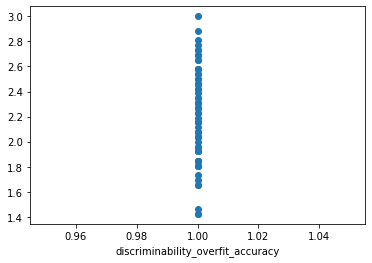

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

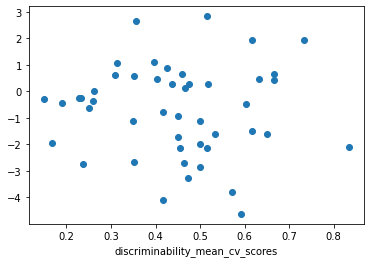

#### RTFS_factor_1

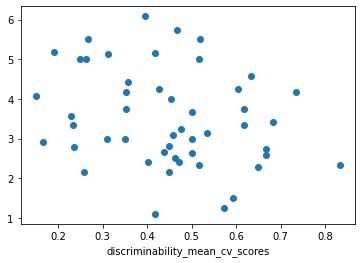

#### RTFS_factor_2

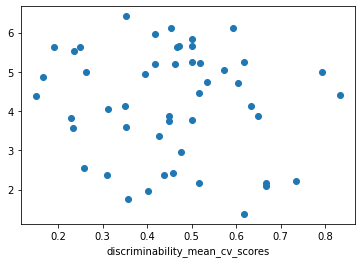

#### SST_SSRT

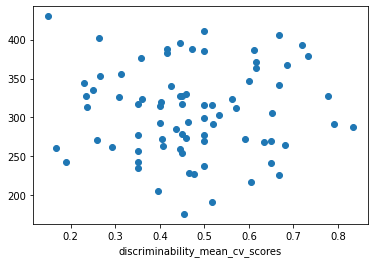

#### pes_mean_limited

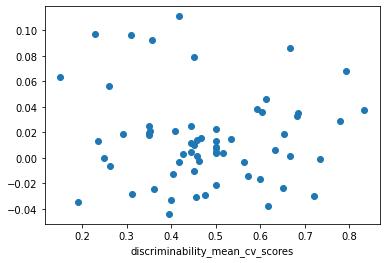

#### PostErrorSlowW1

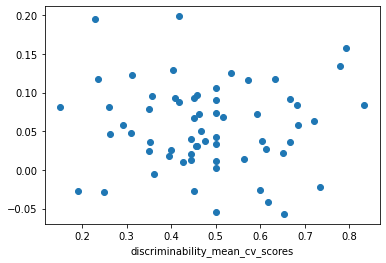

#### cancer_promoting_minus_preventing_FFQ

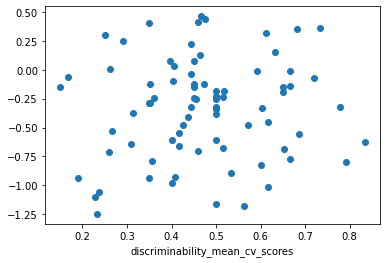

#### cancer_promoting_FFQ

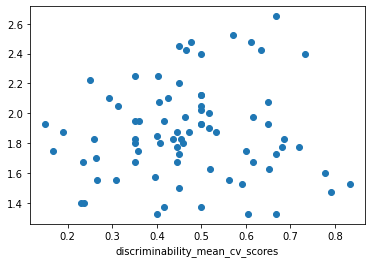

#### cancer_preventing_FFQ

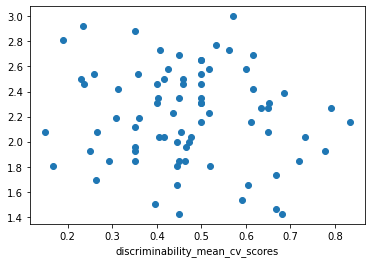

## harvardoxford-cortical_prob_Insular Cortex

Index(['subid', 'pes_mean_limited'], dtype='object')
Index(['subid', 'PECG_mean', 'PCCG_mean', 'PostErrorSlowW1'], dtype='object')
Index(['subject', 'discriminability_overfit_accuracy',
       'discriminability_mean_cv_scores', 'mask_threshold',
       'cancer_promoting_minus_preventing_FCI',
       'cancer_promoting_minus_preventing_FFQ',
       'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FCI',
       'cancer_promoting_minus_preventing_liked_FFQ',
       ...
       'IPAQ_total_METminutes', 'IPAQ_MET_kCal', 'birthsex_factor', 'wave',
       'subid_x', 'pes_mean_limited', 'subid_y', 'PECG_mean', 'PCCG_mean',
       'PostErrorSlowW1'],
      dtype='object', length=136)


### discriminability_overfit_accuracy

#### RTFS_f1_minus_f2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


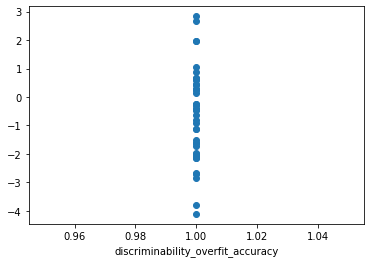

#### RTFS_factor_1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


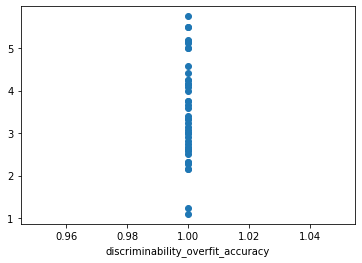

#### RTFS_factor_2

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


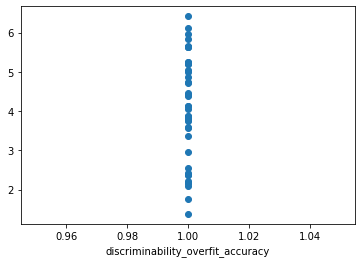

#### SST_SSRT

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


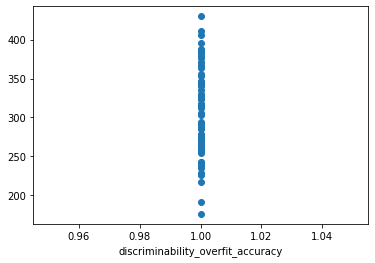

#### pes_mean_limited

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


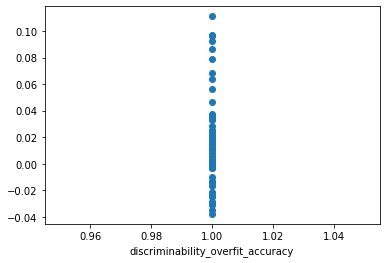

#### PostErrorSlowW1

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


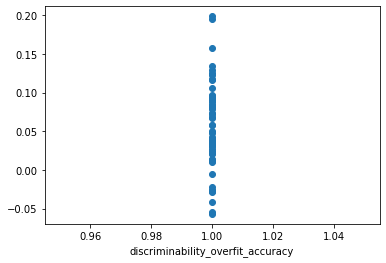

#### cancer_promoting_minus_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


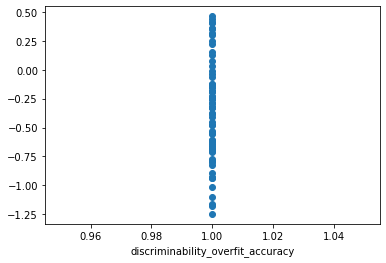

#### cancer_promoting_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


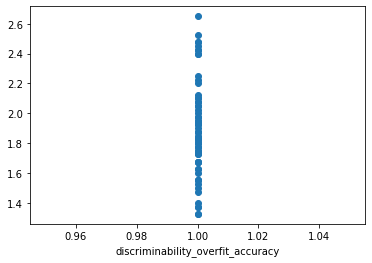

#### cancer_preventing_FFQ

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


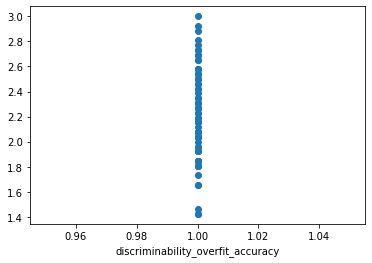

### discriminability_mean_cv_scores

#### RTFS_f1_minus_f2

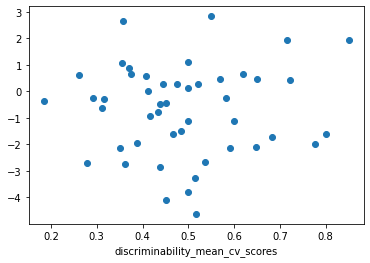

#### RTFS_factor_1

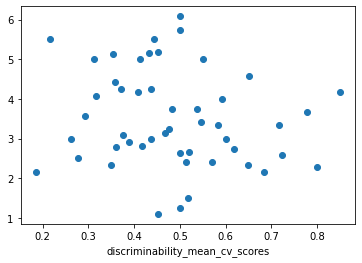

#### RTFS_factor_2

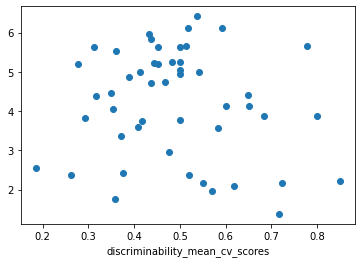

#### SST_SSRT

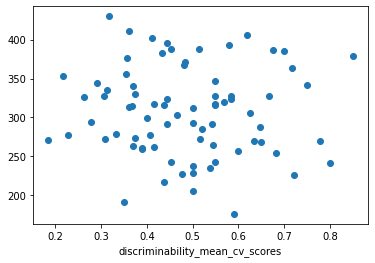

#### pes_mean_limited

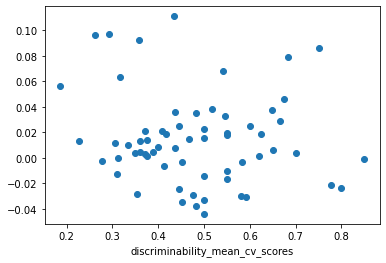

#### PostErrorSlowW1

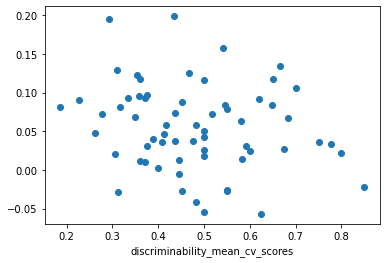

#### cancer_promoting_minus_preventing_FFQ

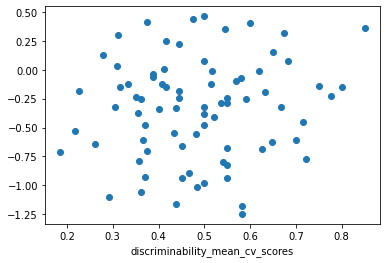

#### cancer_promoting_FFQ

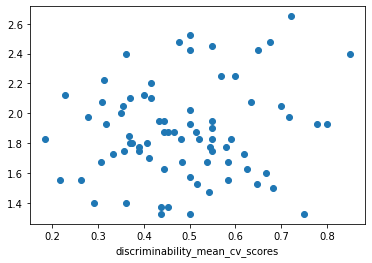

#### cancer_preventing_FFQ

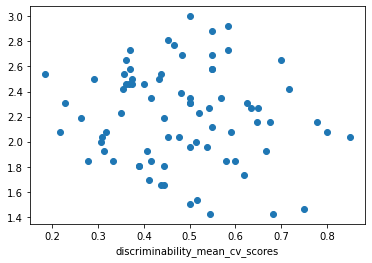

In [23]:
summary_across_mask_list = []
for mask_filepath in mask_list:

    mask_filename = os.path.basename(mask_filepath)
    mask_name = mask_filename.split(".")[0]
    
    display(Markdown("## " + mask_name))
    masked_analysis_filepath = (ml_data_folderpath + "/SST/discriminability_by_mask_" + 
        discriminability_version_id + "_" + mask_name + ".pkl")
        
    #go on to the next one if it doesn't exist
    if os.path.exists(masked_analysis_filepath)==False:
        print ("warning: " + masked_analysis_filepath + " does not exist.")
        continue
        
    with open(masked_analysis_filepath, 'rb') as handle:
        summary_results = pickle.load(handle)
        
    summary_results2 = summary_results.rename(columns={
        'mean_cv_scores':'discriminability_mean_cv_scores',
        'overfit_accuracy':'discriminability_overfit_accuracy'})
    
    ind_div_combined = get_ind_div_for_pes_combined(summary_results2,ml_data_folderpath)
    
    print(ind_div_combined.columns)
    
    ind_div_combined_3sd = remove_selected_outliers_rtfs_study(
        ind_div_combined,
        show_plot=False)
    
    tabular_summary = display_discriminability_correlations_rtfs(ind_div_combined_3sd)
    
    tabular_summary['mask_name']=mask_name
    
    summary_across_mask_list = summary_across_mask_list + [tabular_summary]
    
    
summary_across_masks = pd.concat(summary_across_mask_list)
    

    
    

In [24]:
summary_across_masks_cv = summary_across_masks.loc[summary_across_masks['neural_var']=='discriminability_mean_cv_scores'].copy()

In [25]:
fdr_corrected = fdrcorrection(summary_across_masks_cv["pearson's r p-value"],alpha=0.05)
summary_across_masks_cv["pearson's r p-value fdr-cor"] = fdr_corrected[1]

In [26]:
summary_across_masks_cv.loc[:,
                            ['correlate', "pearson's r", "pearson's r p-value","pearson's r p-value fdr-cor",
                             'mask_name']
                        ].sort_values("pearson's r p-value")

correlate  pearson's r  pearson's r p-value  \
10                          RTFS_factor_1    -0.339850             0.016888   
10                          RTFS_factor_1    -0.297590             0.037833   
16                   cancer_promoting_FFQ     0.226848             0.047259   
14                        PostErrorSlowW1    -0.234605             0.066447   
11                          RTFS_factor_2    -0.259520             0.071745   
10                          RTFS_factor_1    -0.256634             0.075075   
10                          RTFS_factor_1    -0.255987             0.075838   
9                        RTFS_f1_minus_f2     0.259511             0.078149   
10                          RTFS_factor_1    -0.251856             0.080855   
11                          RTFS_factor_2    -0.233759             0.105974   
14                        PostErrorSlowW1    -0.195418             0.124818   
10                          RTFS_factor_1    -0.219794             0.133339   
16                   cancer_promoting_FFQ     0.168333             0.143352   
11                          RTFS_factor_2    -0.205506             0.156607   
11                          RTFS_factor_2    -0.200224             0.167772   
16                   cancer_promoting_FFQ     0.157653             0.170890   
11                          RTFS_factor_2    -0.181687             0.211516   
11                          RTFS_factor_2    -0.181600             0.211739   
17                  cancer_preventing_FFQ    -0.138945             0.228144   
12                               SST_SSRT     0.137844             0.235046   
16                   cancer_promoting_FFQ     0.134810             0.242425   
11                          RTFS_factor_2    -0.169390             0.244605   
16                   cancer_promoting_FFQ     0.130856             0.256645   
17                  cancer_preventing_FFQ     0.126836             0.274912   
13                       pes_mean_limited    -0.140475             0.276152   
10                          RTFS_factor_1    -0.158557             0.276531   
14                        PostErrorSlowW1     0.138365             0.279492   
10                          RTFS_factor_1    -0.155004             0.287573   
10                          RTFS_factor_1    -0.152085             0.296858   
11                          RTFS_factor_2    -0.153394             0.297919   
9                        RTFS_f1_minus_f2     0.152908             0.304843   
10                          RTFS_factor_1    -0.147844             0.310690   
14                        PostErrorSlowW1     0.129070             0.313372   
17                  cancer_preventing_FFQ    -0.116404             0.313375   
17                  cancer_preventing_FFQ    -0.115135             0.318716   
13                       pes_mean_limited     0.126373             0.323675   
15  cancer_promoting_minus_preventing_FFQ    -0.112775             0.325576   
13                       pes_mean_limited    -0.124715             0.330116   
12                               SST_SSRT    -0.112001             0.332153   
17                  cancer_preventing_FFQ    -0.111832             0.332890   
10                          RTFS_factor_1    -0.140995             0.333882   
11                          RTFS_factor_2    -0.138991             0.340866   
16                   cancer_promoting_FFQ     0.109788             0.341855   
14                        PostErrorSlowW1    -0.120191             0.348094   
17                  cancer_preventing_FFQ    -0.107394             0.352548   
15  cancer_promoting_minus_preventing_FFQ     0.104851             0.360932   
17                  cancer_preventing_FFQ    -0.105425             0.361498   
11                          RTFS_factor_2    -0.129879             0.373757   
15  cancer_promoting_minus_preventing_FFQ     0.097351             0.396483   
11                          RTFS_factor_2    -0.122203             0.402887   
14 

In [27]:
pd.set_option('display.max_rows', 200)

In [28]:
summary_across_masks_overfit = summary_across_masks.loc[summary_across_masks['neural_var']=='discriminability_overfit_accuracy'].copy()
fdr_corrected = fdrcorrection(summary_across_masks_overfit["pearson's r p-value"],alpha=0.05)
summary_across_masks_overfit["pearson's r p-value fdr-cor"] = fdr_corrected[1]

In [29]:
summary_across_masks_overfit.loc[:,
                            ['correlate', "pearson's r", "pearson's r p-value","pearson's r p-value fdr-cor",
                             'mask_name']
                        ].sort_values("pearson's r p-value")

correlate  pearson's r  pearson's r p-value  \
0                       RTFS_f1_minus_f2          NaN                  NaN   
1                          RTFS_factor_1          NaN                  NaN   
2                          RTFS_factor_2          NaN                  NaN   
3                               SST_SSRT          NaN                  NaN   
4                       pes_mean_limited          NaN                  NaN   
5                        PostErrorSlowW1          NaN                  NaN   
6  cancer_promoting_minus_preventing_FFQ          NaN                  NaN   
7                   cancer_promoting_FFQ          NaN                  NaN   
8                  cancer_preventing_FFQ          NaN                  NaN   
0                       RTFS_f1_minus_f2          NaN                  NaN   
1                          RTFS_factor_1          NaN                  NaN   
2                          RTFS_factor_2          NaN                  NaN   
3                               SST_SSRT          NaN                  NaN   
4                       pes_mean_limited          NaN                  NaN   
5                        PostErrorSlowW1          NaN                  NaN   
6  cancer_promoting_minus_preventing_FFQ          NaN                  NaN   
7                   cancer_promoting_FFQ          NaN                  NaN   
8                  cancer_preventing_FFQ          NaN                  NaN   
0                       RTFS_f1_minus_f2          NaN                  NaN   
1                          RTFS_factor_1          NaN                  NaN   
2                          RTFS_factor_2          NaN                  NaN   
3                               SST_SSRT          NaN                  NaN   
4                       pes_mean_limited          NaN                  NaN   
5                        PostErrorSlowW1          NaN                  NaN   
6  cancer_promoting_minus_preventing_FFQ          NaN                  NaN   
7                   cancer_promoting_FFQ          NaN                  NaN   
8                  cancer_preventing_FFQ          NaN                  NaN   
0                       RTFS_f1_minus_f2          NaN                  NaN   
1                          RTFS_factor_1          NaN                  NaN   
2                          RTFS_factor_2          NaN                  NaN   
3                               SST_SSRT          NaN                  NaN   
4                       pes_mean_limited          NaN                  NaN   
5                        PostErrorSlowW1          NaN                  NaN   
6  cancer_promoting_minus_preventing_FFQ          NaN                  NaN   
7                   cancer_promoting_FFQ          NaN                  NaN   
8                  cancer_preventing_FFQ          NaN                  NaN   
0                       RTFS_f1_minus_f2          NaN                  NaN   
1                          RTFS_factor_1          NaN                  NaN   
2                          RTFS_factor_2          NaN                  NaN   
3                               SST_SSRT          NaN                  NaN   
4                       pes_mean_limited          NaN                  NaN   
5                        PostErrorSlowW1          NaN                  NaN   
6  cancer_promoting_minus_preventing_FFQ          NaN                  NaN   
7                   cancer_promoting_FFQ          NaN                  NaN   
8                  cancer_preventing_FFQ          NaN                  NaN   
0                       RTFS_f1_minus_f2          NaN                  NaN   
1                          RTFS_factor_1          NaN                  NaN   
2                          RTFS_factor_2          NaN                  NaN   
3                               SST_SSRT          NaN                  NaN   
4                       pes_mean_limited          NaN                  NaN   
5                        PostErrorSlowW1          NaN

## Where to next?

With these results in hand, I don't think we can uncritically publish the previous finding. Particularly as the `discriminability_mean_cv_scores` result has changed, we can't re-adjust to that.

This should be considered moderate evidence against the idea we can do anything with discriminability, though I wouldn't completely rule it out yet.

We could do a combo mask of response inhibition overlap with other anatomical masks, but I can't see any other modification improving the result we have found.

Another possibility is that the code for getting accuracy scores itself is wrong. This package is vague and I could write it to do the CV myself. That would provide confidence that we're getting the scores right. But it would also take double or triple the time to run. And there aren't any good reasons to believe this accuracy score we're currently extracting is poor.